In [1]:
##Dataset = https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [2]:
##Amacımız araba almak isteyen kişinin istediği filtreleri filtrelemeleri yaparak bütçesine uygun bir araba almasını sağlamak.
#Bu sebeple öncelikle price prediction modeli oluşturup sonrasında filtreleme işlemleri yapacağız

# 1-)DATA UNDERSTANDING / VERİYİ ANLAMA

### Bu kısımda dataseti projeye aktarıyor , inceliyor ve basit derecede bilgi sahibi oluyoruz. Sonrasında bu bilgileri yorumluyoruz

In [3]:
try:
    from sklearnex import patch_sklearn
    patch_sklearn()
    print('Intel Extension for Scikit-learn enabled!')
except ImportError:
    print('Intel Extension for Scikit-learn not found, using default scikit-learn')

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter 

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

Intel Extension for Scikit-learn not found, using default scikit-learn


In [4]:
df_clean = pd.read_csv('vehicles.csv')

In [5]:
df = df_clean.copy()

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df_clean

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [8]:
df.shape

(426880, 26)

In [9]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [11]:
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

**Dataseti incelediğimiz zaman [cylinders,condition,drive,type] sütunlarının dikkate alınacak kadar null değer içerdiğini
data type ın çoğunlukla object olduğunu ve unique veri sayısını görüyoruz**

# 2-)EDA (Exploratory Data Analysis) - Keşifsel Veri Analizi
### Amacımız isminde de belirtildiği üzere veriyi keşfetmek ve veri hakkında daha detaylı bilgi sahibi olmak

In [12]:
#2.1 Öncelikle tamamen aynı olan satırları siliyoruz
df.drop_duplicates(inplace=True)

In [13]:
#2.2 Sonrasında kullanmayacağımız sütunları drop edelim

In [14]:
#url ,model vardı sildim test yapıyorum.
# NOT: Model kolonu artık silinmiyor - model normalizasyonu için kullanılacak
# NOT: lat, long ve region kolonları artık silinmiyor - analiz ve görselleştirmelerde kullanılacak

drop_columns = {"id","region_url","VIN","image_url","description","posting_date","county","state","size","paint_color","url"}

df.drop(columns=drop_columns,axis=1,inplace=True)

In [15]:
# Drop işlemlerinden sonra df bu şekilde.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  lat           420331 non-null  float64
 14  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 48.9+ MB


In [16]:
#2.3 Df üzerindeki her bir sütunun unique veri sayısını ve verileri görmek için bir for döngüsü yazıyoruz.

for column in df.columns:
    print(f"kolon ismi :{column} -- uniuqe veri sayısı:{df[column].nunique()}\n uniuqe verileri: {df[column].unique()}\n**********************************************")

kolon ismi :region -- uniuqe veri sayısı:404
 uniuqe verileri: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'vi

In [17]:
#2.4 Artık df de gereksiz sütun yok şimdi var olan sütunlardaki NaN değerler farklı teknikler ile dolduracağız.
#    Sonrasında veride artık null değer olmadığı için hedef değişken analizi kısmına geçeceğiz her veri için 
#    grafikler çizip outlierları tespit edeceğiz ve bunları doğru yöntemler ile işleyeceğiz

=== NULL DEĞER ANALİZİ ===

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
lat               6549
long              6549
dtype: int64

=== NULL DEĞER YÜZDELERİ ===

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
lat              1.534155
long             1.534155
dtype: float64


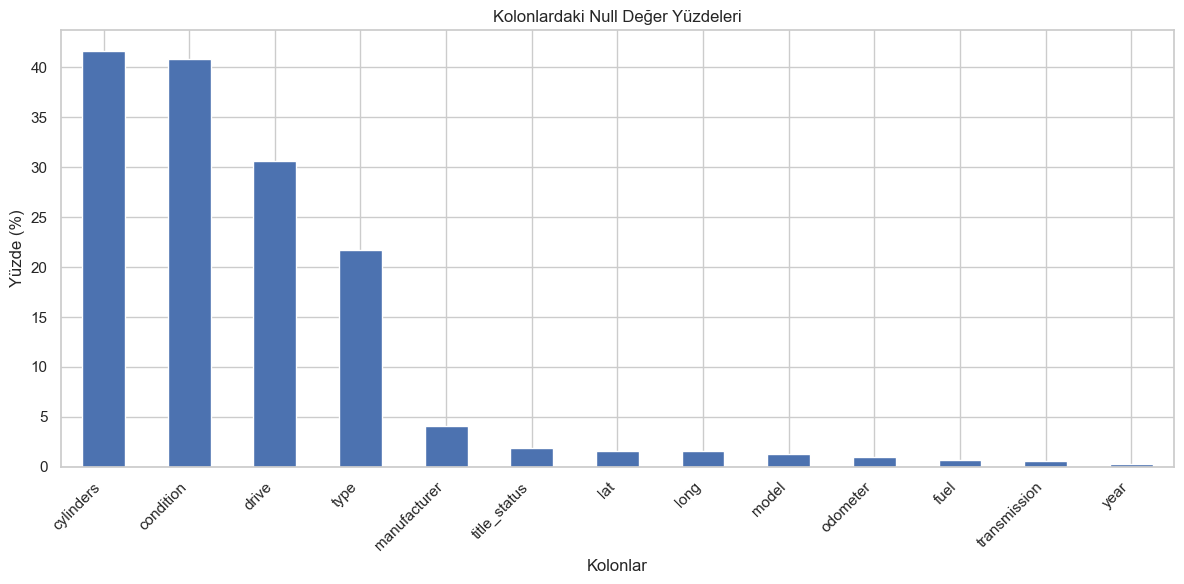

In [18]:
print("=== NULL DEĞER ANALİZİ ===\n")
print(df.isnull().sum())
print("\n=== NULL DEĞER YÜZDELERİ ===\n")
print((df.isnull().sum() / len(df)) * 100)


plt.figure(figsize=(12, 6))
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent.plot(kind='bar')
plt.title('Kolonlardaki Null Değer Yüzdeleri')
plt.ylabel('Yüzde (%)')
plt.xlabel('Kolonlar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Yukarıdaki grafikte göründüğü üzere [cylinders,condition,drive,type] sütunlarının dikkat çekici şekilde null değerler içeriyor şimdi bu sütunlardaki null değerleri uygun yöntemler ile işleyecek ve hiçbir sütunda null kalmayacak şekilde ayarlayacağız.

In [19]:
#2.5 Null değerleri doldururken kategorik ve numeric olarak ayrı ayrı işleyeceğiz. Bunun sebebi kullandığımız groupby fonksiyonunda
#    kategorik değişkenler için mode'u numeric değerler için medianı kullanıcak olmamız.

In [20]:
groupbyColumns = ["cylinders","fuel","transmission","drive","condition"]

In [21]:
#2.6 Gözüktüğü üzere cylinders,fuel,transmission sütunlarında other değerleri var.
#    Bu kısımda şöyle bir yol izeyeceğiz arabanın marka ve modeli ile groupby işlemi 
#    yaparak other olan verileri dolduracağız.

for column in groupbyColumns:
    print("---------------------- \n")
    print(f"kolon ismi:({column}) = {df[column].value_counts()}")

---------------------- 

kolon ismi:(cylinders) = cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64
---------------------- 

kolon ismi:(fuel) = fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64
---------------------- 

kolon ismi:(transmission) = transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64
---------------------- 

kolon ismi:(drive) = drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64
---------------------- 

kolon ismi:(condition) = condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


In [22]:
#2.7 önce sütunlarımızdaki other değerleri null a çeviriyoruz

for column in groupbyColumns:
    df.loc[df[column].str.contains('other', case=False, na=False), column] = np.nan
    print(f"{column} kolonundaki other değer sayısı = {(df[column]=="other").sum()}")    

cylinders kolonundaki other değer sayısı = 0
fuel kolonundaki other değer sayısı = 0
transmission kolonundaki other değer sayısı = 0
drive kolonundaki other değer sayısı = 0
condition kolonundaki other değer sayısı = 0


In [23]:
#2.8 Aşşağıda gözüktüğü üzere other olan gruplar manufacturer ve type kolonlarına göre gruplandı
#    ve modelarına göre dolduruldu artık null ya da other değerimiz yok

for column in groupbyColumns:
    df[column] = df.groupby(["manufacturer","type"],dropna=False)[column].transform(
    lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else x
 )
    df.dropna(subset=[column],inplace=True)
    print(f"{df[column].value_counts()}")


cylinders
6 cylinders     154031
8 cylinders     134306
4 cylinders     132010
5 cylinders       3117
10 cylinders      1513
3 cylinders       1107
12 cylinders       216
Name: count, dtype: int64
fuel
gas         389305
diesel       30134
hybrid        5168
electric      1675
Name: count, dtype: int64
transmission
automatic    400846
manual        25430
Name: count, dtype: int64
drive
4wd    196094
fwd    149014
rwd     81140
Name: count, dtype: int64
condition
excellent    225486
good         170475
like new      21196
fair           6769
new            1713
salvage         601
Name: count, dtype: int64


In [24]:
#2.9 Cylinders sütunundaki cylinders yazısı bir şey ifade etmiyor ve numeric olmaya daha uygun bu sebeple öncelikle
#    cylinders yazısını atıyor sonrasında kolonun type nı numerice çeviriyoruz.

df["cylinders"] = df["cylinders"].str.split().str[0].astype(int)
print("Artık silindir sütunu numeric halde şu şekilde:")
df["cylinders"].value_counts()

Artık silindir sütunu numeric halde şu şekilde:


cylinders
6     154013
8     134288
4     131992
5       3117
10      1507
3       1107
12       216
Name: count, dtype: int64

In [25]:
# ============================================================================
# GECICI EDA KOPYASI (SADECE GORSELLEŞTIRME İCIN)
# ============================================================================
# NOT: Bu kopya sadece grafiklerde odometer null'larini gostermemek icin
# Model training'de ASLA kullanilmayacak

df_eda = df.copy()

# Grafik icin gecici doldurma (model icin degil!)
df_eda["odometer"] = df_eda.groupby(["manufacturer","type","year"],dropna=False)["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

# Hala null varsa genel median
if df_eda['odometer'].isnull().sum() > 0:
    df_eda['odometer'].fillna(df_eda['odometer'].median(), inplace=True)

# Year null'lari da gecici doldur (sadece grafik icin)
df_eda["year"] = df_eda.groupby("manufacturer",dropna=False)["year"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

if df_eda['year'].isnull().sum() > 0:
    df_eda['year'].fillna(df_eda['year'].median(), inplace=True)

print(f"df_eda olusturuldu (sadece EDA grafikleri icin): {len(df_eda):,} satir")
print(f"df_eda null kontrolu:")
print(df_eda[['odometer', 'year']].isnull().sum())

df_eda olusturuldu (sadece EDA grafikleri icin): 426,240 satir
df_eda null kontrolu:
odometer    0
year        0
dtype: int64


In [26]:
#2.12 Title status kolonu için ise gruplama yapmadan mode ile doldurma işlemi gerçekleştiriyoruz.

df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

In [27]:
#2.13 Type kısmındaki boşlukları doldurmak için anahtar kelime kullanan bir fonksiyon yazdık bu fonksiyon sayesinde belirli kelimeler algılandığında
#     type kolonu otomatik bir şekilde dolduruluyor.

def fill_type_from_model_column(df, df_with_model):
    """
    df_with_model'deki model kolonunu kullanarak df'in type kolonunu doldur
    
    Parameters:
    -----------
    df : DataFrame
        Type'ı doldurulacak DataFrame (model kolonu yok)
    df_with_model : DataFrame
        Model kolonuna sahip DataFrame
        
    Returns:
    --------
    df : DataFrame with filled 'type' column
    """
    print("=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===\n")
    
    # Model bilgisini geçici ekle
    if len(df) == len(df_with_model):
        df['model_temp'] = df_with_model['model'].values
    else:
        # Index bazlı merge
        df = df.merge(
            df_with_model[['model']], 
            left_index=True, 
            right_index=True, 
            how='left',
            suffixes=('', '_temp')
        )
        if 'model_temp' not in df.columns:
            df.rename(columns={'model': 'model_temp'}, inplace=True)
    
    print(f"Başlangıç type null: {df['type'].isnull().sum()}")
    
    # Extraction fonksiyonu
    def extract_type(row):
        if pd.notna(row['type']):
            return row['type']
        
        if pd.isna(row['model_temp']):
            return None
        
        model = str(row['model_temp']).lower()
        
        # Comprehensive keywords
        type_keywords = {
            'pickup': ['f-150', 'f-250', 'f-350', 'silverado', 'sierra', 'ram', 
                      'tundra', 'tacoma', 'ranger', 'colorado', 'frontier', 'titan'],
            'SUV': ['4runner', 'explorer', 'tahoe', 'suburban', 'highlander', 
                    'pilot', 'pathfinder', 'expedition', 'durango', 'traverse',
                    'cr-v', 'rav4', 'rogue', 'equinox', 'escape'],
            'sedan': ['camry', 'accord', 'civic', 'corolla', 'altima', 'sentra',
                     'malibu', 'fusion', 'impala', 'optima', 'sonata', 'elantra'],
            'coupe': ['mustang', 'camaro', 'corvette', 'challenger', 'charger',
                     '370z', '350z', 'miata', 'brz', 'gt-r'],
            'van': ['odyssey', 'sienna', 'pacifica', 'caravan', 'quest', 'town'],
            'hatchback': ['golf', 'focus', 'fiesta', 'fit', 'yaris', 'prius']
        }
        
        for vehicle_type, keywords in type_keywords.items():
            if any(keyword in model for keyword in keywords):
                return vehicle_type
        
        return None
    
    # Apply
    print("1) Model isminden type çıkarılıyor...")
    df['type'] = df.apply(extract_type, axis=1)
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Manufacturer bazlı mode
    print("2) Manufacturer bazlı mode...")
    df['type'] = df.groupby('manufacturer')['type'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty and len(x.dropna()) > 0 else x
    )
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Unknown
    print("3) Kalan null'lar 'unknown' yapılıyor...")
    df['type'].fillna('unknown', inplace=True)
    print(f"   Final null: {df['type'].isnull().sum()}")
    
    # Temizlik
    df = df.drop('model_temp', axis=1)
    
    print("\nType doldurma tamamlandı!")
    print("\nType dağılımı:")
    print(df['type'].value_counts())
    
    return df

# Kullanım
df = fill_type_from_model_column(df, df_clean)

=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===

Başlangıç type null: 92781
1) Model isminden type çıkarılıyor...
   Sonrası null: 55876
2) Manufacturer bazlı mode...
   Sonrası null: 17646
3) Kalan null'lar 'unknown' yapılıyor...
   Final null: 0

Type doldurma tamamlandı!

Type dağılımı:
type
sedan          117634
SUV             90340
pickup          74027
truck           33492
other           21246
coupe           20649
unknown         17646
hatchback       17236
van             10720
wagon           10532
convertible      7152
mini-van         4682
offroad           570
bus               314
Name: count, dtype: int64


In [28]:
df.isna().sum()

region              0
price               0
year             1205
manufacturer    17646
model            5243
condition           0
cylinders           0
fuel                0
odometer         4400
title_status        0
transmission        0
drive               0
type                0
lat              6548
long             6548
dtype: int64

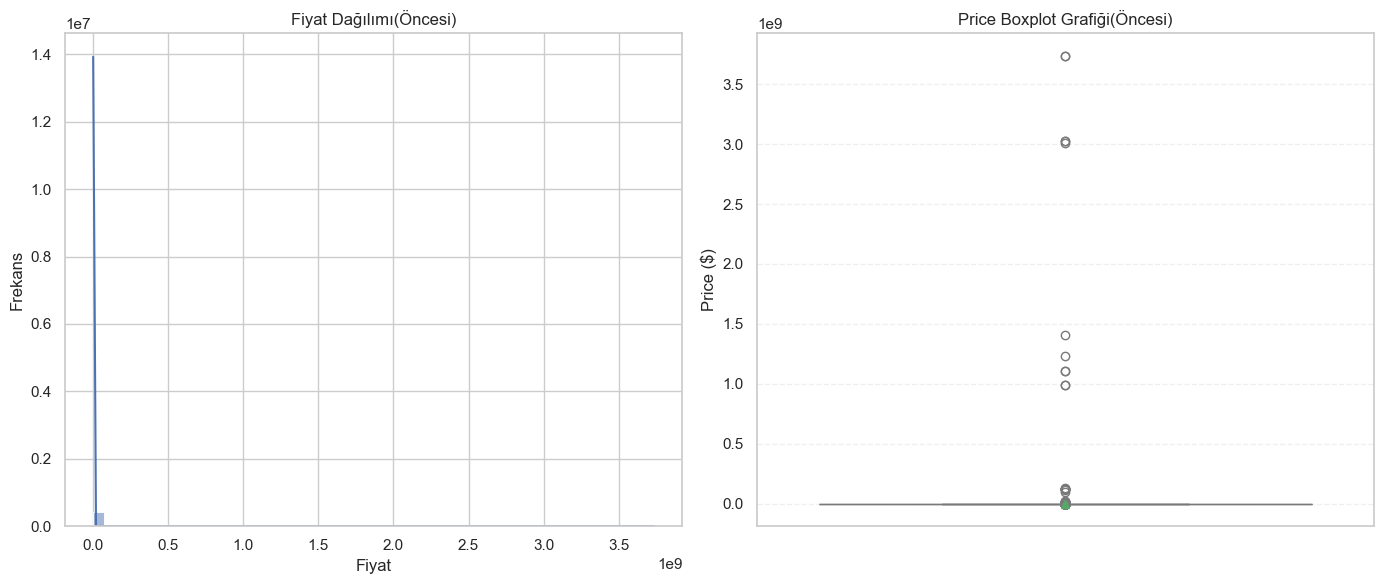

In [29]:
#2.14 Artık kolonlarımızda null değerler olmadığına göre kolonları hem frekansları hemde diğer kolonlarla ilişkileirni görmek
#     için grafikler oluşturacak ve yorumlayacağız.Öncelikle hedef değişkenimiz olan price kolonunun frekansını görmek için bir
#     histogram grafiği ve outlier değerleri inceleyebilmek için boxplot grafiği oluşturuyoruz.

plt.figure(figsize=(14,6))  

plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Öncesi)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")

plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Öncesi)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


In [30]:
#2.15 Grafik gözüktüğü üzere mantıksız bir şekilde bunun sebebi outlier değerler olabilir bunu incelememiz ve bu sorunu çözmemiz gerekiyor.

print(df["price"].describe())

count    4.262400e+05
mean     7.526345e+04
std      1.219142e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.391650e+04
75%      2.600000e+04
max      3.736929e+09
Name: price, dtype: float64


In [31]:
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count       426240.000
mean         75263.446
std       12191424.493
min              0.000
25%           5900.000
50%          13916.500
75%          26000.000
max     3736928711.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 En YÜKSEK 20 fiyat:
[3736928711 3736928711 3024942282 3024942282 3009548743 1410065407
 1234567890 1111111111 1111111111  987654321  987654321  135008900
  123456789  123456789  123456789  123456789  123456789  123456789
  113456789   99999999]

 Fiyat Aralıkları:
$0 - $500 arası:      42,057 araba
$500 - $1,000:        4,220 araba
$1,000 - $5,000:        48,994 araba
$5,000 - $20,000:       182,550 araba
$20,000 - $50,000:      135,434 araba
$50,000 - $100,000:     12,290 araba
$100,000 - $500,000:     627 araba
$500,000+:              68 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             32,867 araba
$1-100 arası:           3,490 araba
$1,000,000+:            60 arab

In [32]:
#2.16 Yukarıda gözüktüğü üzere veri setinde 0 dolar ve milyar değerlere sahip olan arabalar var (0 ve 3736928711 gibi)
#     bizim amacımız gerçek dünya verileri ile olabildiğince orantılı bir model geliştirmek olduğundan 500.000 dolar
#     üzeri ve 500 dolar altı araçları df den sileceğiz. 

In [33]:
df.drop(df[(df['price'] < 500) | (df['price'] > 500000)].index, inplace=True)

In [34]:
# ============================================================================
# MODEL NORMALİZASYON (Utku'nun projesinden entegre edildi)
# ============================================================================
# Model kolonundaki değerleri normalize ediyoruz (f-150, f150, f 150 → f-150)
# Bu işlem model isimlerindeki tire/boşluk varyantlarını birleştirir

import re

# 1) Model sözlüğü (marka bazlı model listesi)
models_by_brand = {
    'ford': [
        'f-150', 'f-250', 'f-350', 'mustang', 'explorer', 'escape', 'focus', 'fusion',
        'edge', 'expedition', 'ranger', 'taurus', 'fiesta', 'flex', 'bronco',
        'ecosport', 'transit', 'c-max', 'crown victoria', 'thunderbird', 'excursion',
        'freestar', 'windstar', 'contour', 'probe', 'aspire', 'aerostar', 'gt',
        'bronco sport'
    ],
    'chevrolet': [
        'silverado 1500', 'silverado 2500', 'silverado 3500', 'camaro', 'corvette',
        'malibu', 'equinox', 'tahoe', 'suburban', 'traverse', 'impala', 'cruze',
        'blazer', 'colorado', 'trax', 'sonic', 'spark', 'volt', 'bolt', 'avalanche',
        'trailblazer', 'ssr', 'hhr', 'cobalt', 'cavalier', 'monte carlo', 's-10',
        'astro', 'express', 'venture', 'uplander'
    ],
    'toyota': [
        'camry', 'corolla', 'rav4', 'tacoma', 'tundra', '4runner', 'highlander',
        'prius', 'sienna', 'avalon', 'sequoia', 'land cruiser', 'yaris', 'matrix',
        'venza', 'fj cruiser', 'c-hr', 'supra', '86', 'celica', 'mr2', 'echo',
        'solara', 'previa', 't100'
    ],
    'honda': [
        'civic', 'accord', 'cr-v', 'pilot', 'odyssey', 'fit', 'hr-v', 'ridgeline',
        'passport', 'element', 'insight', 'cr-z', 's2000', 'prelude', 'del sol',
        'crosstour'
    ],
    'nissan': [
        'altima', 'sentra', 'rogue', 'maxima', 'pathfinder', 'frontier', 'titan',
        'murano', 'versa', 'juke', 'armada', 'leaf', '370z', '350z', '300zx',
        'quest', 'xterra', 'kicks', 'cube', 'gt-r', '240sx', 'stanza', 'pulsar', 'nx'
    ],
    'jeep': [
        'wrangler', 'grand cherokee', 'cherokee', 'compass', 'renegade', 'gladiator',
        'patriot', 'liberty', 'commander', 'wagoneer', 'grand wagoneer'
    ],
    'ram': [
        '1500', '2500', '3500', 'promaster', 'dakota'
    ],
    'gmc': [
        'sierra 1500', 'sierra 2500', 'sierra 3500', 'yukon', 'yukon xl', 'acadia',
        'terrain', 'canyon', 'savana', 'envoy', 'jimmy', 'sonoma', 'safari',
        'syclone', 'typhoon'
    ],
    'bmw': [
        '3 series', '5 series', '7 series', 'x3', 'x5', 'x1', 'x6', '2 series',
        '4 series', '6 series', '8 series', 'x2', 'x4', 'x7', 'z3', 'z4', 'm3',
        'm5', 'i3', 'i8', '1 series'
    ],
    'dodge': [
        'charger', 'challenger', 'durango', 'journey', 'grand caravan', 'dart',
        'avenger', 'caliber', 'neon', 'stratus', 'intrepid', 'dakota', 'ram',
        'viper', 'magnum', 'nitro', 'caravan', 'spirit', 'shadow', 'stealth'
    ],
    'mercedes-benz': [
        'c-class', 'e-class', 's-class', 'gle', 'glc', 'gla', 'glb', 'gls', 'cla',
        'a-class', 'b-class', 'g-class', 'sl-class', 'slk-class', 'cls-class',
        'ml-class', 'gl-class', 'glk-class', 'r-class', 'sprinter', 'metris'
    ],
    'hyundai': [
        'elantra', 'sonata', 'tucson', 'santa fe', 'accent', 'kona', 'palisade',
        'veloster', 'genesis', 'azera', 'venue', 'ioniq', 'tiburon', 'excel',
        'scoupe', 'entourage'
    ],
    'subaru': [
        'outback', 'forester', 'impreza', 'legacy', 'crosstrek', 'ascent', 'wrx',
        'brz', 'baja', 'tribeca', 'svx'
    ],
    'volkswagen': [
        'jetta', 'passat', 'tiguan', 'atlas', 'golf', 'beetle', 'gti', 'touareg',
        'arteon', 'cc', 'eos', 'cabrio', 'rabbit', 'routan', 'phaeton', 'corrado',
        'eurovan'
    ],
    'kia': [
        'soul', 'optima', 'sorento', 'sportage', 'forte', 'telluride', 'sedona',
        'rio', 'stinger', 'niro', 'seltos', 'k5', 'cadenza', 'amanti', 'spectra',
        'sephia', 'rondo'
    ],
    'lexus': [
        'es', 'rx', 'is', 'gx', 'nx', 'ux', 'ls', 'lx', 'gs', 'rc', 'lc', 'ct',
        'hs', 'sc', 'lfa'
    ],
    'audi': [
        'a4', 'a6', 'q5', 'q7', 'a3', 'q3', 'a5', 'a8', 'q8', 'tt', 'r8', 's4',
        's5', 's6', 'rs5', 'rs7', 'e-tron', 'allroad', 'a7'
    ],
    'cadillac': [
        'escalade', 'xt5', 'ct6', 'cts', 'ats', 'srx', 'xt4', 'xts', 'dts', 'sts',
        'deville', 'eldorado', 'catera', 'xlr', 'elr', 'ct4', 'ct5'
    ],
    'chrysler': [
        '300', 'pacifica', '200', 'town & country', 'town and country', 'town country',
        'sebring', 'concorde', 'lhs', 'crossfire', 'pt cruiser', 'cirrus', 'aspen',
        'voyager'
    ],
    'acura': [
        'mdx', 'tlx', 'rdx', 'ilx', 'nsx', 'tsx', 'tl', 'rl', 'rsx', 'integra',
        'legend', 'vigor', 'cl', 'zdx', 'rlx'
    ],
    'buick': [
        'enclave', 'encore', 'envision', 'lacrosse', 'regal', 'lucerne', 'lesabre',
        'century', 'park avenue', 'rendezvous', 'rainier', 'terraza', 'riviera',
        'roadmaster'
    ],
    'mazda': [
        'mazda3', 'mazda6', 'cx-5', 'cx-9', 'cx-3', 'cx-30', 'mx-5 miata', 'cx-7',
        'tribute', 'mpv', 'protege', '626', 'millenia', 'rx-7', 'rx-8', 'b-series'
    ],
    'infiniti': [
        'q50', 'q60', 'qx60', 'qx80', 'qx50', 'qx30', 'g35', 'g37', 'm35', 'm37',
        'fx35', 'fx45', 'ex35', 'jx35', 'qx4', 'i30', 'i35', 'q45'
    ],
    'lincoln': [
        'navigator', 'aviator', 'nautilus', 'corsair', 'continental', 'mkz',
        'mkx', 'mkc', 'mks', 'mkt', 'town car', 'ls', 'zephyr', 'mark lt',
        'blackwood'
    ],
    'volvo': [
        'xc90', 'xc60', 's60', 's90', 'v60', 'v90', 'xc40', 'xc70', 's40', 'v50',
        'v70', 'c30', 'c70', '240', '850', '940', '960'
    ],
    'mitsubishi': [
        'outlander', 'eclipse', 'lancer', 'mirage', 'outlander sport', 'montero',
        'galant', 'diamante', '3000gt', 'eclipse cross', 'endeavor', 'raider'
    ],
    'mini': [
        'cooper', 'countryman', 'clubman', 'paceman', 'coupe', 'roadster', 'convertible'
    ],
    'pontiac': [
        'grand prix', 'grand am', 'g6', 'g5', 'vibe', 'sunfire', 'bonneville',
        'firebird', 'trans am', 'aztek', 'montana', 'torrent', 'solstice', 'gto',
        'fiero'
    ],
    'rover': [
        '75', '45', '25', '200', '400', '600', '800', 'metro', 'mini', 'range rover'
    ],
    'jaguar': [
        'f-pace', 'e-pace', 'i-pace', 'xf', 'xe', 'xj', 'f-type', 'x-type',
        's-type', 'xk', 'xjs', 'xjr'
    ],
    'porsche': [
        '911', 'cayenne', 'macan', 'panamera', 'boxster', 'cayman', '718',
        'taycan', '944', '928', '968'
    ],
    'mercury': [
        'grand marquis', 'sable', 'mountaineer', 'mariner', 'milan', 'montego',
        'cougar', 'mystique', 'villager', 'tracer', 'topaz'
    ],
    'saturn': [
        'vue', 'ion', 'outlook', 'aura', 'sky', 'l-series', 's-series', 'relay'
    ],
    'alfa-romeo': [
        'giulia', 'stelvio', '4c', 'spider', '164', '156', '147', 'gtv', 'brera'
    ],
    'tesla': [
        'model s', 'model 3', 'model x', 'model y', 'roadster', 'cybertruck'
    ],
    'fiat': [
        '500', '500l', '500x', '124 spider', 'panda', 'punto', 'bravo', 'ducato'
    ],
    'harley-davidson': [
        'sportster', 'softail', 'touring', 'street', 'v-rod', 'dyna'
    ],
    'ferrari': [
        '488', 'f8', '812', 'roma', 'portofino', 'sf90', '458', 'california',
        '599', '612', 'f12', 'laferrari', 'enzo', '360', '550', '575', 'testarossa'
    ],
    'datsun': [
        '280z', '240z', '260z', '510', '620', '720', 'b210', '200sx'
    ],
    'aston-martin': [
        'db9', 'db11', 'dbs', 'vantage', 'rapide', 'vanquish', 'virage',
        'v8 vantage', 'dbx'
    ],
    'land rover': [
        'range rover', 'range rover sport', 'range rover evoque', 'discovery',
        'defender', 'lr2', 'lr3', 'lr4', 'freelander'
    ],
    'morgan': [
        'plus 4', 'plus 8', 'aero 8', '3 wheeler', 'roadster'
    ],
    'maserati': [
        'ghibli', 'quattroporte', 'levante', 'gran turismo', 'grancabrio', 'mc20'
    ],
    'bentley': [
        'continental', 'flying spur', 'bentayga', 'mulsanne', 'arnage', 'azure'
    ],
    'rolls-royce': [
        'ghost', 'wraith', 'dawn', 'cullinan', 'phantom', 'silver shadow'
    ],
    'lamborghini': [
        'huracan', 'aventador', 'urus', 'gallardo', 'murcielago', 'diablo'
    ],
    'mclaren': [
        '720s', '570s', 'gt', 'p1', '650s', 'mp4-12c'
    ],
    'lotus': [
        'elise', 'exige', 'evora', 'emira', 'esprit'
    ],
    'bugatti': [
        'veyron', 'chiron', 'divo'
    ],
    'koenigsegg': [
        'agera', 'regera', 'jesko', 'gemera'
    ],
    'pagani': [
        'huayra', 'zonda'
    ],
    'saleen': [
        's7', 's1', 's5s raptor'
    ],
    'spyker': [
        'c8', 'c12'
    ],
    'maybach': [
        's-class', 'g-class', '57', '62'
    ],
    'genesis': [
        'g70', 'g80', 'g90', 'gv70', 'gv80', 'gv60'
    ],
    'rivian': [
        'r1t', 'r1s'
    ],
    'lucid': [
        'air'
    ],
    'polestar': [
        '2'
    ]
}

# 2) Model varyantlarını üreten fonksiyon
def generate_model_variants(model_name):
    """
    Bir model ismi için tüm olası varyasyonları üretir:
    - f-150 → [f-150, f150, f 150]
    - range rover → [range-rover, range rover, rangerover]
    """
    variants = set()
    
    # Orijinal hali
    variants.add(model_name.lower().strip())
    
    # Tire ile yazılmış → boşluksuz + boşluklu
    if '-' in model_name:
        variants.add(model_name.replace('-', ''))      # f150
        variants.add(model_name.replace('-', ' '))     # f 150
    
    # Boşluk ile yazılmış → tiresiz + bitişik
    if ' ' in model_name:
        variants.add(model_name.replace(' ', '-'))     # range-rover
        variants.add(model_name.replace(' ', ''))      # rangerover
    
    # Bitişik yazılmış → tire + boşluklu (sayı-harf kombinasyonları için)
    # Örnek: f150 → f-150, f 150
    # Harf + rakam kombinasyonu varsa
    matches = re.findall(r'([a-z]+)(\d+)', model_name.replace('-', '').replace(' ', ''))
    if matches:
        for letter, number in matches:
            variants.add(f"{letter}-{number}")
            variants.add(f"{letter} {number}")
    
    return list(variants)

# 3) Tüm modeller için varyantları içeren genişletilmiş set
all_known_models = set()
all_model_variants = {}  # model_variant → canonical_model mapping

for brand, models in models_by_brand.items():
    for model_name in models:
        variants = generate_model_variants(model_name)
        
        # Her varyantı set'e ekle
        for variant in variants:
            all_known_models.add(variant.lower())
            # Hangi varyantın hangi canonical model'e ait olduğunu tut
            all_model_variants[variant.lower()] = model_name.lower()

print(f"Toplam canonical model sayısı: {sum(len(models) for models in models_by_brand.values())}")
print(f"Toplam model varyant sayısı: {len(all_known_models)}")

# 4) Model normalizasyon fonksiyonu
def normalize_model_variants(s):
    """Model ismini normalize et (tire/boşluk varyantlarını birleştir)"""
    if pd.isna(s):
        return None
    
    t = str(s).lower().strip()
    
    # Gereksiz karakterleri temizle
    t = re.sub(r'[^a-z0-9\s\-]', '', t)
    t = re.sub(r'\s+', ' ', t).strip()
    
    if not t:
        return None
    
    # all_model_variants sözlüğünde varsa canonical halini al
    if t in all_model_variants:
        return all_model_variants[t]
    
    return t

# 5) Model kolonunu temizle ve normalize et
print("\n" + "="*80)
print("MODEL NORMALİZASYON İŞLEMİ")
print("="*80)

# Model kolonunu temizle
df['model_clean'] = (
    df['model']
      .astype(str)
      .str.lower()
      .str.strip()
      .replace({'nan': None, 'none': None, '': None})
)

print(f"\nHam model NaN sayısı: {df['model_clean'].isna().sum():,}")

# Normalize et
df['model_normalized'] = df['model_clean'].apply(normalize_model_variants)

print(f"Normalize edilmiş model sayısı: {df['model_normalized'].notna().sum():,}")

# 6) Sözlükte olmayan modelleri "unknown" olarak işaretle (silme - veri kaybını önle)
mask_not_in_dict = (
    df['model_normalized'].notna() & 
    (~df['model_normalized'].isin(all_known_models))
)

print(f"\nSözlükte olmayan model sayısı: {mask_not_in_dict.sum():,}")
print(f"Bu modeller 'unknown' olarak işaretlenecek (silinmeyecek)")

# Sözlükte olmayan modelleri "unknown" olarak işaretle
df.loc[mask_not_in_dict, 'model_normalized'] = 'unknown'

print(f"\nFinal dataframe boyutu: {len(df):,} satır (veri kaybı yok!)")
print(f"Model kolonu hazır: {df['model_normalized'].notna().sum():,} normalize edilmiş model")
print(f"  - Bilinen modeller: {(df['model_normalized'] != 'unknown').sum():,}")
print(f"  - Unknown modeller: {(df['model_normalized'] == 'unknown').sum():,}")

print("\n" + "="*80)
print("MODEL NORMALİZASYON TAMAMLANDI")
print("="*80)

# 7) Unknown değerleri manufacturer'a göre en popüler model ile doldur
print("\n" + "="*80)
print("UNKNOWN MODEL DEĞERLERİNİ DOLDURMA (Manufacturer'a göre)")
print("="*80)

# Unknown olmayan modelleri kullanarak, her manufacturer için en popüler modeli bul
unknown_mask = df['model_normalized'] == 'unknown'
unknown_count_before = unknown_mask.sum()

print(f"\nDoldurulacak unknown model sayısı: {unknown_count_before:,}")

# Her manufacturer için en popüler modeli bul (unknown olmayanlar arasından)
manufacturer_most_common_model = (
    df[~unknown_mask]
    .groupby('manufacturer')['model_normalized']
    .agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)
    .to_dict()
)

print(f"\nManufacturer bazında en popüler modeller bulundu: {len(manufacturer_most_common_model)} manufacturer")

# Unknown değerleri doldur
filled_count = 0
for manufacturer, most_common_model in manufacturer_most_common_model.items():
    if most_common_model is not None:
        mask = (df['manufacturer'] == manufacturer) & (df['model_normalized'] == 'unknown')
        count = mask.sum()
        if count > 0:
            df.loc[mask, 'model_normalized'] = most_common_model
            filled_count += count

unknown_count_after = (df['model_normalized'] == 'unknown').sum()

print(f"\nDoldurma sonuçları:")
print(f"  - Doldurulan model sayısı: {filled_count:,}")
print(f"  - Kalan unknown model sayısı: {unknown_count_after:,}")
print(f"  - Doldurma oranı: {filled_count/unknown_count_before*100:.1f}%")

# Eğer hala unknown varsa, bunları da "other" olarak işaretle
if unknown_count_after > 0:
    df.loc[df['model_normalized'] == 'unknown', 'model_normalized'] = 'other'
    print(f"  - Kalan {unknown_count_after:,} unknown değer 'other' olarak işaretlendi")

print("\n" + "="*80)
print("UNKNOWN MODEL DOLDURMA TAMAMLANDI")
print("="*80)


Toplam canonical model sayısı: 665
Toplam model varyant sayısı: 1050

MODEL NORMALİZASYON İŞLEMİ

Ham model NaN sayısı: 4,514
Normalize edilmiş model sayısı: 379,592

Sözlükte olmayan model sayısı: 217,410
Bu modeller 'unknown' olarak işaretlenecek (silinmeyecek)

Final dataframe boyutu: 384,115 satır (veri kaybı yok!)
Model kolonu hazır: 379,592 normalize edilmiş model
  - Bilinen modeller: 166,705
  - Unknown modeller: 217,410

MODEL NORMALİZASYON TAMAMLANDI

UNKNOWN MODEL DEĞERLERİNİ DOLDURMA (Manufacturer'a göre)

Doldurulacak unknown model sayısı: 217,410

Manufacturer bazında en popüler modeller bulundu: 40 manufacturer

Doldurma sonuçları:
  - Doldurulan model sayısı: 202,100
  - Kalan unknown model sayısı: 15,310
  - Doldurma oranı: 93.0%
  - Kalan 15,310 unknown değer 'other' olarak işaretlendi

UNKNOWN MODEL DOLDURMA TAMAMLANDI


In [35]:
df["model"].nunique() 

27556

In [36]:
# En düşük ve en yüksek fiyatlara bak
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count   384115.000
mean     19325.673
std      15293.840
min        500.000
25%       7800.000
50%      15900.000
75%      27990.000
max     470000.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500]

 En YÜKSEK 20 fiyat:
[470000 449500 425000 400123 349999 347999 304995 304995 304995 299991
 299991 299991 299991 299500 299500 299500 299500 290000 289995 289900]

 Fiyat Aralıkları:
$0 - $500 arası:      0 araba
$500 - $1,000:        4,220 araba
$1,000 - $5,000:        48,994 araba
$5,000 - $20,000:       182,550 araba
$20,000 - $50,000:      135,434 araba
$50,000 - $100,000:     12,290 araba
$100,000 - $500,000:     627 araba
$500,000+:              0 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             0 araba
$1-100 arası:           0 araba
$1,000,000+:            0 araba


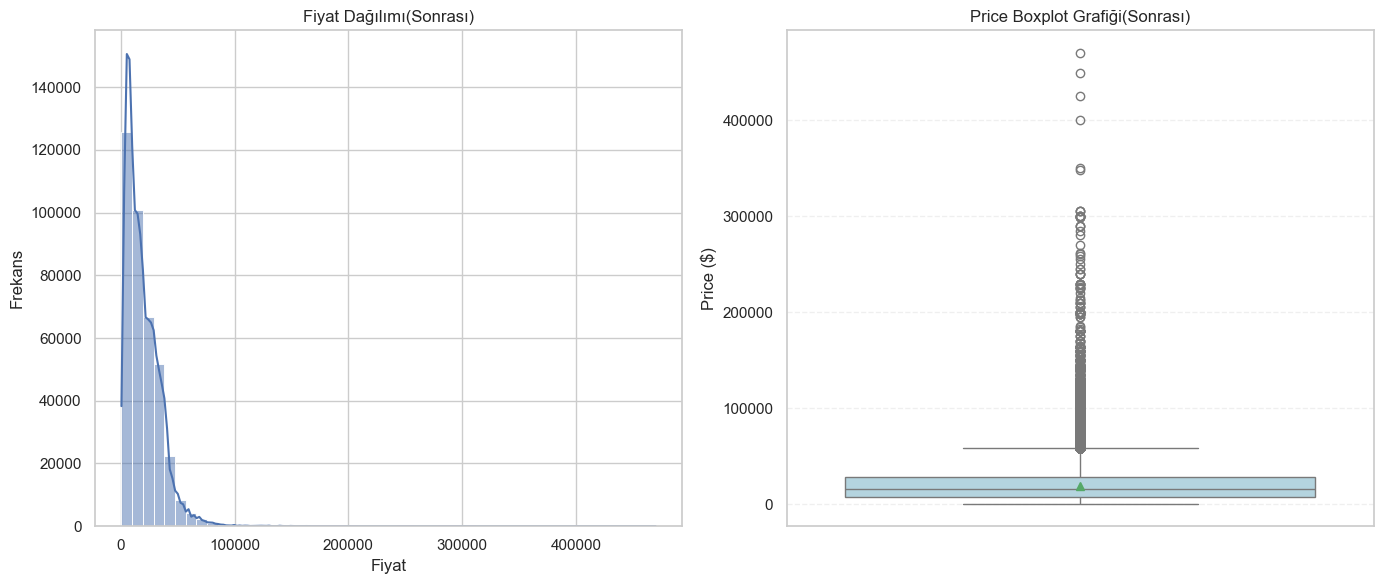

In [37]:
#2.17 Sonrasında aşşağıdaki grafikte gözüktüğü üzere grafiklerimiz düzeldi.

plt.figure(figsize=(14,6))  


plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Sonrası)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")


plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Sonrası)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


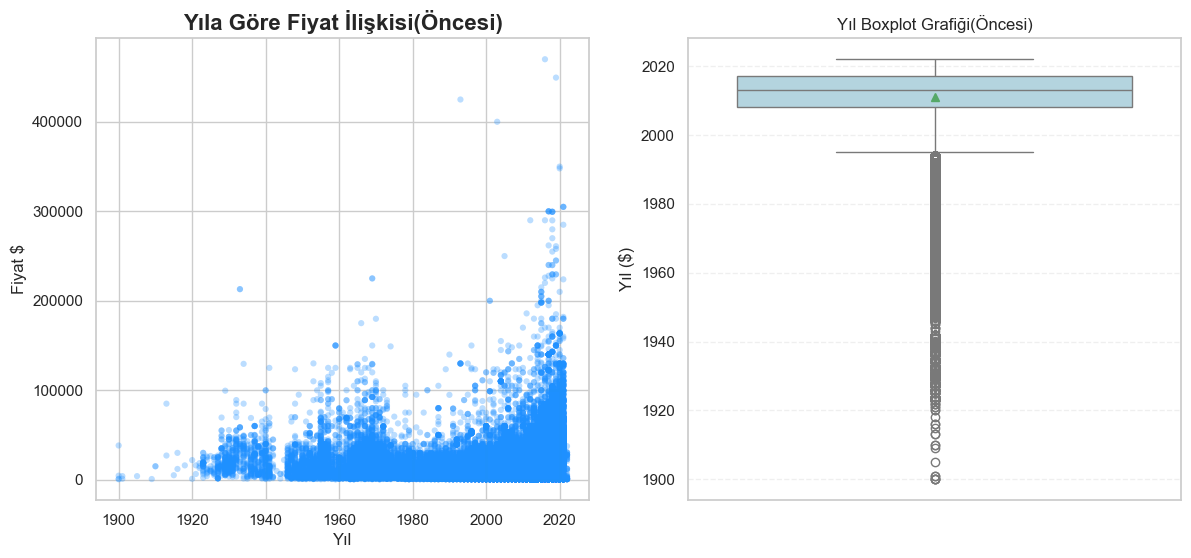

In [38]:
#2.18 Şimdi price kolonu outlierlerdan temizlendiği için diğer kolonlarla karşılaştırıp
#     istem dışı bir durum olup olmadığına bakacağız.

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Öncesi)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Öncesi)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

In [39]:
#2.19 1980 den daha yaşlı araçlar antika sayılabilir hurda olabilir bu sebeple fiyat aralığı çok saçma ve bizim amacımız olan
#     güncel arabaların fiyat tahmini amacına yardımcı olmuyor bu sebeple 1980 den daha önce üretilmiş arabaları df den siliyoruz. 
df = df[df["year"]>=1980]

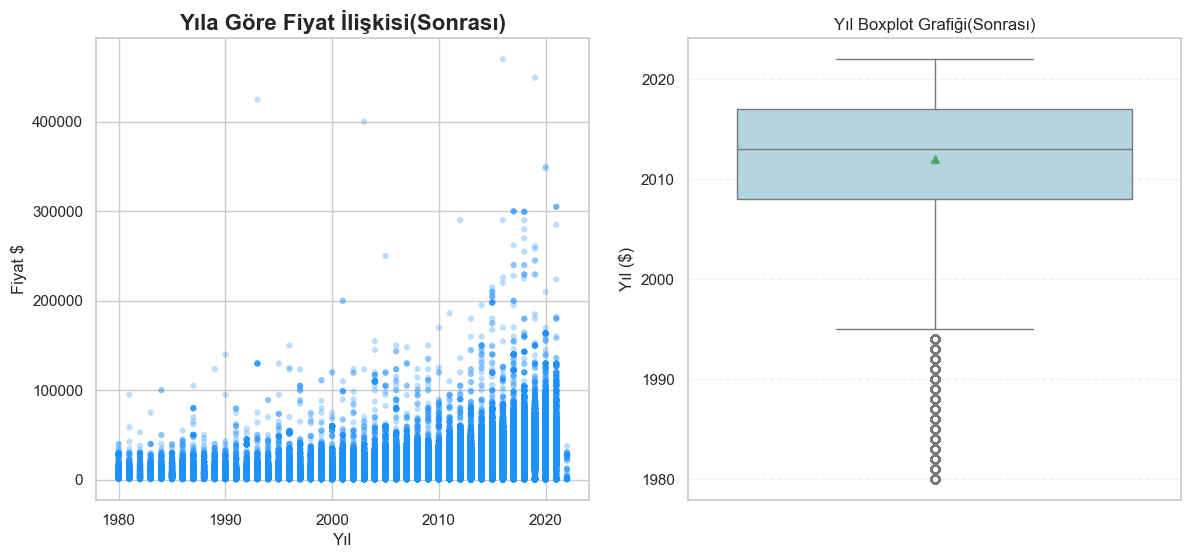

In [40]:
#2.20 Sonrasında gözüktüğü üzere daha temiz ve tutarlı grafikler elde ediyoruz.
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Sonrası)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Sonrası)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

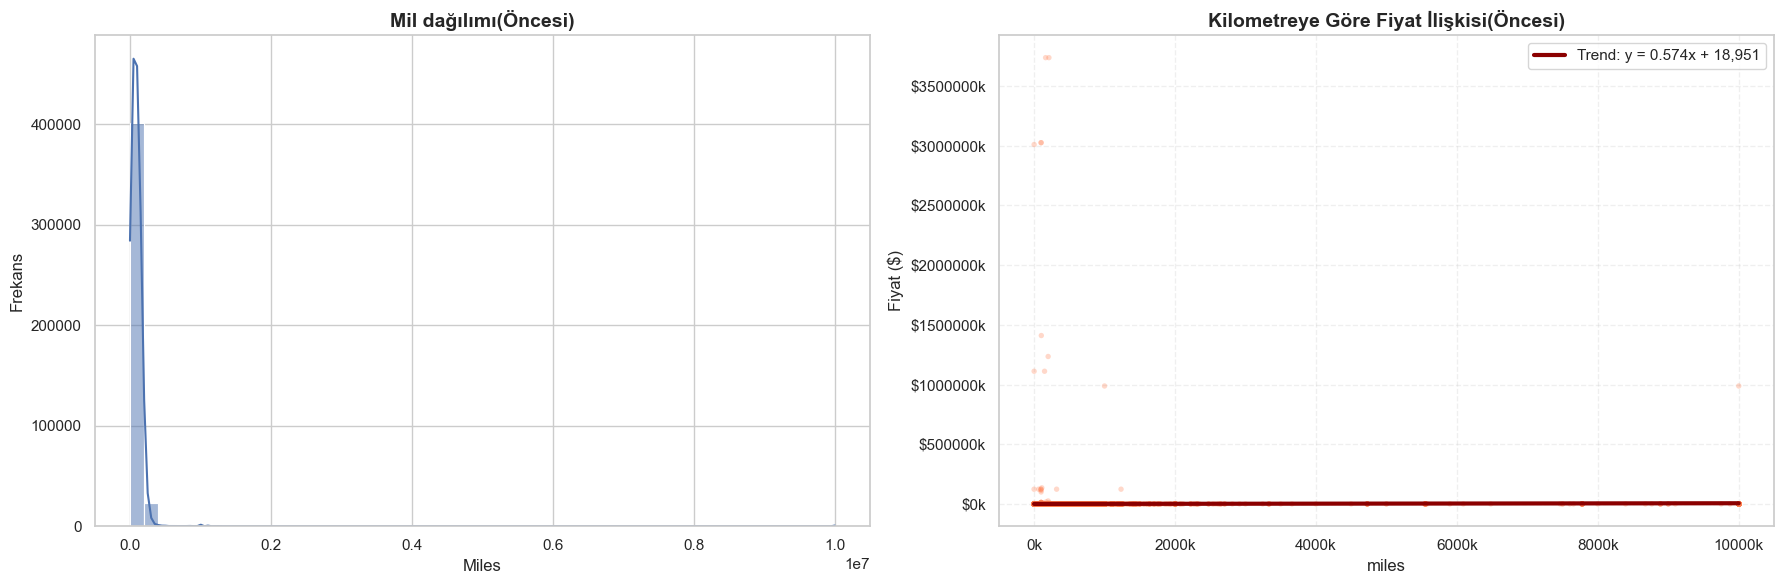

In [41]:
#2.21 Mil dağılımının frekansını ve fiyat ile ilişkisini görmek istiyoruz bunu yaparken önceden kaydettiğimiz df_eda değişkenini kullanacağız

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df_eda['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Öncesi)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df_eda['odometer'], df_eda['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df_eda['odometer'], df_eda['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df_eda['odometer'].unique()), 
             p(sorted(df_eda['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Öncesi)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

# Formatter fonksiyonları
def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

# Sağ grafiğe formatter uygula
axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

In [42]:
#2.22 Grafik düzgün gözükmüyor bu sebeple outlier analizi yapacağız.

In [43]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count     372901.000
mean       97644.466
std       147899.198
min            0.000
25%        39253.000
50%        89000.000
75%       137193.000
max     10000000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[10000000. 10000000. 10000000. 10000000. 10000000. 10000000. 10000000.
 10000000. 10000000. 10000000.  9999999.  9999999.  9999999.  9999999.
  9999999.  9999999.  9999999.  9999999.  9999999.  9999999.]

EXTREME DEĞERLER:
300k+ miles: 2,633 araba (0.70%)
400k+ miles: 1,176 araba (0.31%)
500k+ miles: 912 araba (0.24%)
1M+ miles: 333 araba (0.09%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 888 araba
0-1000 miles: 6,658 araba
1000-5000 miles: 6,884 araba


In [44]:
#2.23 300.000 mil 482.803 kilometre yapar bu değerin üstündeki araçlar hurda olmaya daha meilli olduğu için
#     ve bu verileri azınlıkta olduğu için (yaklaşık %1) 300.000 mil üzeri araçları df den siliyoruz. 

print(f"300.000 milden yüksek araç sayısı:{len(df[df["odometer"] > 300000])}")

df = df[df["odometer"]<=300000]


print("\ndf_eda güncelleniyor...")
df_eda = df.copy()
df_eda["odometer"] = df_eda.groupby(["manufacturer","type","year"])["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)
if df_eda['odometer'].isnull().sum() > 0:
    df_eda['odometer'].fillna(df_eda['odometer'].median(), inplace=True)
print(f"df_eda güncellendi")

300.000 milden yüksek araç sayısı:2414

df_eda güncelleniyor...
df_eda güncellendi


In [45]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count   370487.000
mean     92837.771
std      62007.550
min          0.000
25%      39000.000
50%      88405.000
75%     136000.000
max     300000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000.]

EXTREME DEĞERLER:
300k+ miles: 219 araba (0.06%)
400k+ miles: 0 araba (0.00%)
500k+ miles: 0 araba (0.00%)
1M+ miles: 0 araba (0.00%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 888 araba
0-1000 miles: 6,658 araba
1000-5000 miles: 6,884 araba


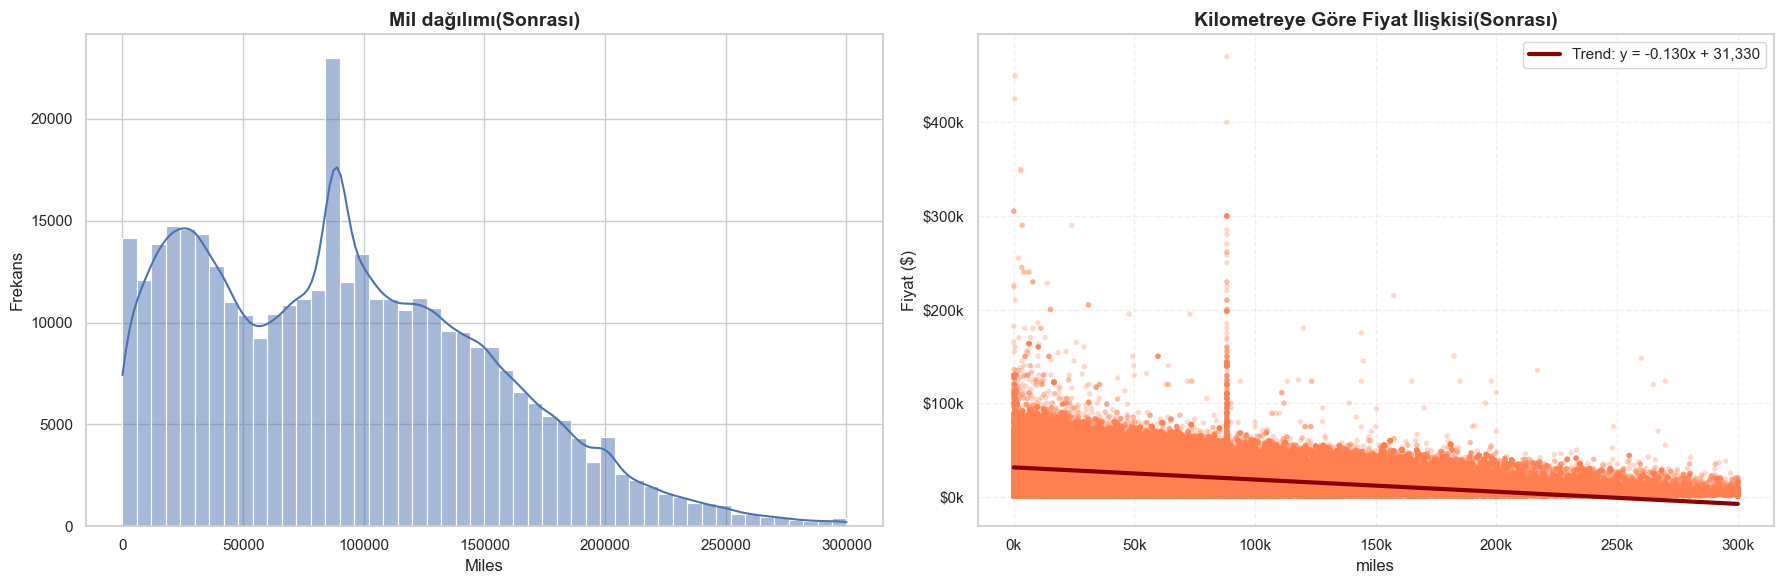

In [46]:
#2.24 Artık gözüktüğü üzere daha tutarlı ve güncel araba fiyat tahmini için daha verimli tablolara sahibiz.

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df_eda['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Sonrası)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df_eda['odometer'], df_eda['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df_eda['odometer'], df_eda['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df_eda['odometer'].unique()), 
             p(sorted(df_eda['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Sonrası)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

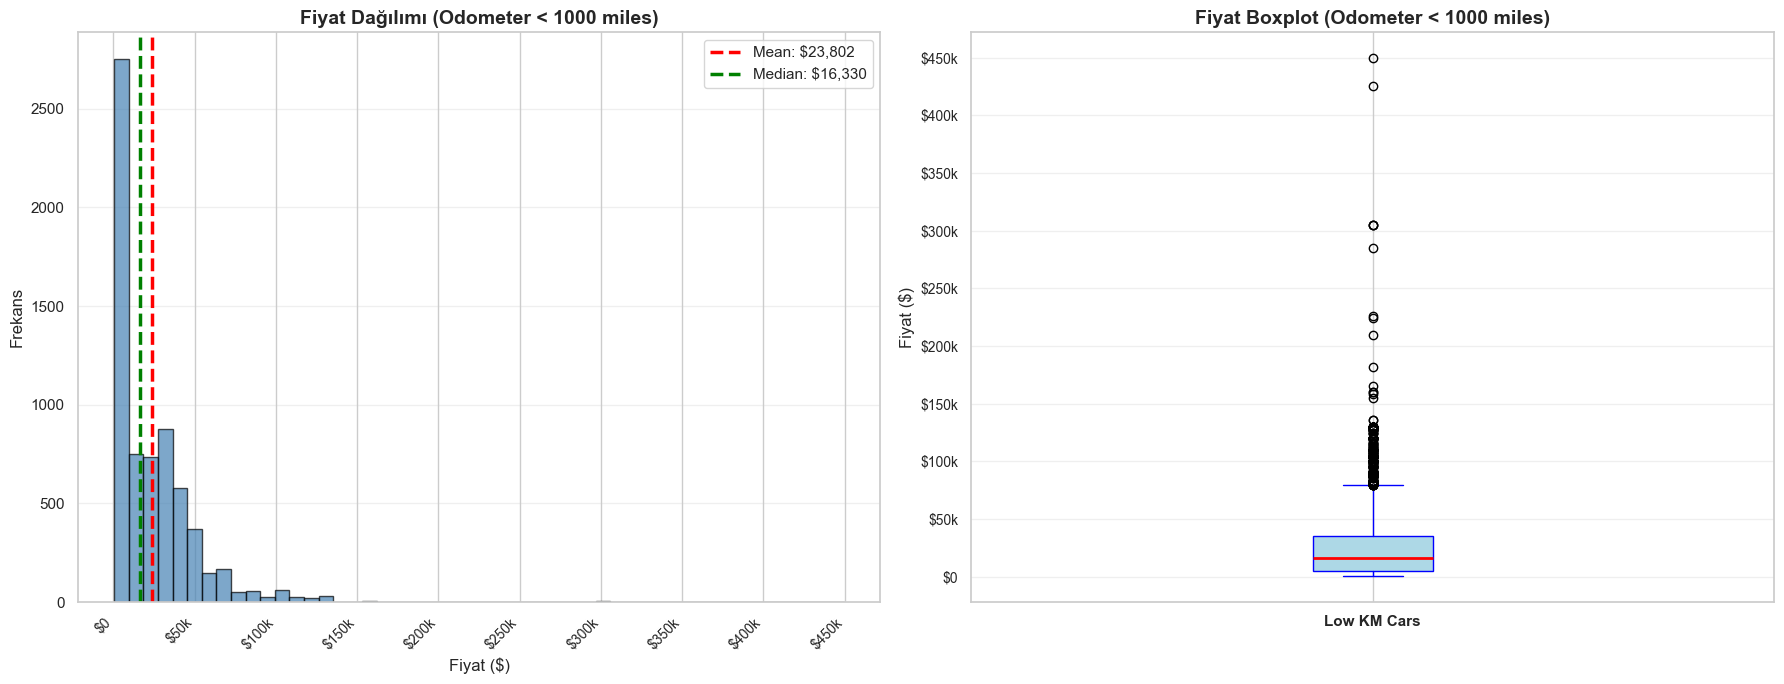

DÜŞÜK KM ARABALAR ANALİZİ (Odometer < 1000 miles)
Toplam araba sayısı: 6,658
Yüzde: 1.80%

Ortalama fiyat: $23,802
Median fiyat: $16,330
Min fiyat: $500
Max fiyat: $449,500
Std: $26,400

Ortalama yıl: 2013

En popüler manufacturer:
manufacturer
ford         1152
chevrolet    1056
toyota        402
jeep          389
dodge         271
Name: count, dtype: int64


In [47]:
# ============================================================================
# LOW KM CARS ANALİZİ (<1000 miles) - OUTLIER'LAR KORUNUYOR
# ============================================================================

low_km_cars = df[df['odometer'] < 1000]

# ============================================================================
# GRAFİKLER (OKUNUR VE DÜZGÜN)
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ============================================================================
# 1) Histogram (Sol)
# ============================================================================
axes[0].hist(low_km_cars['price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

# Mean ve Median çizgileri
axes[0].axvline(low_km_cars['price'].mean(), color='red', linestyle='--', 
                linewidth=2.5, label=f'Mean: ${low_km_cars["price"].mean():,.0f}')
axes[0].axvline(low_km_cars['price'].median(), color='green', linestyle='--', 
                linewidth=2.5, label=f'Median: ${low_km_cars["price"].median():,.0f}')

# Başlık ve etiketler
axes[0].set_title('Fiyat Dağılımı (Odometer < 1000 miles)', 
                  fontsize=14, weight='bold')
axes[0].set_xlabel('Fiyat ($)', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)

# Legend
axes[0].legend(fontsize=11, loc='upper right')

# Grid
axes[0].grid(axis='y', alpha=0.3)

# X ekseni etiketleri (MANUEL - OKUNUR)
axes[0].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
axes[0].set_xticklabels(['$0', '$50k', '$100k', '$150k', '$200k', '$250k', 
                         '$300k', '$350k', '$400k', '$450k'], 
                        rotation=45, ha='right', fontsize=10)

# ============================================================================
# 2) Boxplot (Sağ)
# ============================================================================
bp = axes[1].boxplot(low_km_cars['price'], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='red', linewidth=2))

# Başlık ve etiketler
axes[1].set_title('Fiyat Boxplot (Odometer < 1000 miles)', 
                  fontsize=14, weight='bold')
axes[1].set_ylabel('Fiyat ($)', fontsize=12)

# Grid
axes[1].grid(axis='y', alpha=0.3)

# Y ekseni etiketleri (MANUEL - OKUNUR)
axes[1].set_yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
axes[1].set_yticklabels(['$0', '$50k', '$100k', '$150k', '$200k', '$250k', 
                         '$300k', '$350k', '$400k', '$450k'], fontsize=10)

# X ekseni
axes[1].set_xticklabels(['Low KM Cars'], fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER
# ============================================================================
print("="*70)
print("DÜŞÜK KM ARABALAR ANALİZİ (Odometer < 1000 miles)")
print("="*70)
print(f"Toplam araba sayısı: {len(low_km_cars):,}")
print(f"Yüzde: {len(low_km_cars)/len(df)*100:.2f}%")

print(f"\nOrtalama fiyat: ${low_km_cars['price'].mean():,.0f}")
print(f"Median fiyat: ${low_km_cars['price'].median():,.0f}")
print(f"Min fiyat: ${low_km_cars['price'].min():,.0f}")
print(f"Max fiyat: ${low_km_cars['price'].max():,.0f}")
print(f"Std: ${low_km_cars['price'].std():,.0f}")

print(f"\nOrtalama yıl: {low_km_cars['year'].mean():.0f}")

print(f"\nEn popüler manufacturer:")
print(low_km_cars['manufacturer'].value_counts().head(5))
print("="*70)

In [48]:
#2.25 Numeric değerlerin analizlerini yaptık outlier değerleri tespit edip sildik artık sırada kategorik değişkenler var.
#     Öncelikle genel bir yorum yapabilmek için her bir kategorik değişken için grafik oluşturucağız. 

KATEGORIK DEGISKENLER GENEL BAKIS

Toplam kategorik degisken: 11
Degiskenler: ['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'model_clean', 'model_normalized']

        Degisken  Unique  Total  Null En Populer  En Populer Adet En Populer %
          region     404 370487     0   columbus             3243         0.9%
    manufacturer      41 358400 12087       ford            61222        16.5%
           model   25041 366881  3606      f-150             6838         1.8%
       condition       6 370487     0  excellent           188679        50.9%
            fuel       4 370487     0        gas           339569        91.7%
    title_status       6 370487     0      clean           358084        96.7%
    transmission       2 370487     0  automatic           350932        94.7%
           drive       3 370487     0        4wd           171416        46.3%
            type      14 370487     0      sedan           103233    

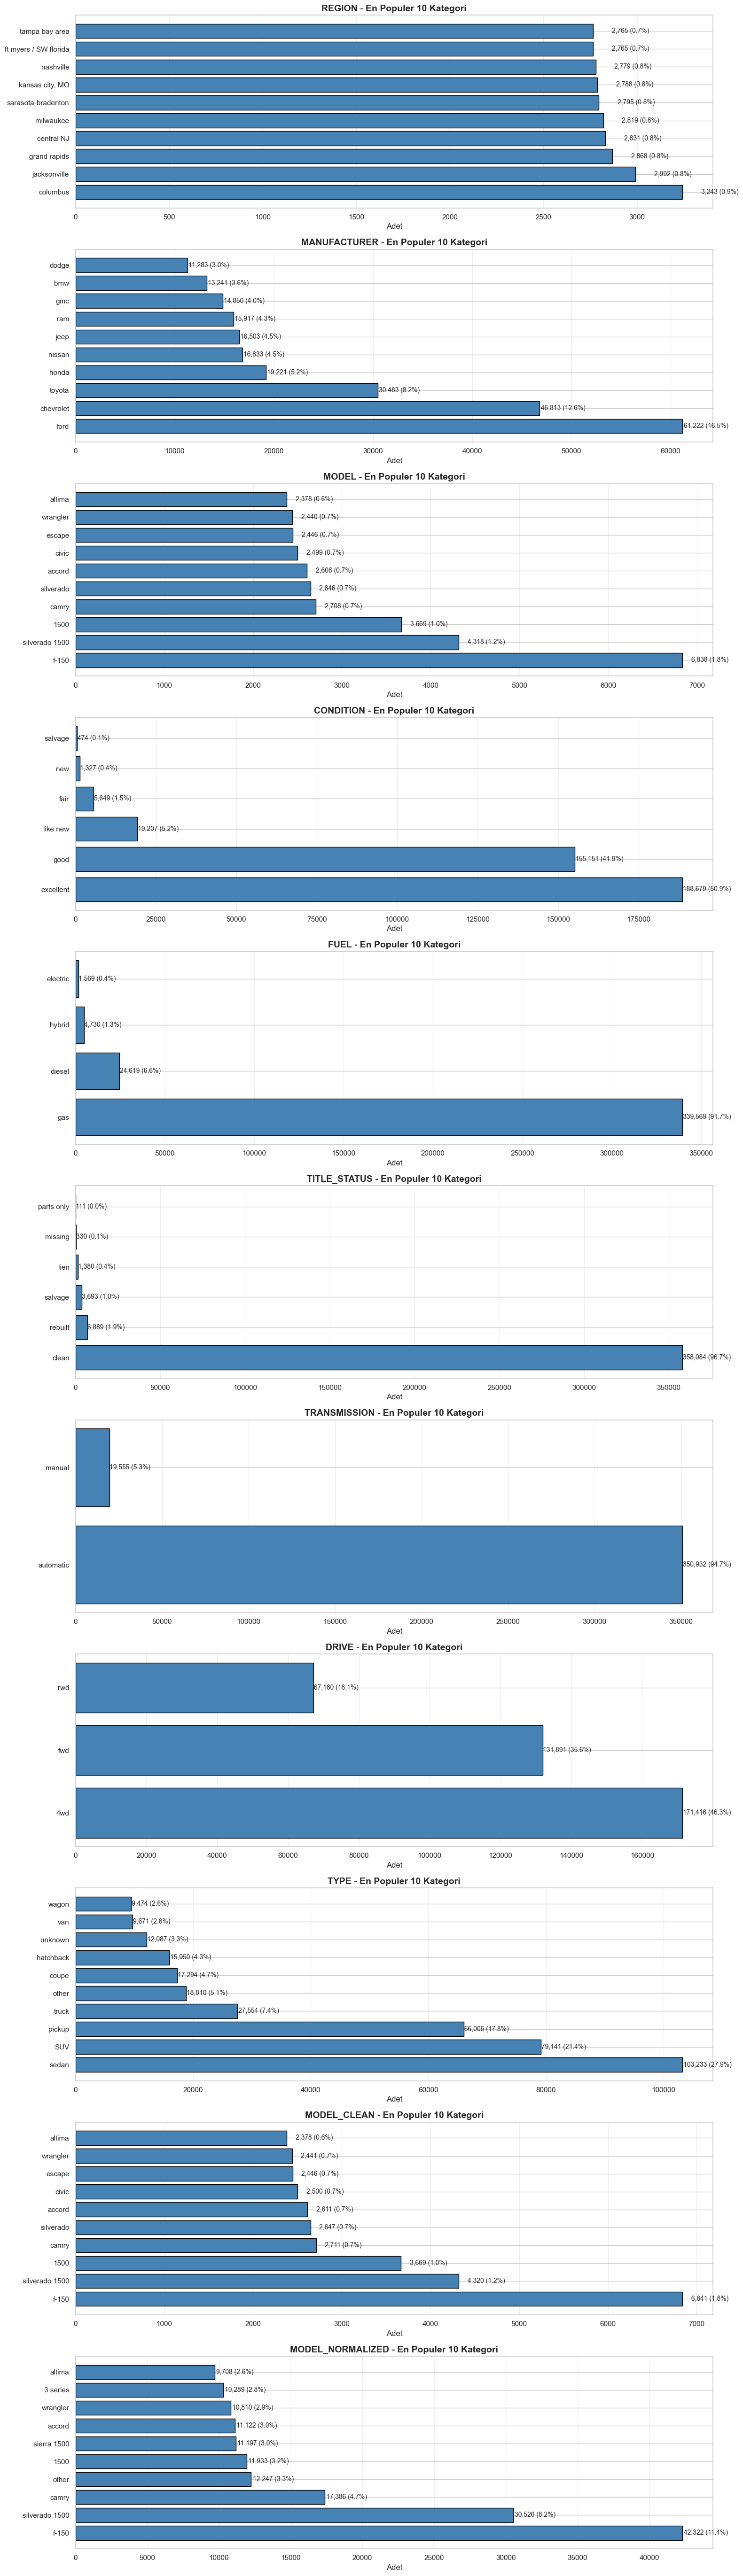


DETAYLI KATEGORI DAGILIMI

REGION:
------------------------------------------------------------
  columbus             :   3,243 ( 0.88%)
  jacksonville         :   2,992 ( 0.81%)
  grand rapids         :   2,868 ( 0.77%)
  central NJ           :   2,831 ( 0.76%)
  milwaukee            :   2,819 ( 0.76%)
  sarasota-bradenton   :   2,795 ( 0.75%)
  kansas city, MO      :   2,788 ( 0.75%)
  nashville            :   2,779 ( 0.75%)
  ft myers / SW florida :   2,765 ( 0.75%)
  tampa bay area       :   2,765 ( 0.75%)
  ... ve 394 kategori daha

MANUFACTURER:
------------------------------------------------------------
  ford                 :  61,222 (16.52%)
  chevrolet            :  46,813 (12.64%)
  toyota               :  30,483 ( 8.23%)
  honda                :  19,221 ( 5.19%)
  nissan               :  16,833 ( 4.54%)
  jeep                 :  16,503 ( 4.45%)
  ram                  :  15,917 ( 4.30%)
  gmc                  :  14,850 ( 4.01%)
  bmw                  :  13,241 ( 3.57%)
 

In [49]:
print("="*80)
print("KATEGORIK DEGISKENLER GENEL BAKIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nToplam kategorik degisken: {len(categorical_cols)}")
print(f"Degiskenler: {categorical_cols}")

summary_data = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    total_count = df[col].count()
    null_count = df[col].isnull().sum()
    top_category = df[col].value_counts().index[0] if len(df[col].value_counts()) > 0 else 'N/A'
    top_count = df[col].value_counts().values[0] if len(df[col].value_counts()) > 0 else 0
    top_percent = (top_count / len(df)) * 100 if len(df) > 0 else 0
    
    summary_data.append({
        'Degisken': col,
        'Unique': unique_count,
        'Total': total_count,
        'Null': null_count,
        'En Populer': top_category,
        'En Populer Adet': top_count,
        'En Populer %': f"{top_percent:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print(summary_df.to_string(index=False))
print("="*80)

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 5*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    top_10 = df[col].value_counts().head(10)
    
    axes[idx].barh(range(len(top_10)), top_10.values, color='steelblue', edgecolor='black')
    axes[idx].set_yticks(range(len(top_10)))
    axes[idx].set_yticklabels(top_10.index)
    axes[idx].set_title(f'{col.upper()} - En Populer 10 Kategori', fontsize=14, weight='bold')
    axes[idx].set_xlabel('Adet', fontsize=12)
    axes[idx].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_10.values):
        axes[idx].text(v + 100, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DETAYLI KATEGORI DAGILIMI")
print("="*80)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 60)
    value_counts = df[col].value_counts().head(10)
    for category, count in value_counts.items():
        percent = (count / len(df)) * 100
        print(f"  {category:20} : {count:7,} ({percent:5.2f}%)")
    if df[col].nunique() > 10:
        print(f"  ... ve {df[col].nunique() - 10} kategori daha")
print("="*80)

In [50]:
#Yukarıdaki tabloyu incelediğim zaman gözüme ilk çarpan condition kısmındaki excellent araba oranının fazlalığı oldu.
#Bu sebeple aşşağıda km condition grafiği çizerek incelemek isityorum. 

CONDITION vs ODOMETER ANALİZİ
df_eda null kontrolü: 0


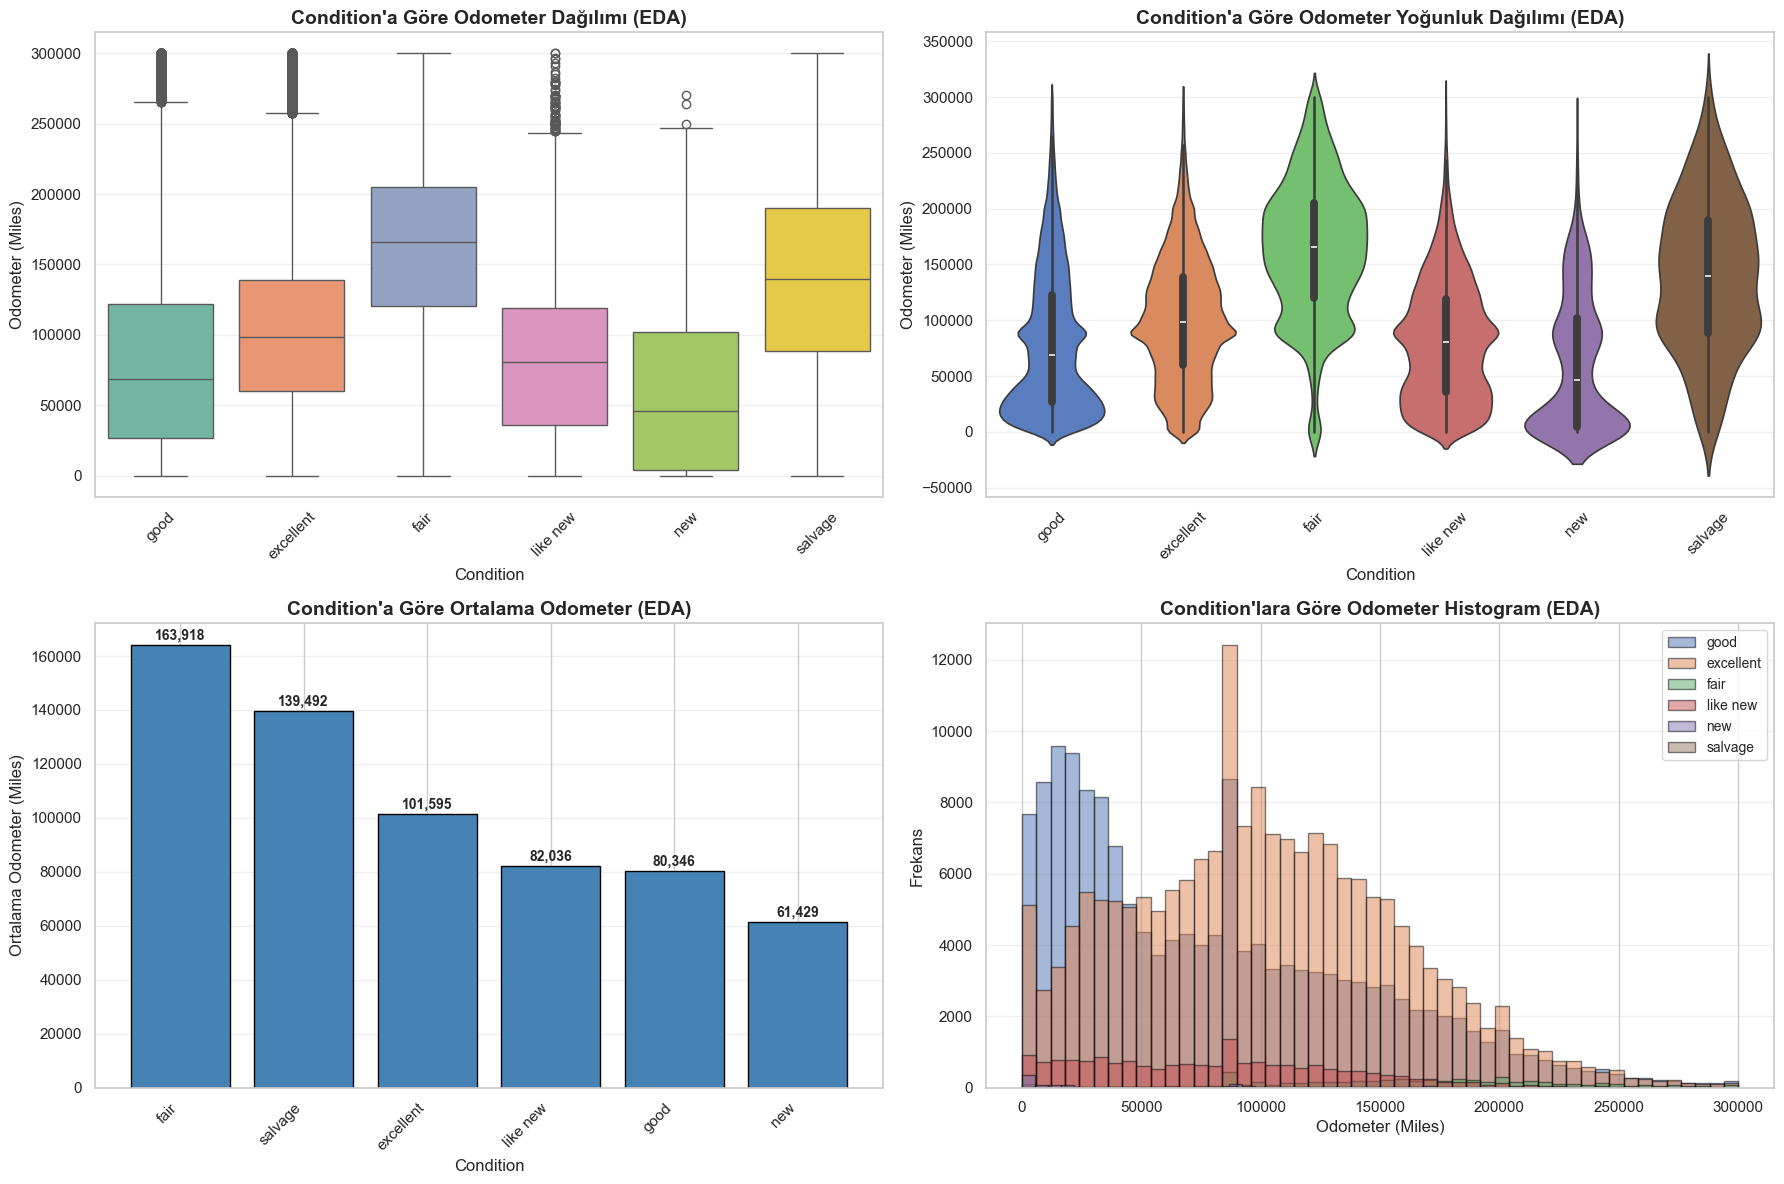


CONDITION vs ODOMETER İSTATİSTİKLERİ (EDA - Null doldurulmuş)
            count       mean     median       std   min        max
condition                                                         
fair         5649 163917.997 166000.000 61263.745 0.000 300000.000
salvage       474 139492.025 140000.000 67237.138 0.000 300000.000
excellent  188679 101595.391  98291.000 56190.897 0.000 300000.000
like new    19207  82035.900  80911.000 53869.251 0.000 300000.000
good       155151  80346.496  68696.000 62958.802 0.000 300000.000
new          1327  61429.376  46000.000 60391.235 0.000 270807.000

CONDITION BAZINDA DETAYLI ANALİZ (EDA)

FAIR:
  Araba sayısı: 5,649
  Ortalama mil: 163,918
  Median mil: 166,000
  En düşük: 0
  En yüksek: 300,000
  Standart sapma: 61,264

SALVAGE:
  Araba sayısı: 474
  Ortalama mil: 139,492
  Median mil: 140,000
  En düşük: 0
  En yüksek: 300,000
  Standart sapma: 67,237

EXCELLENT:
  Araba sayısı: 188,679
  Ortalama mil: 101,595
  Median mil: 98,291
  En düşü

In [51]:
print("="*80)
print("CONDITION vs ODOMETER ANALİZİ")
print("="*80)

# ============================================================================
# GEÇİCİ KOPYA OLUŞTUR (Sadece bu grafik için)
# ============================================================================
df_eda = df.copy()

# Odometer null'larını doldur
df_eda['odometer'] = df_eda.groupby(['manufacturer', 'type', 'year'])['odometer'].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

# Kalan null'ları (eğer varsa) genel median ile doldur
if df_eda['odometer'].isnull().sum() > 0:
    overall_median = df_eda['odometer'].median()
    df_eda['odometer'].fillna(overall_median, inplace=True)

print(f"df_eda null kontrolü: {df_eda['odometer'].isnull().sum()}")  # 0 olmalı
print("="*80)

# ============================================================================
# GRAFİKLERİ ÇİZ (df_eda kullan)
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Boxplot
sns.boxplot(data=df_eda, x='condition', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Condition\'a Göre Odometer Dağılımı (EDA)', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Condition', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Violin Plot
sns.violinplot(data=df_eda, x='condition', y='odometer', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Condition\'a Göre Odometer Yoğunluk Dağılımı (EDA)', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Condition', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Bar Chart (Ortalama)
condition_avg = df_eda.groupby('condition')['odometer'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(condition_avg)), condition_avg.values, color='steelblue', edgecolor='black')
axes[1, 0].set_xticks(range(len(condition_avg)))
axes[1, 0].set_xticklabels(condition_avg.index, rotation=45, ha='right')
axes[1, 0].set_title('Condition\'a Göre Ortalama Odometer (EDA)', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Condition', fontsize=12)
axes[1, 0].set_ylabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(condition_avg.values):
    axes[1, 0].text(i, v + 2000, f'{v:,.0f}', ha='center', fontsize=10, weight='bold')

# 4. Histogram (Overlapping)
for condition in df_eda['condition'].unique():
    subset = df_eda[df_eda['condition'] == condition]['odometer']
    axes[1, 1].hist(subset, bins=50, alpha=0.5, label=condition, edgecolor='black')

axes[1, 1].set_title('Condition\'lara Göre Odometer Histogram (EDA)', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Odometer (Miles)', fontsize=12)
axes[1, 1].set_ylabel('Frekans', fontsize=12)
axes[1, 1].legend(loc='upper right', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER (df_eda kullan)
# ============================================================================
print("\n" + "="*80)
print("CONDITION vs ODOMETER İSTATİSTİKLERİ (EDA - Null doldurulmuş)")
print("="*80)

condition_stats = df_eda.groupby('condition')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
condition_stats = condition_stats.sort_values('mean', ascending=False)
print(condition_stats)
print("="*80)

# Detaylı Analiz
print("\n" + "="*80)
print("CONDITION BAZINDA DETAYLI ANALİZ (EDA)")
print("="*80)

for condition in condition_stats.index:
    data = df_eda[df_eda['condition'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

# ============================================================================
# GEÇİCİ VERİYİ SİL
# ============================================================================
del df_eda
print("\nGrafik ve istatistikler tamamlandı, geçici veri silindi")
print("="*80)

CONDITION DÜZELTME İŞLEMİ BAŞLIYOR...

1) Condition düzeltiliyor (odometer + condition kombinasyonu)...

2) Değişim analizi yapılıyor...
   Toplam 251,936 satırda condition değişti (68.00%)

ÖNCESİ vs SONRASI KARŞILAŞTIRMA

ORİJİNAL CONDITION DAĞILIMI:
condition_original
excellent    188679
fair           5649
good         155151
like new      19207
new            1327
salvage         474
Name: count, dtype: int64

Toplam: 370,487

DÜZELTİLMİŞ CONDITION DAĞILIMI:
condition_corrected
excellent    147880
fair          50134
good         110218
like new      52359
new            9422
salvage         474
Name: count, dtype: int64

Toplam: 370,487

DÜZELTİLMİŞ CONDITION vs ODOMETER İSTATİSTİKLERİ
                      count       mean     median       std        min  \
condition_corrected                                                      
new                    9422   3008.344   1136.000  3387.801      0.000   
like new              52359  24186.632  24997.000 15199.096      0.000   
exc

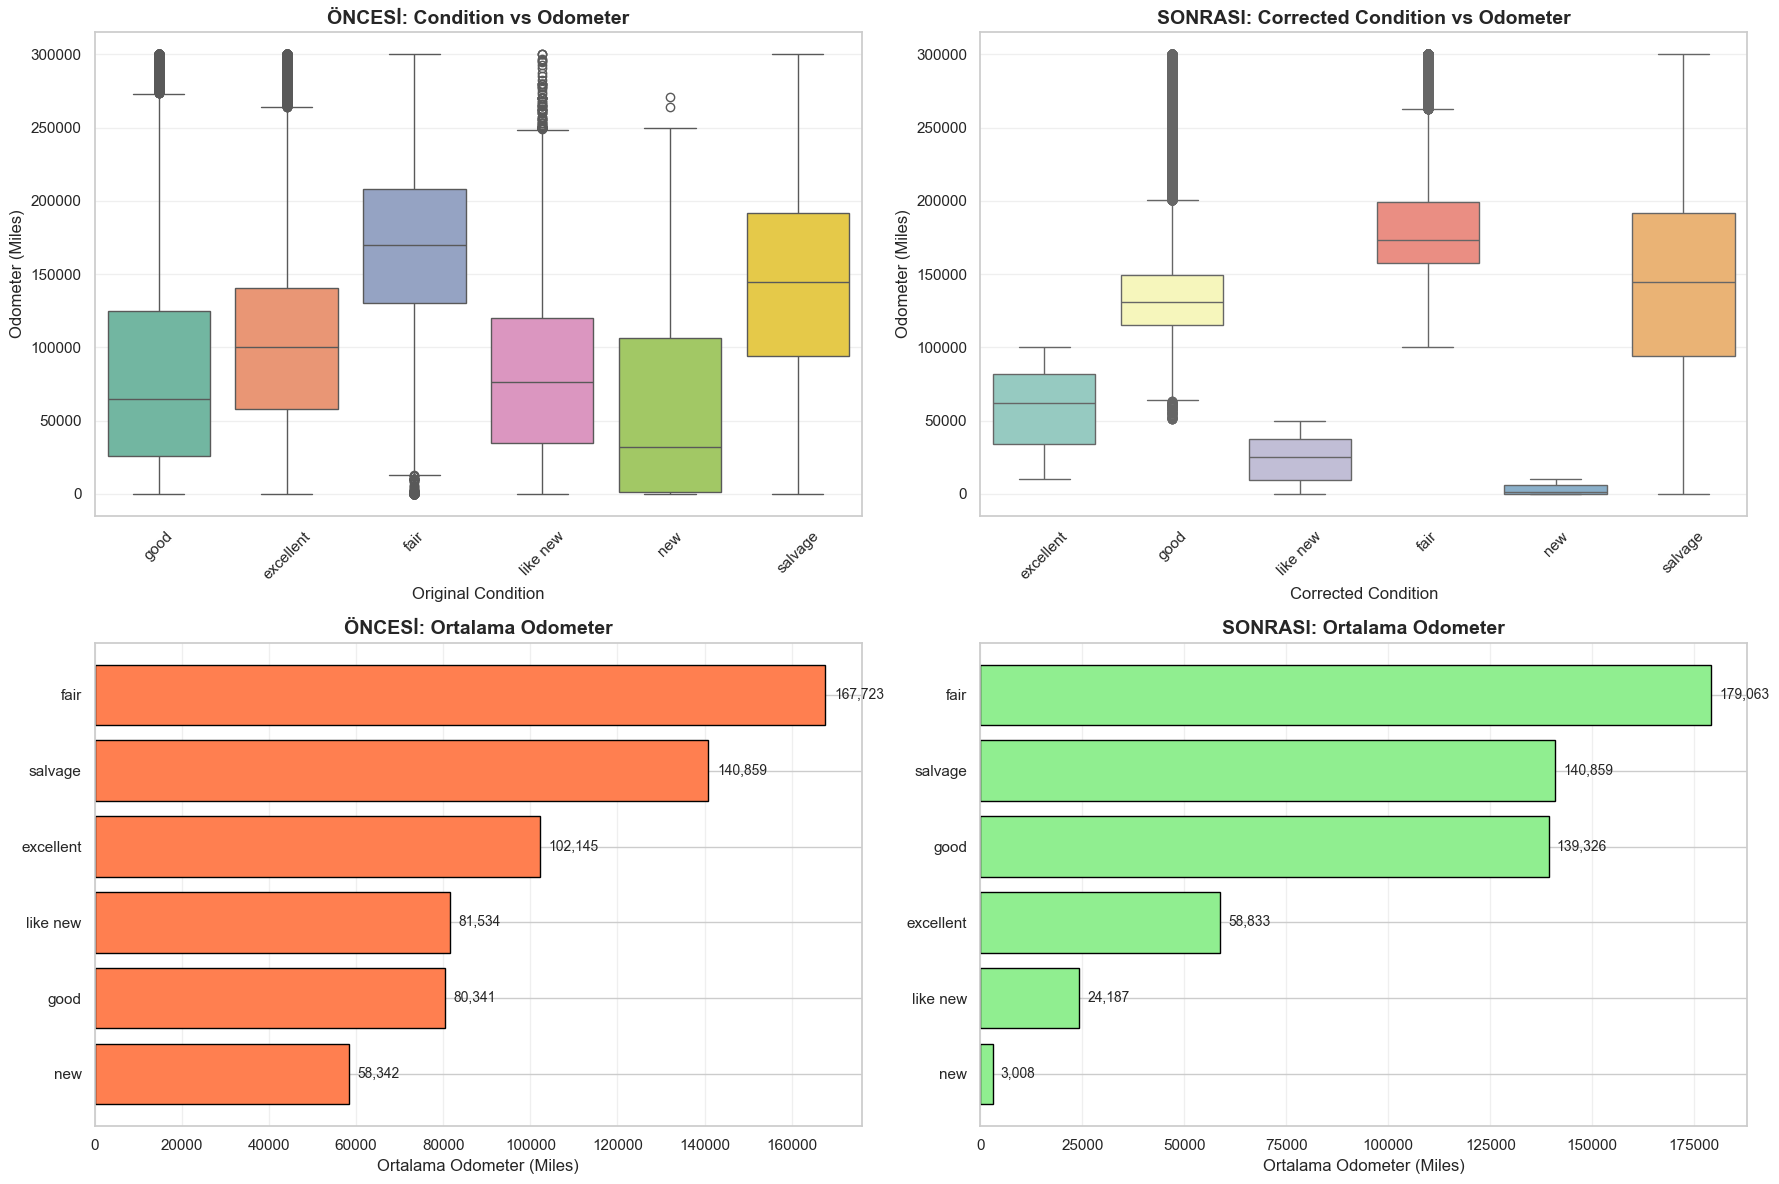


DEĞİŞİM MATRİSİ (ORİJİNAL → DÜZELTİLMİŞ)
condition_corrected  excellent   fair    good  like new   new  salvage     All
condition_original                                                            
excellent                54159  37949   56391     32765  7415        0  188679
fair                        87   4893     523       146     0        0    5649
good                     87926      0   53304     13921     0        0  155151
like new                  5473   6942       0      5253  1539        0   19207
new                        235    350       0       274   468        0    1327
salvage                      0      0       0         0     0      474     474
All                     147880  50134  110218     52359  9422      474  370487

CONDITION DÜZELTME TAMAMLANDI!
Yeni sütun: 'condition_corrected'
Orijinal sütun korundu: 'condition_original'
Toplam değişim: 251,936 satır (68.00%)


In [52]:
#2.26 BURADAN DEVAM EDECEĞİZ CONDİTİON KOLONU KULLANICININ YORUMUNA KALDIĞI İÇİN GÜVENİLİR DEĞİL BU SEBEPLE
#     Condition kolonunu odometer kolonu ile gruplayıp tekrradan oluşturacağız


# ============================================================================
# STRATEJİ 1: CONDITION DÜZELTME (MİL BAZLI YENİDEN KATEGORİZASYON)
# ============================================================================

print("="*80)
print("CONDITION DÜZELTME İŞLEMİ BAŞLIYOR...")
print("="*80)

# Orijinal condition'ı yedekle
df['condition_original'] = df['condition'].copy()

# Yeni condition_corrected sütunu oluştur
def correct_condition(row):
    """
    Odometer ve mevcut condition'a göre mantıklı condition ata
    """
    odometer = row['odometer']
    current_condition = row['condition']
    
    # SALVAGE her zaman salvage kalır (hasarlı araç)
    if current_condition == 'salvage':
        return 'salvage'
    
    # MİL BAZLI KATEGORİZASYON
    if odometer <= 10000:
        # 0-10k mil: Gerçekten yeni veya çok az kullanılmış
        if current_condition in ['new', 'like new', 'excellent']:
            return 'new'
        else:
            return 'like new'
    
    elif odometer <= 50000:
        # 10-50k mil: Yeni sayılır
        if current_condition in ['new', 'like new', 'excellent']:
            return 'like new'
        else:
            return 'excellent'
    
    elif odometer <= 100000:
        # 50-100k mil: İyi durumda
        if current_condition in ['new', 'like new', 'excellent', 'good']:
            return 'excellent'
        else:
            return 'good'
    
    elif odometer <= 150000:
        # 100-150k mil: Orta yaşlı
        if current_condition in ['excellent', 'good']:
            return 'good'
        else:
            return 'fair'
    
    else:
        # 150k+ mil: Yaşlı araç
        if current_condition == 'fair':
            return 'fair'
        elif current_condition == 'good':
            return 'good'
        else:
            return 'fair'

# Fonksiyonu uygula
print("\n1) Condition düzeltiliyor (odometer + condition kombinasyonu)...")
df['condition_corrected'] = df.apply(correct_condition, axis=1)

# Değişim analizi
print("\n2) Değişim analizi yapılıyor...")
changes = (df['condition_original'] != df['condition_corrected']).sum()
print(f"   Toplam {changes:,} satırda condition değişti ({changes/len(df)*100:.2f}%)")

# ============================================================================
# KARŞILAŞTIRMA ANALİZİ
# ============================================================================

print("\n" + "="*80)
print("ÖNCESİ vs SONRASI KARŞILAŞTIRMA")
print("="*80)

print("\nORİJİNAL CONDITION DAĞILIMI:")
print(df['condition_original'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

print("\nDÜZELTİLMİŞ CONDITION DAĞILIMI:")
print(df['condition_corrected'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

# ============================================================================
# İSTATİSTİKSEL KARŞILAŞTIRMA
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION vs ODOMETER İSTATİSTİKLERİ")
print("="*80)
corrected_stats = df.groupby('condition_corrected')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
corrected_stats = corrected_stats.sort_values('mean')
print(corrected_stats)

# ============================================================================
# DETAYLI ANALİZ
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION BAZINDA DETAYLI ANALİZ")
print("="*80)
for condition in corrected_stats.index:
    data = df[df['condition_corrected'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

# ============================================================================
# GÖRSELLEŞTİRME
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1) ÖNCESI: Boxplot
sns.boxplot(data=df, x='condition_original', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('ÖNCESİ: Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Original Condition', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2) SONRASI: Boxplot
sns.boxplot(data=df, x='condition_corrected', y='odometer', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('SONRASI: Corrected Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Corrected Condition', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3) ÖNCESI: Bar Chart (ortalama)
original_avg = df.groupby('condition_original')['odometer'].mean().sort_values()
axes[1, 0].barh(range(len(original_avg)), original_avg.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(original_avg)))
axes[1, 0].set_yticklabels(original_avg.index)
axes[1, 0].set_title('ÖNCESİ: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(original_avg.values):
    axes[1, 0].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

# 4) SONRASI: Bar Chart (ortalama)
corrected_avg = df.groupby('condition_corrected')['odometer'].mean().sort_values()
axes[1, 1].barh(range(len(corrected_avg)), corrected_avg.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_yticks(range(len(corrected_avg)))
axes[1, 1].set_yticklabels(corrected_avg.index)
axes[1, 1].set_title('SONRASI: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(corrected_avg.values):
    axes[1, 1].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# DEĞİŞİM MATRİSİ (Hangi condition'lar nasıl değişti?)
# ============================================================================

print("\n" + "="*80)
print("DEĞİŞİM MATRİSİ (ORİJİNAL → DÜZELTİLMİŞ)")
print("="*80)
change_matrix = pd.crosstab(df['condition_original'], df['condition_corrected'], margins=True)
print(change_matrix)

print("\n" + "="*80)
print("CONDITION DÜZELTME TAMAMLANDI!")
print("="*80)
print(f"Yeni sütun: 'condition_corrected'")
print(f"Orijinal sütun korundu: 'condition_original'")
print(f"Toplam değişim: {changes:,} satır ({changes/len(df)*100:.2f}%)")

In [53]:
df['condition'] = df['condition_corrected']
df.drop(columns=['condition_original', 'condition_corrected'], inplace=True)

In [54]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,lat,long,model_clean,model_normalized
27,auburn,33590,2014.000,gmc,sierra 1500 crew cab slt,excellent,8,gas,57923.000,clean,automatic,4wd,pickup,32.590,-85.480,sierra 1500 crew cab slt,sierra 1500
28,auburn,22590,2010.000,chevrolet,silverado 1500,excellent,8,gas,71229.000,clean,automatic,4wd,pickup,32.590,-85.480,silverado 1500,silverado 1500
29,auburn,39590,2020.000,chevrolet,silverado 1500 crew,excellent,8,gas,19160.000,clean,automatic,4wd,pickup,32.590,-85.480,silverado 1500 crew,silverado 1500
30,auburn,30990,2017.000,toyota,tundra double cab sr,excellent,8,gas,41124.000,clean,automatic,4wd,pickup,32.590,-85.480,tundra double cab sr,camry
31,auburn,15000,2013.000,ford,f-150 xlt,good,6,gas,128000.000,clean,automatic,rwd,truck,32.592,-85.519,f-150 xlt,f-150


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370487 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            370487 non-null  object 
 1   price             370487 non-null  int64  
 2   year              370487 non-null  float64
 3   manufacturer      358400 non-null  object 
 4   model             366881 non-null  object 
 5   condition         370487 non-null  object 
 6   cylinders         370487 non-null  int64  
 7   fuel              370487 non-null  object 
 8   odometer          370487 non-null  float64
 9   title_status      370487 non-null  object 
 10  transmission      370487 non-null  object 
 11  drive             370487 non-null  object 
 12  type              370487 non-null  object 
 13  lat               367120 non-null  float64
 14  long              367120 non-null  float64
 15  model_clean       366881 non-null  object 
 16  model_normalized  366872

In [56]:
#2.27 Condition düzeltildi kategorik değişkenlerin frekansları incelendi.
#     Şimdi sırada kategorik değişkenlerdeki outlier değerleri incelemede

KORELASYON MATRİSİ ANALİZİ

Korelasyon Matrisi:
           price  cylinders  odometer   year    lat   long
price      1.000      0.320    -0.523  0.527 -0.007 -0.090
cylinders  0.320      1.000     0.065 -0.096  0.008  0.011
odometer  -0.523      0.065     1.000 -0.576  0.034  0.023
year       0.527     -0.096    -0.576  1.000 -0.026 -0.007
lat       -0.007      0.008     0.034 -0.026  1.000 -0.128
long      -0.090      0.011     0.023 -0.007 -0.128  1.000


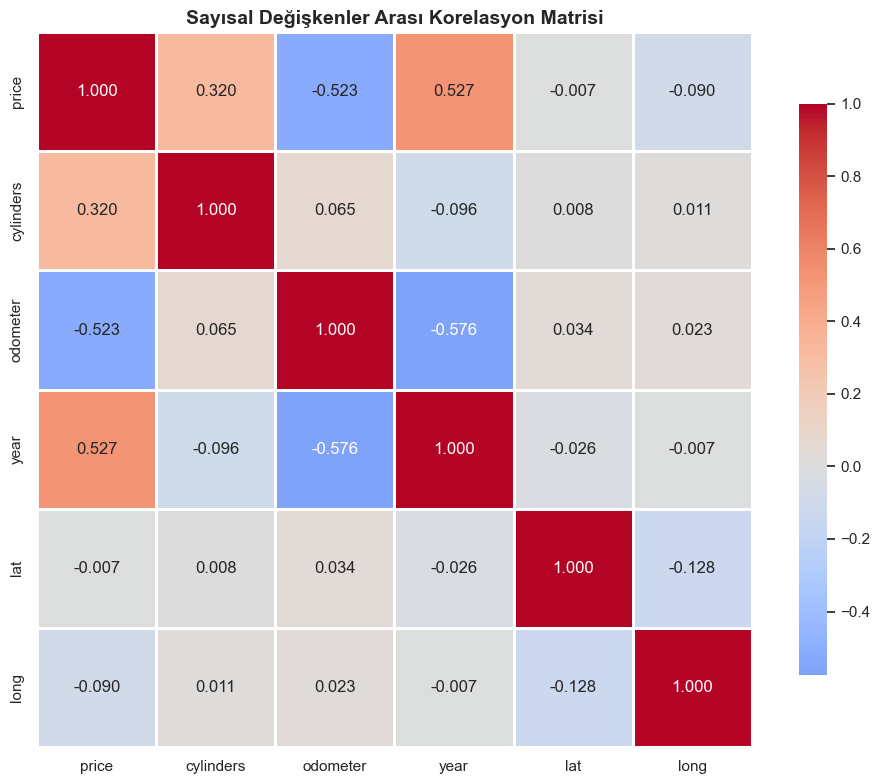


Price ile Korelasyonlar (Yüksekten Düşüğe):
   year                :  0.527
   cylinders           :  0.320
   lat                 : -0.007
   long                : -0.090
   odometer            : -0.523


In [57]:
#2.28 Sayısal değişkenler arasındaki korelasyonları analiz ediyoruz. Korelasyon matrisi ve heatmap ile
#     değişkenler arası ilişkileri görselleştiriyoruz.

# Sayısal kolonları seç
numeric_cols_for_corr = ['price', 'cylinders', 'odometer', 'year', 'lat', 'long']
numeric_cols_for_corr = [col for col in numeric_cols_for_corr if col in df.columns]

# Korelasyon matrisi hesapla
correlation_matrix = df[numeric_cols_for_corr].corr()

print("="*80)
print("KORELASYON MATRİSİ ANALİZİ")
print("="*80)
print("\nKorelasyon Matrisi:")
print(correlation_matrix.round(3))

# Heatmap görselleştirmesi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Price ile en yüksek korelasyonlu değişkenler
if 'price' in correlation_matrix.columns:
    price_corr = correlation_matrix['price'].drop('price').sort_values(ascending=False)
    print("\nPrice ile Korelasyonlar (Yüksekten Düşüğe):")
    for col, corr_val in price_corr.items():
        print(f"   {col:20}: {corr_val:6.3f}")
print("="*80)


MUTUAL INFORMATION (MI) ANALİZİ

Mutual Information Skorları (Yüksekten Düşüğe):
             Feature  MI_Score
            odometer     2.593
                long     1.701
                 lat     1.694
                year     0.625
      region_encoded     0.472
manufacturer_encoded     0.398
   condition_encoded     0.337
        type_encoded     0.315
           cylinders     0.163
       drive_encoded     0.150
        fuel_encoded     0.085
title_status_encoded     0.028
transmission_encoded     0.022


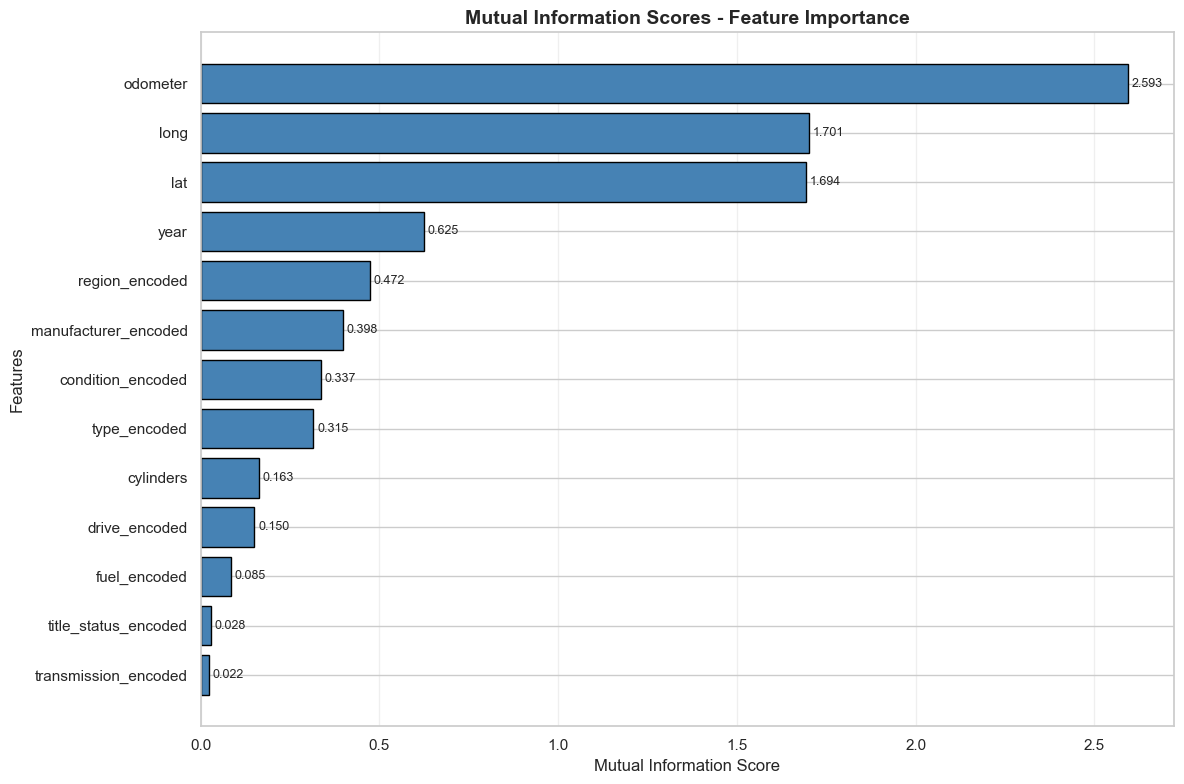


EN ÖNEMLİ 5 ÖZELLİK (MI'ye göre):
2. odometer                 : 2.5927
5. long                     : 1.7011
4. lat                      : 1.6937
3. year                     : 0.6254
13. region_encoded           : 0.4723


In [58]:
#2.29 Mutual Information (MI) analizi ile özellik-hedef ilişkilerini ölçüyoruz. MI, hem sayısal hem
#     kategorik değişkenler için çalışır ve doğrusal olmayan ilişkileri de yakalayabilir.

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

print("="*80)
print("MUTUAL INFORMATION (MI) ANALİZİ")
print("="*80)

# Sayısal değişkenler için MI
numeric_cols_mi = ['cylinders', 'odometer', 'year', 'lat', 'long']
numeric_cols_mi = [col for col in numeric_cols_mi if col in df.columns]

# Kategorik değişkenleri encode et (MI için)
categorical_cols_mi = ['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'title_status', 'region']
categorical_cols_mi = [col for col in categorical_cols_mi if col in df.columns]

# Kategorik değişkenleri encode et
df_mi = df.copy()
le_dict = {}
for col in categorical_cols_mi:
    le = LabelEncoder()
    df_mi[col + '_encoded'] = le.fit_transform(df_mi[col].astype(str))
    le_dict[col] = le

# Tüm feature'ları birleştir
all_features_mi = numeric_cols_mi + [col + '_encoded' for col in categorical_cols_mi]
X_mi = df_mi[all_features_mi].fillna(0)
y_mi = df_mi['price']

# MI hesapla
mi_scores = mutual_info_regression(X_mi, y_mi, random_state=42)

# Sonuçları DataFrame'e çevir
mi_results = pd.DataFrame({
    'Feature': all_features_mi,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\nMutual Information Skorları (Yüksekten Düşüğe):")
print(mi_results.to_string(index=False))

# Görselleştirme
plt.figure(figsize=(12, 8))
mi_results_sorted = mi_results.sort_values('MI_Score', ascending=True)
plt.barh(range(len(mi_results_sorted)), mi_results_sorted['MI_Score'].values, color='steelblue', edgecolor='black')
plt.yticks(range(len(mi_results_sorted)), mi_results_sorted['Feature'].values)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Mutual Information Scores - Feature Importance', fontsize=14, weight='bold')
plt.grid(axis='x', alpha=0.3)

# Değerleri bar'ların üzerine yazıyoruz
for i, v in enumerate(mi_results_sorted['MI_Score'].values):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("EN ÖNEMLİ 5 ÖZELLİK (MI'ye göre):")
print("="*80)
for idx, row in mi_results.head(5).iterrows():
    print(f"{idx+1}. {row['Feature']:25}: {row['MI_Score']:.4f}")
print("="*80)


PAIRPLOT GÖRSELLEŞTİRMESİ

Örneklem boyutu: 5,000 (Toplam: 370,487)
Analiz edilen değişkenler: ['price', 'cylinders', 'odometer', 'year', 'lat', 'long']


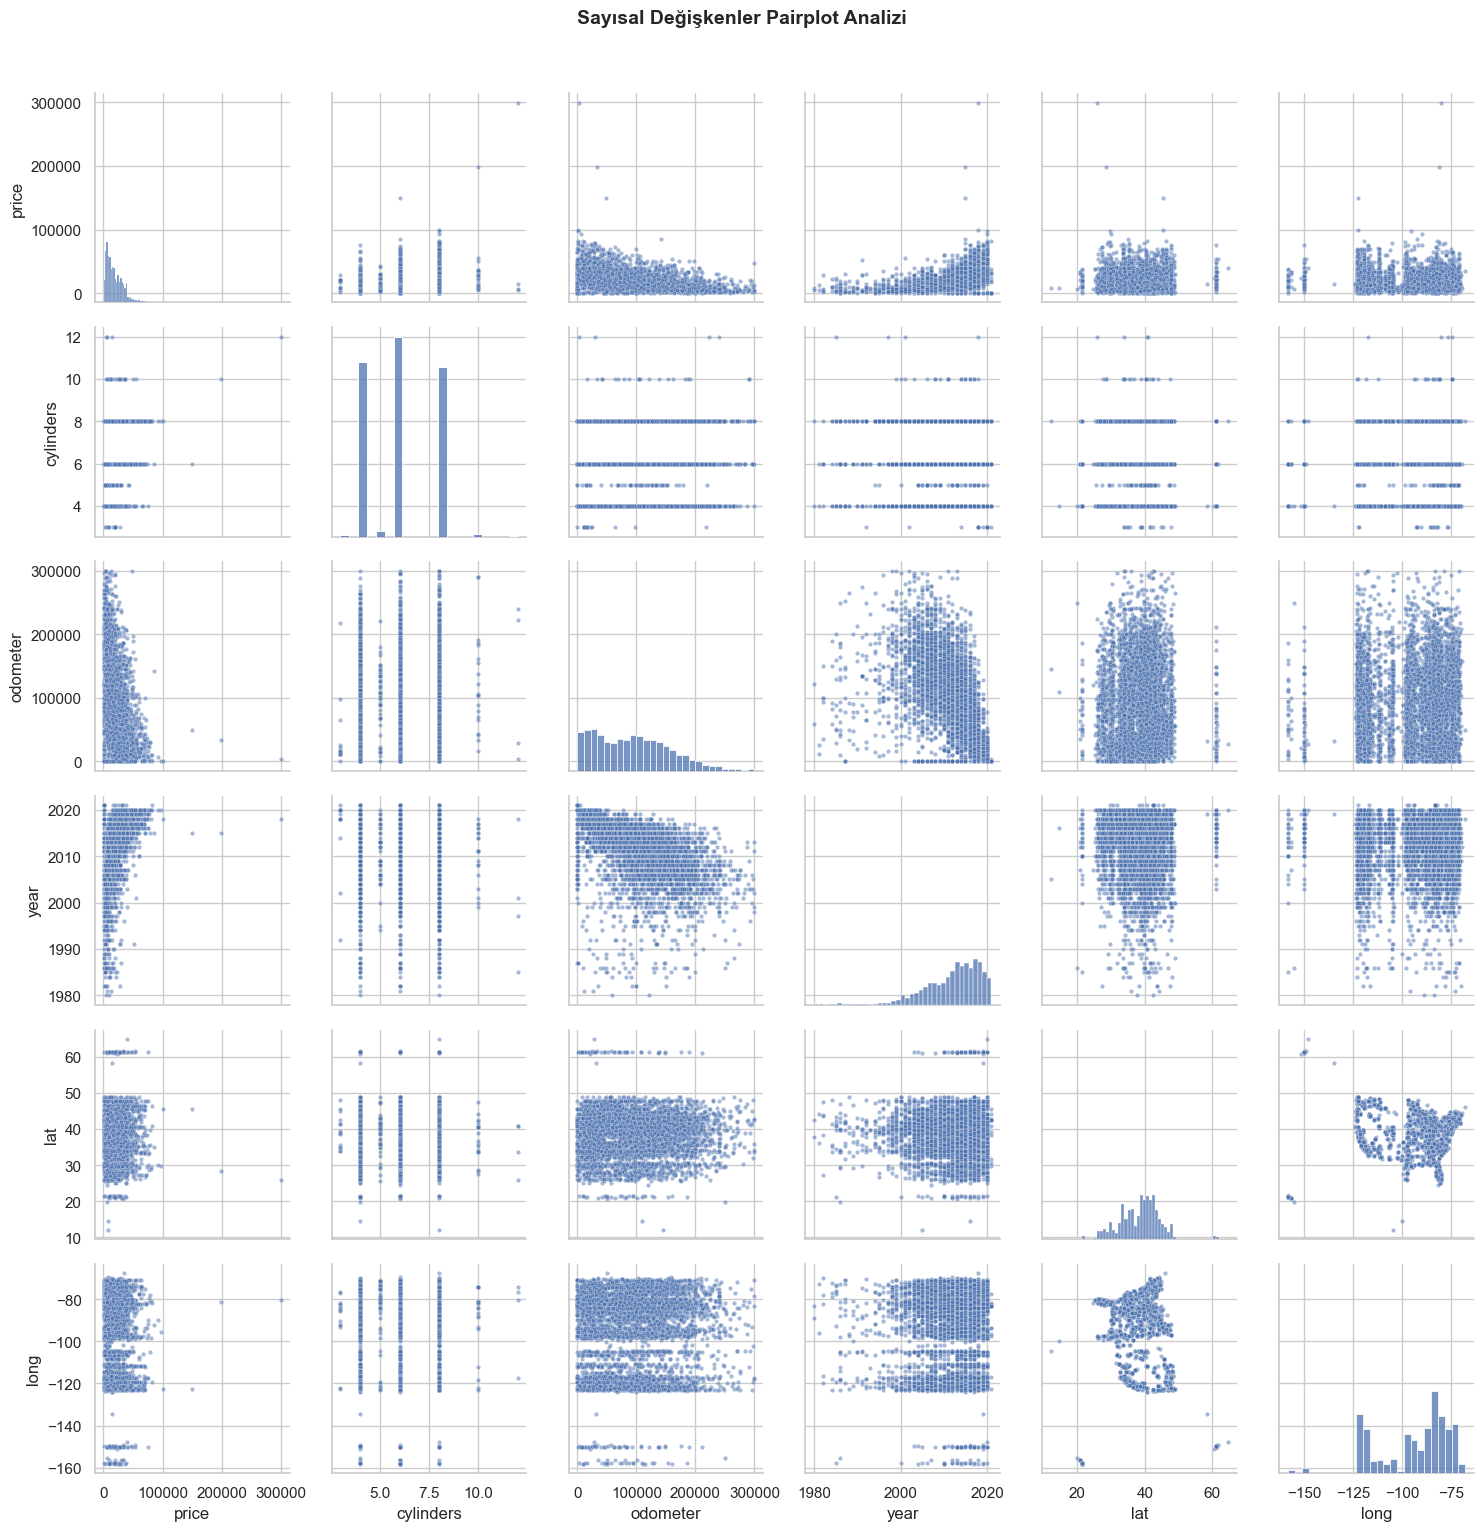


PAIRPLOT ANALİZİ TAMAMLANDI!


In [59]:
#2.30 Pairplot ile tüm sayısal değişkenlerin çiftli dağılımlarını görselleştiriyoruz. Bu sayede
#     değişkenler arası ilişkileri, kümeleri ve aykırı değerleri daha iyi anlayabiliyoruz.

# Sayısal kolonları seç (price dahil)
numeric_cols_pair = ['price', 'cylinders', 'odometer', 'year', 'lat', 'long']
numeric_cols_pair = [col for col in numeric_cols_pair if col in df.columns]

# Örnekleme yap (pairplot çok büyük veri setlerinde yavaş olabilir)
sample_size = min(5000, len(df))
df_pairplot = df[numeric_cols_pair].sample(n=sample_size, random_state=42)

print("="*80)
print("PAIRPLOT GÖRSELLEŞTİRMESİ")
print("="*80)
print(f"\nÖrneklem boyutu: {sample_size:,} (Toplam: {len(df):,})")
print(f"Analiz edilen değişkenler: {numeric_cols_pair}")

# Pairplot oluştur
pairplot_fig = sns.pairplot(df_pairplot, diag_kind='hist', plot_kws={'alpha': 0.5, 's': 10})
pairplot_fig.fig.suptitle('Sayısal Değişkenler Pairplot Analizi', y=1.02, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("PAIRPLOT ANALİZİ TAMAMLANDI!")
print("="*80)


REGION, LAT VE LONG ANALİZİ

1. REGION ANALİZİ
--------------------------------------------------------------------------------
Toplam unique region sayısı: 404

En çok araba bulunan ilk 10 region:
region
columbus                 3243
jacksonville             2992
grand rapids             2868
central NJ               2831
milwaukee                2819
sarasota-bradenton       2795
kansas city, MO          2788
nashville                2779
ft myers / SW florida    2765
tampa bay area           2765
Name: count, dtype: int64


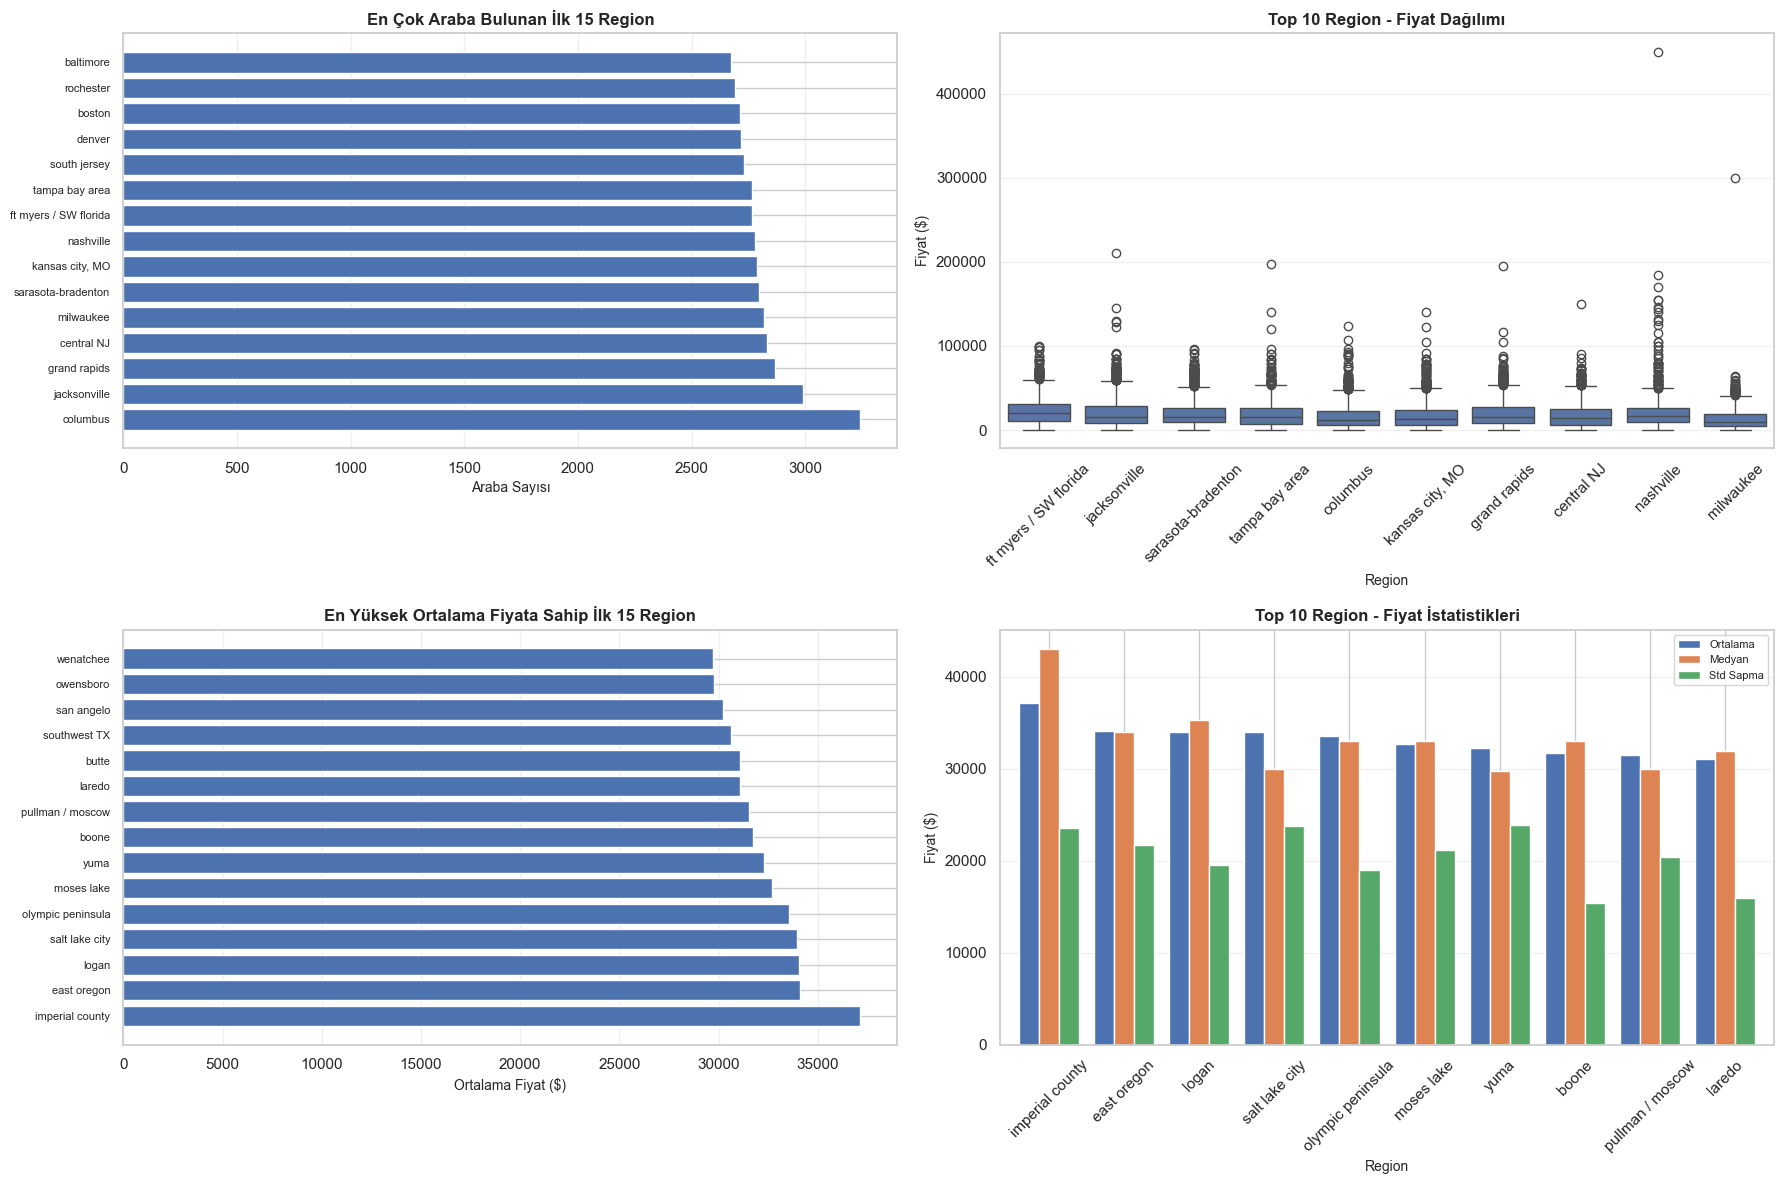


2. LAT VE LONG ANALİZİ
--------------------------------------------------------------------------------
Lat null değer sayısı: 3367 (0.91%)
Long null değer sayısı: 3367 (0.91%)

Lat istatistikleri:
count   367120.000
mean        38.526
std          5.857
min        -81.838
25%         34.720
50%         39.260
75%         42.370
max         82.253
Name: lat, dtype: float64

Long istatistikleri:
count   367120.000
mean       -94.224
std         18.096
min       -159.720
25%       -110.883
50%        -87.948
75%        -80.790
max        173.886
Name: long, dtype: float64


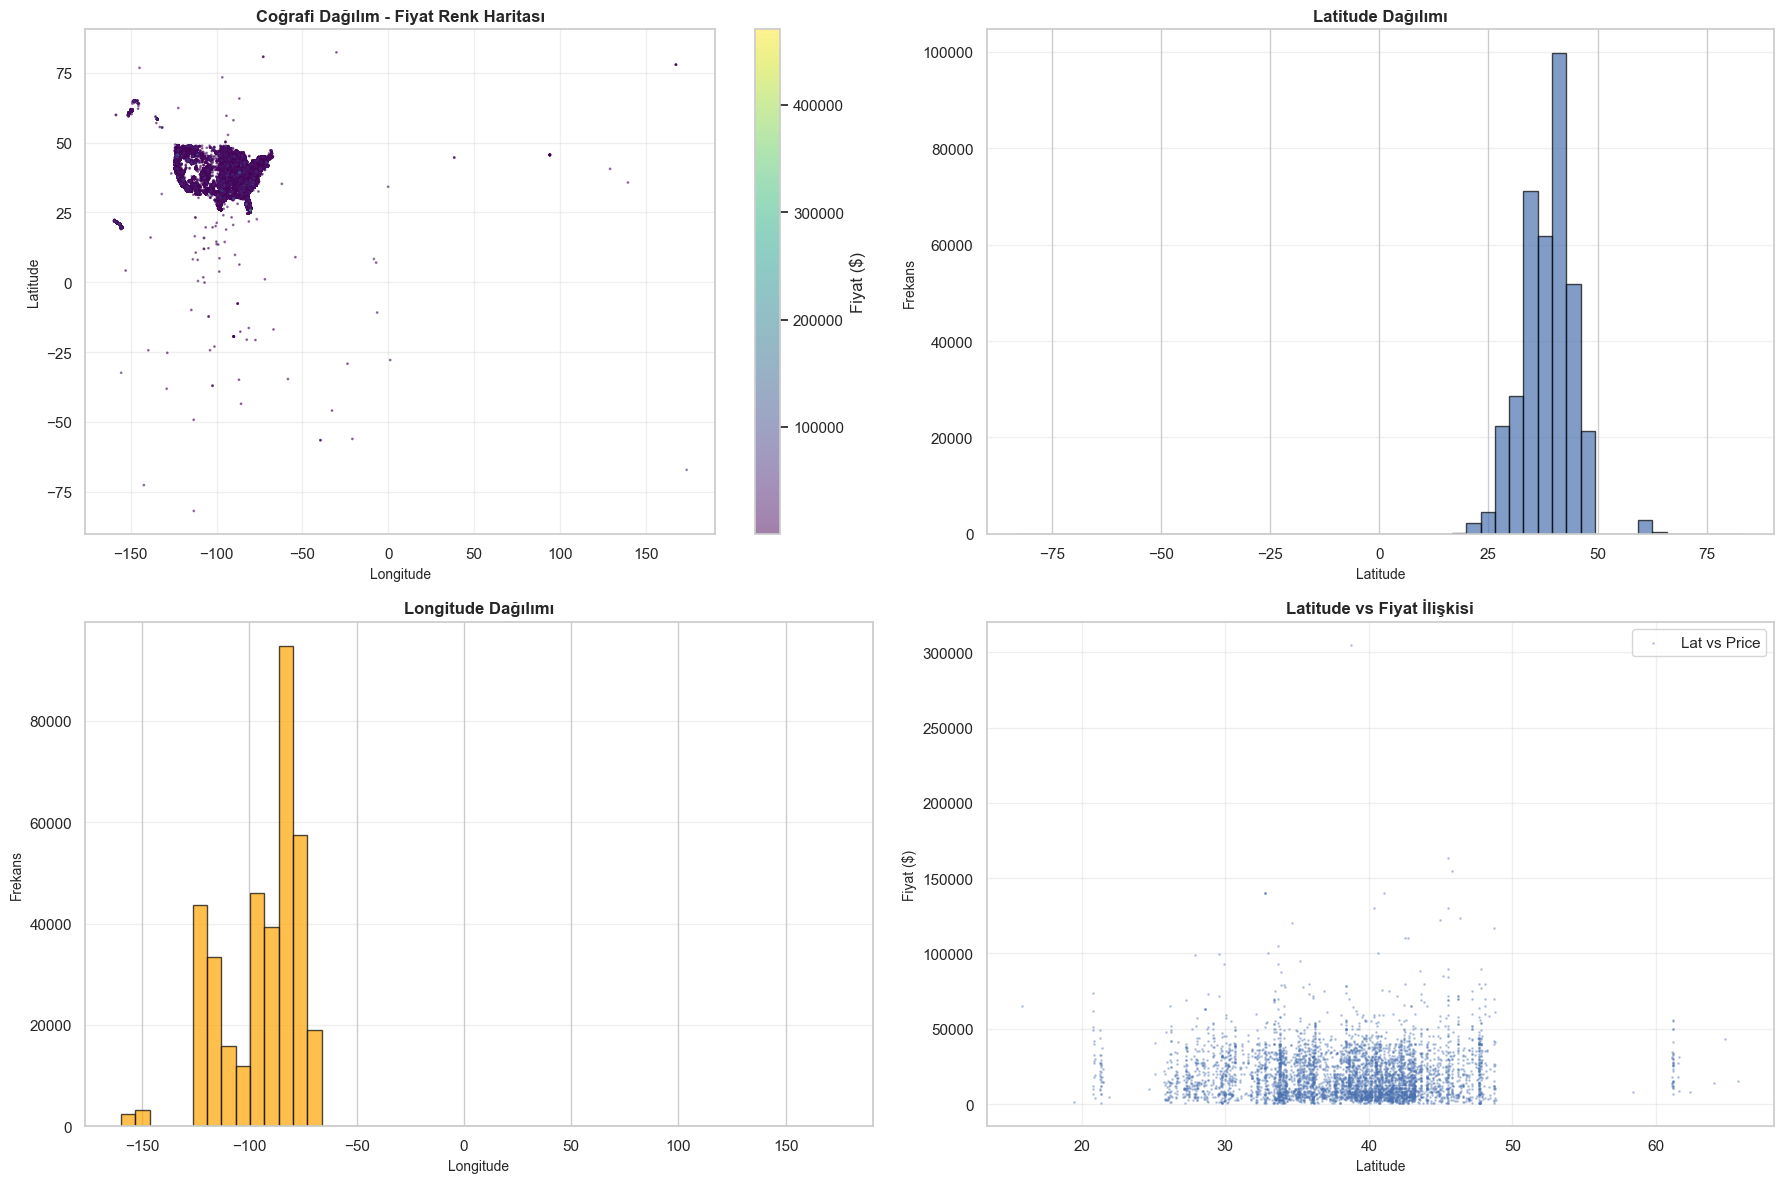


Lat - Price korelasyonu: -0.0073
Long - Price korelasyonu: -0.0895

REGION, LAT VE LONG ANALİZİ TAMAMLANDI!


In [60]:
#2.31 Region, Lat ve Long kolonları için görselleştirmeler ve analizler
#     Bu kolonlar coğrafi bilgiler içerdiği için fiyat tahmininde önemli olabilir

print("="*80)
print("REGION, LAT VE LONG ANALİZİ")
print("="*80)

# 1) Region analizi
if 'region' in df.columns:
    print("\n1. REGION ANALİZİ")
    print("-"*80)
    region_counts = df['region'].value_counts()
    print(f"Toplam unique region sayısı: {df['region'].nunique()}")
    print(f"\nEn çok araba bulunan ilk 10 region:")
    print(region_counts.head(10))
    
    # Region vs Price görselleştirmesi
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1.1) Top 15 region bar chart
    top_regions = region_counts.head(15)
    axes[0, 0].barh(range(len(top_regions)), top_regions.values)
    axes[0, 0].set_yticks(range(len(top_regions)))
    axes[0, 0].set_yticklabels(top_regions.index, fontsize=8)
    axes[0, 0].set_xlabel('Araba Sayısı', fontsize=10)
    axes[0, 0].set_title('En Çok Araba Bulunan İlk 15 Region', fontsize=12, weight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # 1.2) Region vs Price boxplot (top 10 region)
    top_10_regions = region_counts.head(10).index
    df_top_regions = df[df['region'].isin(top_10_regions)]
    sns.boxplot(data=df_top_regions, x='region', y='price', ax=axes[0, 1])
    axes[0, 1].set_title('Top 10 Region - Fiyat Dağılımı', fontsize=12, weight='bold')
    axes[0, 1].set_xlabel('Region', fontsize=10)
    axes[0, 1].set_ylabel('Fiyat ($)', fontsize=10)
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # 1.3) Region ortalama fiyatları
    region_avg_price = df.groupby('region')['price'].mean().sort_values(ascending=False).head(15)
    axes[1, 0].barh(range(len(region_avg_price)), region_avg_price.values)
    axes[1, 0].set_yticks(range(len(region_avg_price)))
    axes[1, 0].set_yticklabels(region_avg_price.index, fontsize=8)
    axes[1, 0].set_xlabel('Ortalama Fiyat ($)', fontsize=10)
    axes[1, 0].set_title('En Yüksek Ortalama Fiyata Sahip İlk 15 Region', fontsize=12, weight='bold')
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    # 1.4) Region fiyat istatistikleri
    region_price_stats = df.groupby('region')['price'].agg(['mean', 'median', 'std']).sort_values('mean', ascending=False).head(10)
    region_price_stats.plot(kind='bar', ax=axes[1, 1], width=0.8)
    axes[1, 1].set_title('Top 10 Region - Fiyat İstatistikleri', fontsize=12, weight='bold')
    axes[1, 1].set_xlabel('Region', fontsize=10)
    axes[1, 1].set_ylabel('Fiyat ($)', fontsize=10)
    axes[1, 1].legend(['Ortalama', 'Medyan', 'Std Sapma'], fontsize=8)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 2) Lat ve Long analizi
if 'lat' in df.columns and 'long' in df.columns:
    print("\n2. LAT VE LONG ANALİZİ")
    print("-"*80)
    
    # Null değer kontrolü
    lat_null = df['lat'].isna().sum()
    long_null = df['long'].isna().sum()
    print(f"Lat null değer sayısı: {lat_null} ({lat_null/len(df)*100:.2f}%)")
    print(f"Long null değer sayısı: {long_null} ({long_null/len(df)*100:.2f}%)")
    
    # Lat ve Long istatistikleri
    print(f"\nLat istatistikleri:")
    print(df['lat'].describe())
    print(f"\nLong istatistikleri:")
    print(df['long'].describe())
    
    # Coğrafi görselleştirme
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 2.1) Lat-Long scatter plot (coğrafi dağılım)
    df_geo = df.dropna(subset=['lat', 'long'])
    if len(df_geo) > 0:
        scatter = axes[0, 0].scatter(df_geo['long'], df_geo['lat'], 
                                     c=df_geo['price'], cmap='viridis', 
                                     alpha=0.5, s=1)
        axes[0, 0].set_xlabel('Longitude', fontsize=10)
        axes[0, 0].set_ylabel('Latitude', fontsize=10)
        axes[0, 0].set_title('Coğrafi Dağılım - Fiyat Renk Haritası', fontsize=12, weight='bold')
        plt.colorbar(scatter, ax=axes[0, 0], label='Fiyat ($)')
        axes[0, 0].grid(alpha=0.3)
    
    # 2.2) Lat dağılımı
    axes[0, 1].hist(df['lat'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Latitude', fontsize=10)
    axes[0, 1].set_ylabel('Frekans', fontsize=10)
    axes[0, 1].set_title('Latitude Dağılımı', fontsize=12, weight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # 2.3) Long dağılımı
    axes[1, 0].hist(df['long'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1, 0].set_xlabel('Longitude', fontsize=10)
    axes[1, 0].set_ylabel('Frekans', fontsize=10)
    axes[1, 0].set_title('Longitude Dağılımı', fontsize=12, weight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # 2.4) Lat/Long vs Price scatter
    df_geo_price = df.dropna(subset=['lat', 'long', 'price'])
    if len(df_geo_price) > 5000:
        df_geo_price = df_geo_price.sample(n=5000, random_state=42)
    
    if len(df_geo_price) > 0:
        axes[1, 1].scatter(df_geo_price['lat'], df_geo_price['price'], 
                          alpha=0.3, s=1, label='Lat vs Price')
        axes[1, 1].set_xlabel('Latitude', fontsize=10)
        axes[1, 1].set_ylabel('Fiyat ($)', fontsize=10)
        axes[1, 1].set_title('Latitude vs Fiyat İlişkisi', fontsize=12, weight='bold')
        axes[1, 1].grid(alpha=0.3)
        axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Lat ve Long'un price ile korelasyonu
    if 'price' in df.columns:
        lat_corr = df[['lat', 'price']].corr().iloc[0, 1]
        long_corr = df[['long', 'price']].corr().iloc[0, 1]
        print(f"\nLat - Price korelasyonu: {lat_corr:.4f}")
        print(f"Long - Price korelasyonu: {long_corr:.4f}")

print("\n" + "="*80)
print("REGION, LAT VE LONG ANALİZİ TAMAMLANDI!")
print("="*80)


KATEGORIK DEGISKENLER vs PRICE (BOXPLOT)
Analiz edilecek degiskenler: ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type']


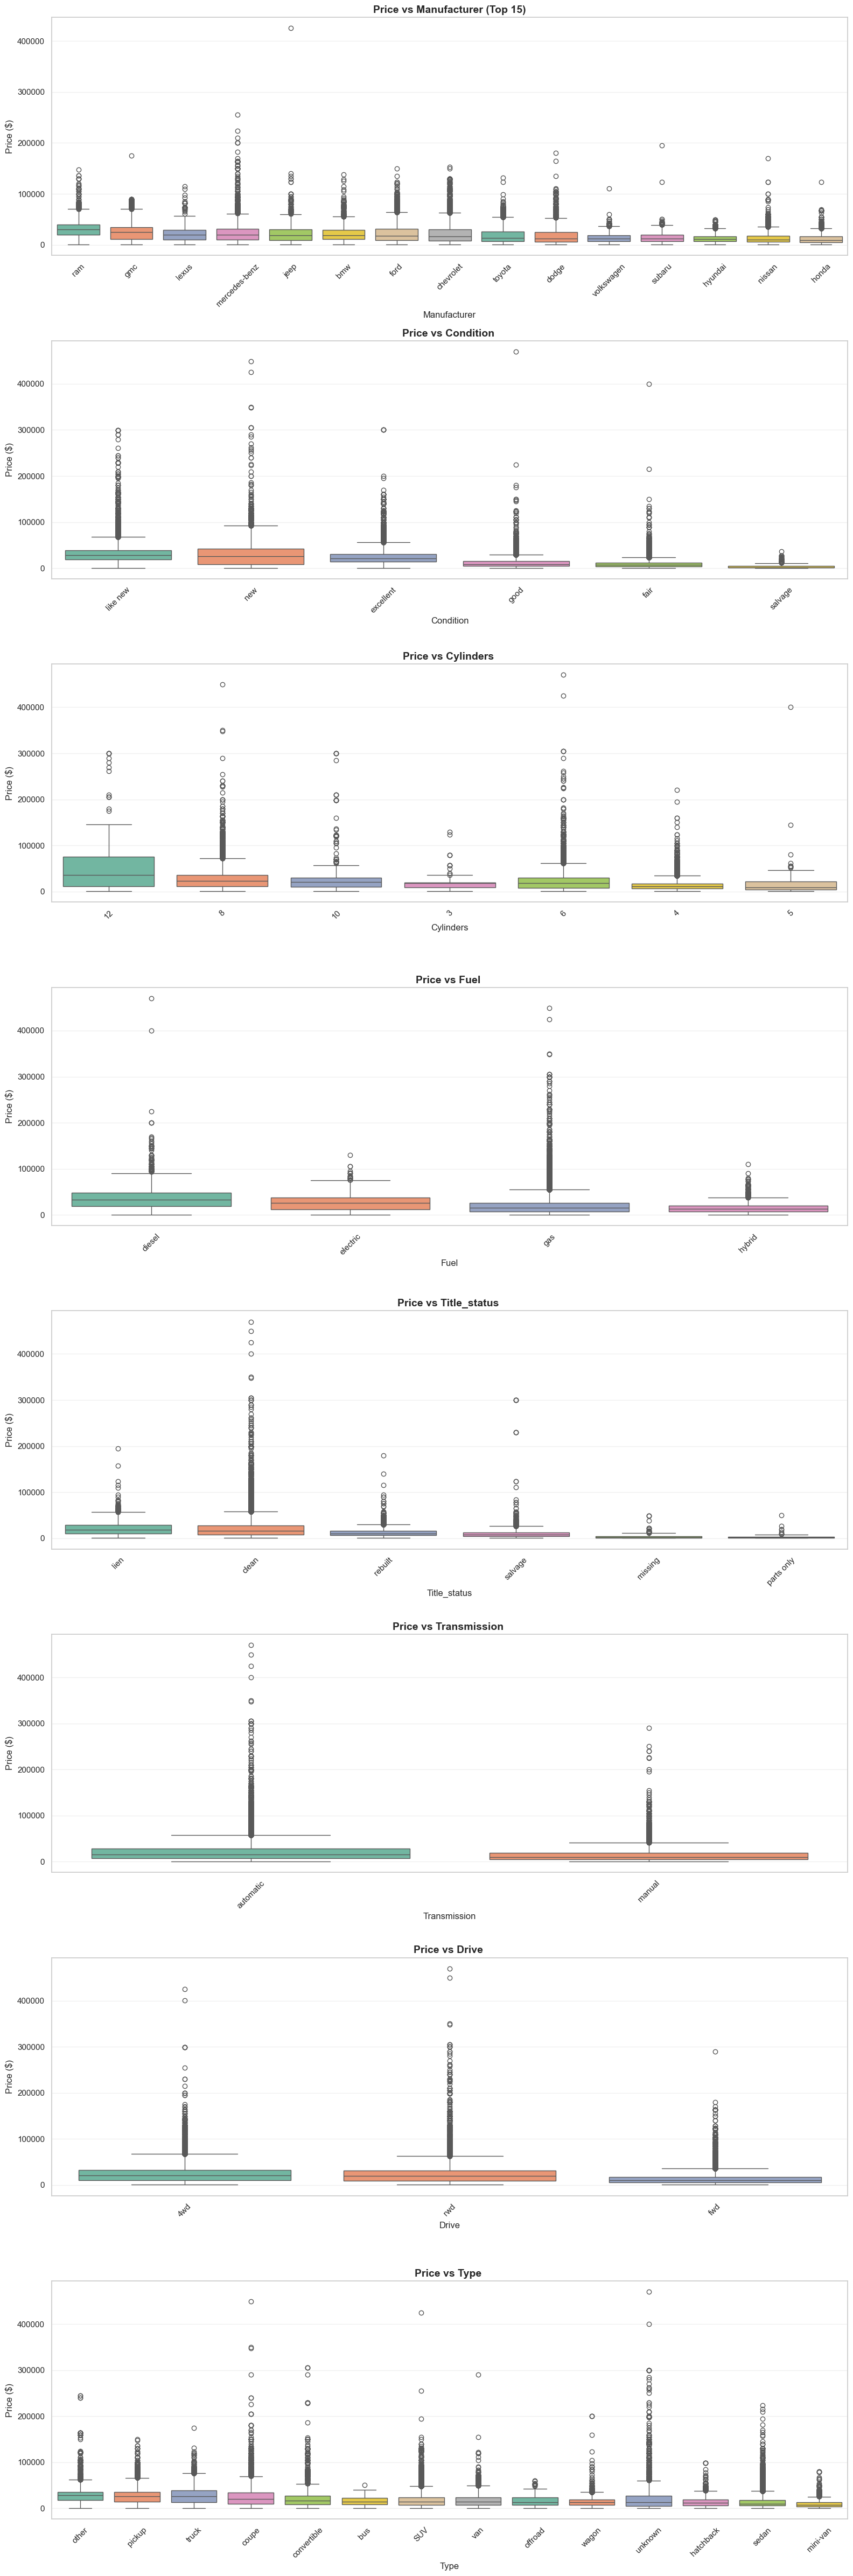


FIYAT ISTATISTIKLERI OZET

MANUFACTURER:
----------------------------------------------------------------------
 1. ferrari              | Med: $119,500 | Avg: $142,362 | n=60
 2. aston-martin         | Med: $ 52,000 | Avg: $ 61,137 | n=21
 3. tesla                | Med: $ 37,990 | Avg: $ 38,721 | n=738
 4. ram                  | Med: $ 30,000 | Avg: $ 30,563 | n=15,917
 5. porsche              | Med: $ 29,997 | Avg: $ 34,295 | n=1,236
 6. jaguar               | Med: $ 28,990 | Avg: $ 27,338 | n=1,849
 7. alfa-romeo           | Med: $ 28,163 | Avg: $ 28,482 | n=361
 8. rover                | Med: $ 26,143 | Avg: $ 29,537 | n=1,908
 9. audi                 | Med: $ 24,990 | Avg: $ 25,463 | n=6,983
10. gmc                  | Med: $ 24,590 | Avg: $ 25,570 | n=14,850

CONDITION:
----------------------------------------------------------------------
 1. like new             | Med: $ 28,000 | Avg: $ 30,247 | n=52,359
 2. new                  | Med: $ 25,451 | Avg: $ 30,367 | n=9,422
 3. exc

In [61]:
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type']

categorical_cols = [col for col in categorical_cols if col in df.columns]

print("="*70)
print("KATEGORIK DEGISKENLER vs PRICE (BOXPLOT)")
print("="*70)
print(f"Analiz edilecek degiskenler: {categorical_cols}")

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 6*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    
    unique_count = df[col].nunique()
    
    if unique_count > 15:
        top_categories = df[col].value_counts().head(15).index
        df_filtered = df[df[col].isin(top_categories)]
        title_suffix = "(Top 15)"
    else:
        df_filtered = df
        title_suffix = ""
    
    order = df_filtered.groupby(col)['price'].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df_filtered, x=col, y='price', order=order, 
                palette='Set2', ax=axes[idx])
    
    axes[idx].set_title(f'Price vs {col.capitalize()} {title_suffix}', 
                        fontsize=14, weight='bold')
    axes[idx].set_xlabel(col.capitalize(), fontsize=12)
    axes[idx].set_ylabel('Price ($)', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FIYAT ISTATISTIKLERI OZET")
print("="*70)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 70)
    
    stats = df.groupby(col)['price'].agg(['median', 'mean', 'count']).sort_values('median', ascending=False)
    
    for idx, (category, row) in enumerate(stats.head(10).iterrows(), 1):
        print(f"{idx:2}. {str(category):20} | Med: ${row['median']:7,.0f} | "
              f"Avg: ${row['mean']:7,.0f} | n={int(row['count']):,}")

print("="*70)

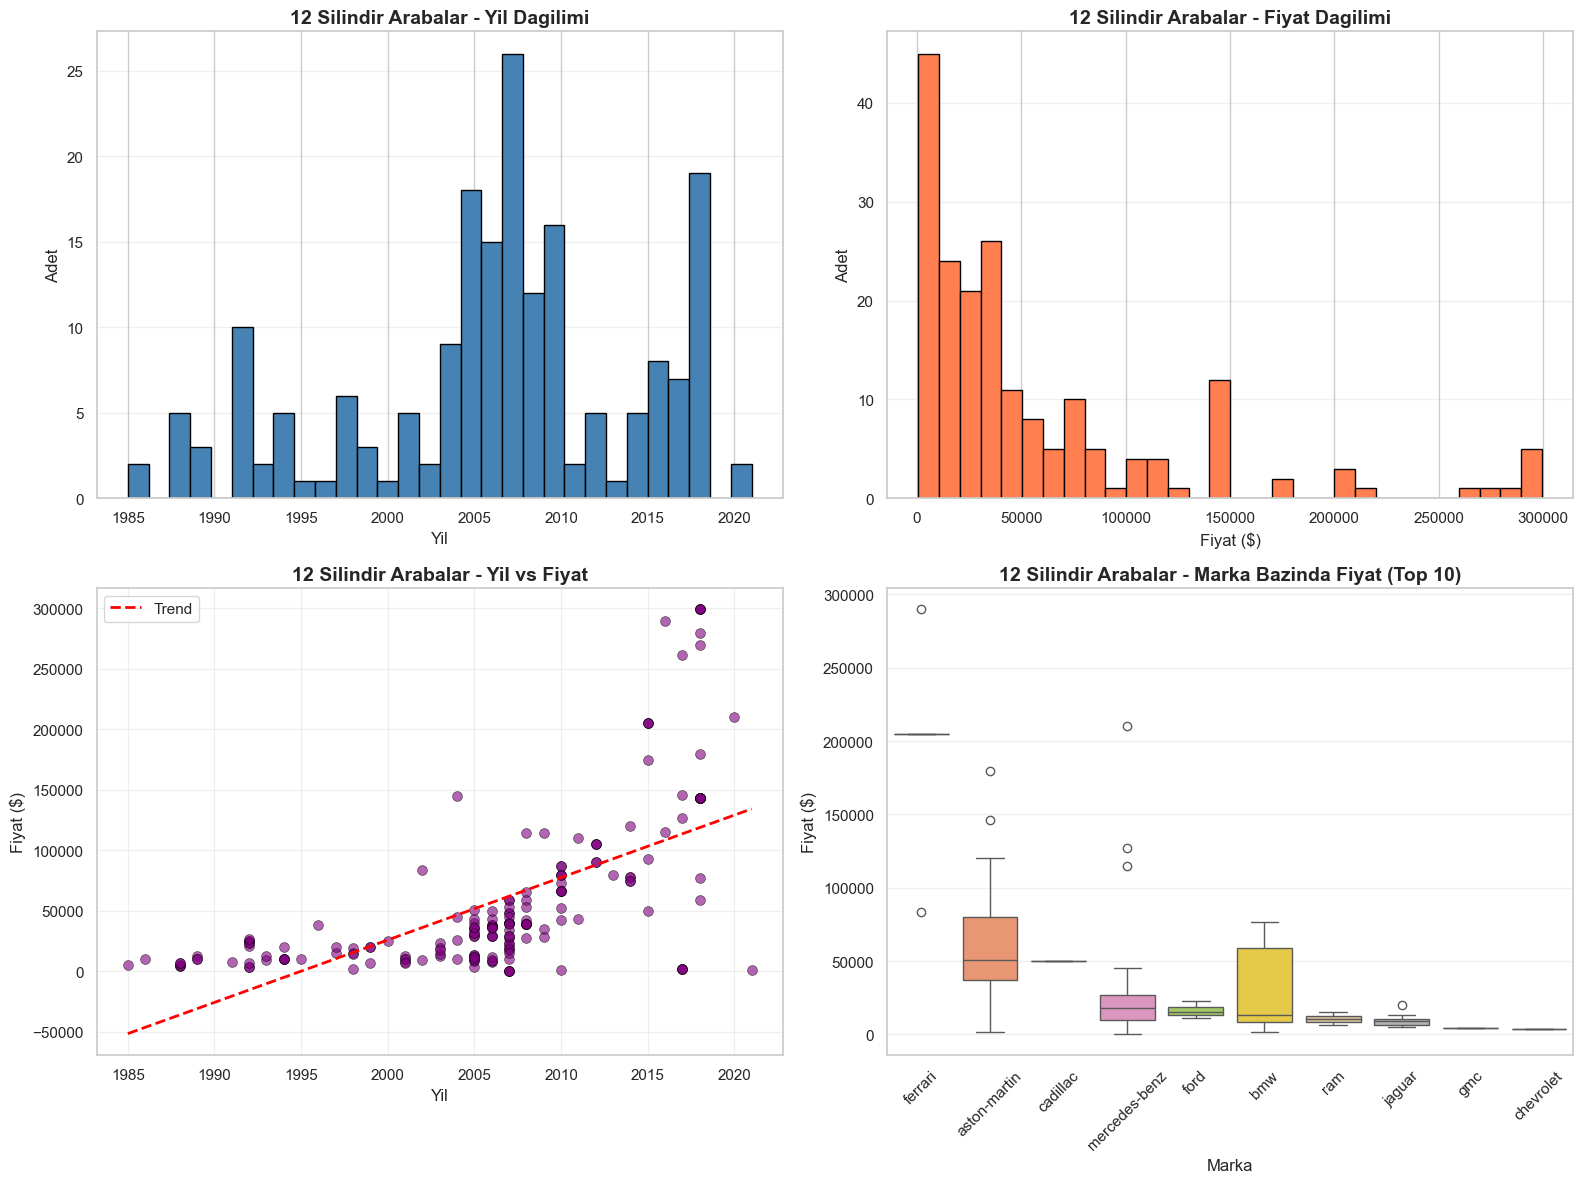

12 SİLİNDİR ARABALAR - OZET İSTATİSTİKLER

Toplam araba: 191
Ortalama fiyat: $57,514
Median fiyat: $35,900
Min fiyat: $568
Max fiyat: $299,500

Ortalama yil: 2006
En eski: 1985
En yeni: 2021


In [62]:
# ============================================================================
# 12 SİLİNDİR ARABALAR - GRAFİKLER
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# 12 silindir arabaları filtrele
cyl_12 = df[df['cylinders'] == 12]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ============================================================================
# 1. YIL DAĞILIMI (Histogram)
# ============================================================================
axes[0, 0].hist(cyl_12['year'], bins=30, color='steelblue', edgecolor='black')
axes[0, 0].set_title('12 Silindir Arabalar - Yil Dagilimi', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Yil', fontsize=12)
axes[0, 0].set_ylabel('Adet', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# ============================================================================
# 2. FİYAT DAĞILIMI (Histogram)
# ============================================================================
axes[0, 1].hist(cyl_12['price'], bins=30, color='coral', edgecolor='black')
axes[0, 1].set_title('12 Silindir Arabalar - Fiyat Dagilimi', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Fiyat ($)', fontsize=12)
axes[0, 1].set_ylabel('Adet', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# ============================================================================
# 3. YIL vs FİYAT (Scatter Plot)
# ============================================================================
axes[1, 0].scatter(cyl_12['year'], cyl_12['price'], alpha=0.6, s=50, 
                   color='purple', edgecolors='black', linewidth=0.5)
axes[1, 0].set_title('12 Silindir Arabalar - Yil vs Fiyat', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Yil', fontsize=12)
axes[1, 0].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 0].grid(alpha=0.3)

# Trend line ekle
z = np.polyfit(cyl_12['year'], cyl_12['price'], 1)
p = np.poly1d(z)
axes[1, 0].plot(sorted(cyl_12['year'].unique()), 
                p(sorted(cyl_12['year'].unique())), 
                color='red', linewidth=2, linestyle='--', label='Trend')
axes[1, 0].legend()

# ============================================================================
# 4. MARKA BAZINDA FİYAT (Box Plot)
# ============================================================================
# En fazla 12 silindir araç olan markaları al
top_brands = cyl_12['manufacturer'].value_counts().head(10).index
cyl_12_top = cyl_12[cyl_12['manufacturer'].isin(top_brands)]

order = cyl_12_top.groupby('manufacturer')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=cyl_12_top, x='manufacturer', y='price', order=order, 
            palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('12 Silindir Arabalar - Marka Bazinda Fiyat (Top 10)', 
                     fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Marka', fontsize=12)
axes[1, 1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER
# ============================================================================
print("="*80)
print("12 SİLİNDİR ARABALAR - OZET İSTATİSTİKLER")
print("="*80)
print(f"\nToplam araba: {len(cyl_12):,}")
print(f"Ortalama fiyat: ${cyl_12['price'].mean():,.0f}")
print(f"Median fiyat: ${cyl_12['price'].median():,.0f}")
print(f"Min fiyat: ${cyl_12['price'].min():,.0f}")
print(f"Max fiyat: ${cyl_12['price'].max():,.0f}")
print(f"\nOrtalama yil: {cyl_12['year'].mean():.0f}")
print(f"En eski: {cyl_12['year'].min():.0f}")
print(f"En yeni: {cyl_12['year'].max():.0f}")
print("="*80)

# 3-)Train Test Split
Artık eda bitti verileri data leakage olmaması adına train test split olarak ayıracak sonrasında işlemlere devam edeceğğiz.

In [63]:
# 3. MODEL PIPELINE - TRAIN TEST SPLIT

print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Model ve model_clean kolonlari artik gerekli degil (model_normalized var)
columns_to_drop = ['model', 'model_clean']
df_modeling = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\nModeling oncesi kolon sayisi: {df.shape[1]}")
print(f"Modeling sonrasi kolon sayisi: {df_modeling.shape[1]}")
print(f"Silinen kolonlar: {columns_to_drop}")


# 3.2 Veriyi X ve y'ye ayırıyoruz 
X = df_modeling.drop('price', axis=1)
y = df_modeling['price']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# 3.3 Train-Test Split (80-20)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

print(f"\nTrain set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:  {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# 3.4 Null degerleri kontrol ediyoruz.

print("\n" + "-"*80)
print("TRAIN SET NULL DEGERLERI:")
print("-"*80)
train_nulls = X_train.isnull().sum()
print(train_nulls[train_nulls > 0])

print("\n" + "-"*80)
print("TEST SET NULL DEGERLERI:")
print("-"*80)
test_nulls = X_test.isnull().sum()
print(test_nulls[test_nulls > 0])

print("\n" + "="*80)
print("TRAIN-TEST SPLIT TAMAMLANDI!")
print("="*80)
print("\nBir sonraki adim: Imputation (null doldurma)")
print("="*80)


TRAIN-TEST SPLIT

Modeling oncesi kolon sayisi: 17
Modeling sonrasi kolon sayisi: 15
Silinen kolonlar: ['model', 'model_clean']

X shape: (370487, 14)
y shape: (370487,)

Train set: 296,389 samples (80.0%)
Test set:  74,098 samples (20.0%)

--------------------------------------------------------------------------------
TRAIN SET NULL DEGERLERI:
--------------------------------------------------------------------------------
manufacturer        9633
lat                 2735
long                2735
model_normalized    2893
dtype: int64

--------------------------------------------------------------------------------
TEST SET NULL DEGERLERI:
--------------------------------------------------------------------------------
manufacturer        2454
lat                  632
long                 632
model_normalized     722
dtype: int64

TRAIN-TEST SPLIT TAMAMLANDI!

Bir sonraki adim: Imputation (null doldurma)


In [64]:
# 3.5 IMPUTATION - NULL DOLDURMA

print("\n" + "="*80)
print("IMPUTATION (NULL DOLDURMA)")
print("="*80)

X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

# 3.5.1 MANUFACTURER - 'unknown' ile dolduruyoruz


print("\n1) MANUFACTURER null doldurma...")
print(f"   Train null (önce): {X_train_imputed['manufacturer'].isnull().sum()}")
print(f"   Test null (önce):  {X_test_imputed['manufacturer'].isnull().sum()}")

X_train_imputed['manufacturer'].fillna('unknown', inplace=True)
X_test_imputed['manufacturer'].fillna('unknown', inplace=True)

print(f"   Train null (sonra): {X_train_imputed['manufacturer'].isnull().sum()}")
print(f"   Test null (sonra):  {X_test_imputed['manufacturer'].isnull().sum()}")

# 3.5.2 LAT ve LONG - Train median ile dolduruyoruz

print("\n2) LAT null doldurma...")
print(f"   Train null (önce): {X_train_imputed['lat'].isnull().sum()}")
print(f"   Test null (önce):  {X_test_imputed['lat'].isnull().sum()}")

train_lat_median = X_train_imputed['lat'].median()
X_train_imputed['lat'].fillna(train_lat_median, inplace=True)
X_test_imputed['lat'].fillna(train_lat_median, inplace=True)

print(f"   Train median kullanildi: {train_lat_median:.4f}")
print(f"   Train null (sonra): {X_train_imputed['lat'].isnull().sum()}")
print(f"   Test null (sonra):  {X_test_imputed['lat'].isnull().sum()}")

print("\n3) LONG null doldurma...")
print(f"   Train null (önce): {X_train_imputed['long'].isnull().sum()}")
print(f"   Test null (önce):  {X_test_imputed['long'].isnull().sum()}")

train_long_median = X_train_imputed['long'].median()
X_train_imputed['long'].fillna(train_long_median, inplace=True)
X_test_imputed['long'].fillna(train_long_median, inplace=True)

print(f"   Train median kullanildi: {train_long_median:.4f}")
print(f"   Train null (sonra): {X_train_imputed['long'].isnull().sum()}")
print(f"   Test null (sonra):  {X_test_imputed['long'].isnull().sum()}")


# 3.5.3 MODEL_NORMALIZED - 'other' ile dolduruyrouz

print("\n4) MODEL_NORMALIZED null doldurma...")
print(f"   Train null (önce): {X_train_imputed['model_normalized'].isnull().sum()}")
print(f"   Test null (önce):  {X_test_imputed['model_normalized'].isnull().sum()}")

X_train_imputed['model_normalized'].fillna('other', inplace=True)
X_test_imputed['model_normalized'].fillna('other', inplace=True)

print(f"   Train null (sonra): {X_train_imputed['model_normalized'].isnull().sum()}")
print(f"   Test null (sonra):  {X_test_imputed['model_normalized'].isnull().sum()}")

# 3.5.4 FINAL NULL KONTROLÜ

print("\n" + "="*80)
print("FINAL NULL KONTROLÜ")
print("="*80)

train_nulls_final = X_train_imputed.isnull().sum()
test_nulls_final = X_test_imputed.isnull().sum()

print("\nTRAIN SET:")
if train_nulls_final.sum() == 0:
    print("   HICBIR KOLONDA NULL YOK!")
else:
    print(train_nulls_final[train_nulls_final > 0])

print("\nTEST SET:")
if test_nulls_final.sum() == 0:
    print("   HICBIR KOLONDA NULL YOK!")
else:
    print(test_nulls_final[test_nulls_final > 0])

# 3.5.5 ORIJINAL DEĞIŞKENLERI GÜNCELLE

X_train = X_train_imputed.copy()
X_test = X_test_imputed.copy()

print("\n" + "="*80)
print("IMPUTATION TAMAMLANDI!")
print("="*80)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("\nBir sonraki adim: Feature Engineering")
print("="*80)


IMPUTATION (NULL DOLDURMA)

1) MANUFACTURER null doldurma...
   Train null (önce): 9633
   Test null (önce):  2454
   Train null (sonra): 0
   Test null (sonra):  0

2) LAT null doldurma...
   Train null (önce): 2735
   Test null (önce):  632
   Train median kullanildi: 39.2600
   Train null (sonra): 0
   Test null (sonra):  0

3) LONG null doldurma...
   Train null (önce): 2735
   Test null (önce):  632
   Train median kullanildi: -87.9600
   Train null (sonra): 0
   Test null (sonra):  0

4) MODEL_NORMALIZED null doldurma...
   Train null (önce): 2893
   Test null (önce):  722
   Train null (sonra): 0
   Test null (sonra):  0

FINAL NULL KONTROLÜ

TRAIN SET:
   HICBIR KOLONDA NULL YOK!

TEST SET:
   HICBIR KOLONDA NULL YOK!

IMPUTATION TAMAMLANDI!
X_train shape: (296389, 14)
X_test shape: (74098, 14)

Bir sonraki adim: Feature Engineering


# 4-) Feature Engineering ve Dimensionality Reduction

In [65]:
# 4.1 FEATURE ENGINEERING - YENİ ÖZELLİKLER OLUŞTURMA

print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)


X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# 4.1 CAR_AGE (Arabanın yaşı)

print("\n1) CAR_AGE olusturuluyor...")
X_train_fe['car_age'] = 2024 - X_train_fe['year']
X_test_fe['car_age'] = 2024 - X_test_fe['year']

print(f"   Train - Min: {X_train_fe['car_age'].min()}, Max: {X_train_fe['car_age'].max()}, Mean: {X_train_fe['car_age'].mean():.1f}")
print(f"   Test - Min: {X_test_fe['car_age'].min()}, Max: {X_test_fe['car_age'].max()}, Mean: {X_test_fe['car_age'].mean():.1f}")

# 4.2 PRICE_PER_MILE (Mil başına fiyat - y_train/y_test gerekli)

print("\n2) PRICE_PER_MILE olusturuluyor...")

# NOT: Bu feature'i şimdilik atlıyoruz çünkü y (price) pipeline dışında
# Pipeline içinde custom transformer ile eklenecek
print("   ATLANDI - Pipeline içinde eklenecek (y değerine ihtiyaç var)")

# 4.3 LUXURY_BRAND (Lüks marka flag)

print("\n3) LUXURY_BRAND olusturuluyor...")

luxury_brands = ['ferrari', 'lamborghini', 'bentley', 'rolls-royce', 'aston-martin', 
                 'maserati', 'mclaren', 'porsche', 'bugatti', 'lotus']

X_train_fe['luxury_brand'] = X_train_fe['manufacturer'].isin(luxury_brands).astype(int)
X_test_fe['luxury_brand'] = X_test_fe['manufacturer'].isin(luxury_brands).astype(int)

print(f"   Train - Luxury cars: {X_train_fe['luxury_brand'].sum():,} ({X_train_fe['luxury_brand'].sum()/len(X_train_fe)*100:.2f}%)")
print(f"   Test - Luxury cars: {X_test_fe['luxury_brand'].sum():,} ({X_test_fe['luxury_brand'].sum()/len(X_test_fe)*100:.2f}%)")

# 4.4 ELECTRIC_VEHICLE (Elektrikli araç flag)

print("\n4) ELECTRIC_VEHICLE olusturuluyor...")

X_train_fe['electric_vehicle'] = (X_train_fe['fuel'] == 'electric').astype(int)
X_test_fe['electric_vehicle'] = (X_test_fe['fuel'] == 'electric').astype(int)

print(f"   Train - Electric: {X_train_fe['electric_vehicle'].sum():,} ({X_train_fe['electric_vehicle'].sum()/len(X_train_fe)*100:.2f}%)")
print(f"   Test - Electric: {X_test_fe['electric_vehicle'].sum():,} ({X_test_fe['electric_vehicle'].sum()/len(X_test_fe)*100:.2f}%)")

# 4.5 HIGH_MILEAGE (Yüksek kilometre flag)

print("\n5) HIGH_MILEAGE olusturuluyor...")

X_train_fe['high_mileage'] = (X_train_fe['odometer'] > 150000).astype(int)
X_test_fe['high_mileage'] = (X_test_fe['odometer'] > 150000).astype(int)

print(f"   Train - High mileage: {X_train_fe['high_mileage'].sum():,} ({X_train_fe['high_mileage'].sum()/len(X_train_fe)*100:.2f}%)")
print(f"   Test - High mileage: {X_test_fe['high_mileage'].sum():,} ({X_test_fe['high_mileage'].sum()/len(X_test_fe)*100:.2f}%)")

# 4.6 NEARLY_NEW (Neredeyse sıfır araç flag)

print("\n6) NEARLY_NEW olusturuluyor...")

X_train_fe['nearly_new'] = ((X_train_fe['year'] >= 2022) & (X_train_fe['odometer'] < 10000)).astype(int)
X_test_fe['nearly_new'] = ((X_test_fe['year'] >= 2022) & (X_test_fe['odometer'] < 10000)).astype(int)

print(f"   Train - Nearly new: {X_train_fe['nearly_new'].sum():,} ({X_train_fe['nearly_new'].sum()/len(X_train_fe)*100:.2f}%)")
print(f"   Test - Nearly new: {X_test_fe['nearly_new'].sum():,} ({X_test_fe['nearly_new'].sum()/len(X_test_fe)*100:.2f}%)")

# 4.7 ORIJINAL DEĞİŞKENLERI GÜNCELLE

X_train = X_train_fe.copy()
X_test = X_test_fe.copy()

print("\n" + "="*80)
print("FEATURE ENGINEERING TAMAMLANDI!")
print("="*80)
print(f"X_train shape: {X_train.shape} (önce: {X_train_fe.shape[1]-5} kolon, sonra: {X_train.shape[1]} kolon)")
print(f"X_test shape: {X_test.shape}")
print(f"\nEklenen feature'lar: car_age, luxury_brand, electric_vehicle, high_mileage, nearly_new")
print("\nBir sonraki adim: Feature Gruplama")
print("="*80)


FEATURE ENGINEERING

1) CAR_AGE olusturuluyor...
   Train - Min: 2.0, Max: 44.0, Mean: 12.0
   Test - Min: 2.0, Max: 44.0, Mean: 12.0

2) PRICE_PER_MILE olusturuluyor...
   ATLANDI - Pipeline içinde eklenecek (y değerine ihtiyaç var)

3) LUXURY_BRAND olusturuluyor...
   Train - Luxury cars: 1,070 (0.36%)
   Test - Luxury cars: 247 (0.33%)

4) ELECTRIC_VEHICLE olusturuluyor...
   Train - Electric: 1,246 (0.42%)
   Test - Electric: 323 (0.44%)

5) HIGH_MILEAGE olusturuluyor...
   Train - High mileage: 55,743 (18.81%)
   Test - High mileage: 13,795 (18.62%)

6) NEARLY_NEW olusturuluyor...
   Train - Nearly new: 24 (0.01%)
   Test - Nearly new: 8 (0.01%)

FEATURE ENGINEERING TAMAMLANDI!
X_train shape: (296389, 19) (önce: 14 kolon, sonra: 19 kolon)
X_test shape: (74098, 19)

Eklenen feature'lar: car_age, luxury_brand, electric_vehicle, high_mileage, nearly_new

Bir sonraki adim: Feature Gruplama


In [66]:
# 4.8 FEATURE GRUPLAMA (Pipeline için hazırlık)

print("\n" + "="*80)
print("FEATURE GRUPLAMA")
print("="*80)

# 4.9 REGION DROP (lat/long var, gereksiz)

print("\n1) REGION kolonu drop ediliyor...")
print(f"   Region unique count: {X_train['region'].nunique()}")
print(f"   Sebep: Lat/Long var, region gereksiz (yüksek kardinalite)")

X_train = X_train.drop('region', axis=1)
X_test = X_test.drop('region', axis=1)

print(f"   X_train shape: {X_train.shape}")
print(f"   X_test shape: {X_test.shape}")

# 4.10 NUMERIC FEATURES


numeric_features = ['year', 'cylinders', 'odometer', 'lat', 'long', 'car_age']

print("\n2) NUMERIC FEATURES:")
for feat in numeric_features:
    print(f"   - {feat}")

# 4.11 ORDINAL FEATURES (Sıralı kategorik)

ordinal_features = ['condition']
ordinal_categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]

print("\n3) ORDINAL FEATURES:")
print(f"   - condition: {ordinal_categories[0]}")

# 4.12 NOMINAL FEATURES (Sırasız kategorik - OneHot)

nominal_features = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'title_status']

print("\n4) NOMINAL FEATURES (OneHot):")
for feat in nominal_features:
    print(f"   - {feat} (unique: {X_train[feat].nunique()})")

# 4.13 HIGH CARDINALITY FEATURES (Target Encoding)

high_cardinality_features = ['model_normalized']

print("\n5) HIGH CARDINALITY FEATURES (Target Encoding):")
for feat in high_cardinality_features:
    print(f"   - {feat} (unique: {X_train[feat].nunique()})")

# 4.14 BINARY FEATURES (Zaten 0/1, işlem gerektirmez)

binary_features = ['luxury_brand', 'electric_vehicle', 'high_mileage', 'nearly_new']

print("\n6) BINARY FEATURES (işlem yok):")
for feat in binary_features:
    print(f"   - {feat}")

# 4.15 KONTROL - TÜM KOLONLAR KAPSILANDI MI?

all_features = (numeric_features + ordinal_features + nominal_features + 
                high_cardinality_features + binary_features)

missing_features = set(X_train.columns) - set(all_features)
extra_features = set(all_features) - set(X_train.columns)

print("\n" + "="*80)
print("KONTROL")
print("="*80)
print(f"X_train toplam kolon: {X_train.shape[1]}")
print(f"Gruplanan feature sayisi: {len(all_features)}")

if missing_features:
    print(f"\nUYARI - Gruplanmamis kolonlar: {missing_features}")
else:
    print(f"\nTUM KOLONLAR GRUPLANMIS!")

if extra_features:
    print(f"\nUYARI - Var olmayan kolonlar: {extra_features}")

print("\n" + "="*80)
print("FEATURE GRUPLAMA TAMAMLANDI!")
print("="*80)
print(f"Numeric: {len(numeric_features)}")
print(f"Ordinal: {len(ordinal_features)}")
print(f"Nominal: {len(nominal_features)}")
print(f"High Cardinality: {len(high_cardinality_features)}")
print(f"Binary: {len(binary_features)}")
print(f"TOPLAM: {len(all_features)}")
print("\nBir sonraki adim: Pipeline Olusturma")
print("="*80)


FEATURE GRUPLAMA

1) REGION kolonu drop ediliyor...
   Region unique count: 404
   Sebep: Lat/Long var, region gereksiz (yüksek kardinalite)
   X_train shape: (296389, 18)
   X_test shape: (74098, 18)

2) NUMERIC FEATURES:
   - year
   - cylinders
   - odometer
   - lat
   - long
   - car_age

3) ORDINAL FEATURES:
   - condition: ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']

4) NOMINAL FEATURES (OneHot):
   - manufacturer (unique: 42)
   - fuel (unique: 4)
   - transmission (unique: 2)
   - drive (unique: 3)
   - type (unique: 14)
   - title_status (unique: 6)

5) HIGH CARDINALITY FEATURES (Target Encoding):
   - model_normalized (unique: 527)

6) BINARY FEATURES (işlem yok):
   - luxury_brand
   - electric_vehicle
   - high_mileage
   - nearly_new

KONTROL
X_train toplam kolon: 18
Gruplanan feature sayisi: 18

TUM KOLONLAR GRUPLANMIS!

FEATURE GRUPLAMA TAMAMLANDI!
Numeric: 6
Ordinal: 1
Nominal: 6
High Cardinality: 1
Binary: 4
TOPLAM: 18

Bir sonraki adim: Pipeline Olus

In [67]:
# 4.16 PIPELINE OLUŞTURMA (Preprocessing + Encoding)

print("\n" + "="*80)
print("PIPELINE OLUŞTURMA")
print("="*80)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from category_encoders import TargetEncoder

# NUMERIC PIPELINE

print("\n1) Numeric Pipeline olusturuluyor...")

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

print("   StandardScaler eklendi")

print("\n2) Ordinal Pipeline olusturuluyor...")

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1))
])

print(f"   OrdinalEncoder eklendi: {ordinal_categories[0]}")



print("\n3) Nominal Pipeline olusturuluyor...")

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

print("   OneHotEncoder eklendi (drop='first' for multicollinearity)")

#HIGH CARDINALITY PIPELINE (Target Encoding)

print("\n4) High Cardinality Pipeline olusturuluyor...")

# NOT: TargetEncoder Pipeline dışında fit edilecek (y değerine ihtiyaç var)
# Şimdilik placeholder
high_cardinality_transformer = 'passthrough'

print("   TargetEncoder Pipeline dışında fit edilecek")

#BINARY FEATURES (işlem yok)

print("\n5) Binary Features...")
print("   Passthrough (işlem yok)")

# COLUMN TRANSFORMER

print("\n6) ColumnTransformer olusturuluyor...")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features),
        ('high_card', high_cardinality_transformer, high_cardinality_features),
        ('bin', 'passthrough', binary_features)
    ],
    remainder='drop'
)

print("   Tum transformer'lar birlestirildi")

# TARGET ENCODING (Pipeline dışında)

print("\n7) Target Encoding fit ediliyor...")

target_encoder = TargetEncoder(cols=['model_normalized'])
target_encoder.fit(X_train[['model_normalized']], y_train)

# Transform
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded['model_normalized'] = target_encoder.transform(X_train[['model_normalized']])
X_test_encoded['model_normalized'] = target_encoder.transform(X_test[['model_normalized']])

print("   model_normalized encode edildi")
print(f"   Train - Min: {X_train_encoded['model_normalized'].min():.2f}, Max: {X_train_encoded['model_normalized'].max():.2f}")
print(f"   Test - Min: {X_test_encoded['model_normalized'].min():.2f}, Max: {X_test_encoded['model_normalized'].max():.2f}")

# PREPROCESSOR FIT

print("\n8) Preprocessor fit ediliyor...")

X_train_transformed = preprocessor.fit_transform(X_train_encoded)
X_test_transformed = preprocessor.transform(X_test_encoded)

print(f"   X_train_transformed shape: {X_train_transformed.shape}")
print(f"   X_test_transformed shape: {X_test_transformed.shape}")

# FEATURE NAMES (OneHot sonrası kolon isimleri)

print("\n9) Feature names aliniyor...")

# Numeric
feature_names = numeric_features.copy()

# Ordinal
feature_names += ordinal_features

# Nominal (OneHot)
onehot_encoder = preprocessor.named_transformers_['nom'].named_steps['onehot']
onehot_feature_names = onehot_encoder.get_feature_names_out(nominal_features).tolist()
feature_names += onehot_feature_names

# High Cardinality (Target Encoded)
feature_names += high_cardinality_features

# Binary
feature_names += binary_features

print(f"   Toplam feature sayisi: {len(feature_names)}")
print(f"   X_train_transformed kolon sayisi: {X_train_transformed.shape[1]}")

# DATAFRAME'E DÖNÜŞTÜR (Opsiyonel - debug için)

import pandas as pd

X_train_final = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_final = pd.DataFrame(X_test_transformed, columns=feature_names)

print(f"\n   X_train_final shape: {X_train_final.shape}")
print(f"   X_test_final shape: {X_test_final.shape}")

# ÖZET

print("\n" + "="*80)
print("PIPELINE OLUŞTURMA TAMAMLANDI!")
print("="*80)
print(f"Orijinal feature sayisi: 18")
print(f"Transform sonrasi feature sayisi: {X_train_final.shape[1]}")
print(f"  - Numeric: {len(numeric_features)}")
print(f"  - Ordinal: {len(ordinal_features)}")
print(f"  - Nominal (OneHot): {len(onehot_feature_names)}")
print(f"  - High Cardinality: {len(high_cardinality_features)}")
print(f"  - Binary: {len(binary_features)}")
print("\nBir sonraki adim: Baseline Modeller")
print("="*80)


PIPELINE OLUŞTURMA

1) Numeric Pipeline olusturuluyor...
   StandardScaler eklendi

2) Ordinal Pipeline olusturuluyor...
   OrdinalEncoder eklendi: ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']

3) Nominal Pipeline olusturuluyor...
   OneHotEncoder eklendi (drop='first' for multicollinearity)

4) High Cardinality Pipeline olusturuluyor...
   TargetEncoder Pipeline dışında fit edilecek

5) Binary Features...
   Passthrough (işlem yok)

6) ColumnTransformer olusturuluyor...
   Tum transformer'lar birlestirildi

7) Target Encoding fit ediliyor...
   model_normalized encode edildi
   Train - Min: 2596.51, Max: 144162.17
   Test - Min: 2596.51, Max: 144162.17

8) Preprocessor fit ediliyor...
   X_train_transformed shape: (296389, 77)
   X_test_transformed shape: (74098, 77)

9) Feature names aliniyor...
   Toplam feature sayisi: 77
   X_train_transformed kolon sayisi: 77

   X_train_final shape: (296389, 77)
   X_test_final shape: (74098, 77)

PIPELINE OLUŞTURMA TAMAMLANDI!
O

In [68]:
print("\n" + "="*80)
print("PIPELINE OLUŞTURMA TAMAMLANDI!")
print("="*80)
print(f"Orijinal feature sayisi: 18")
print(f"Transform sonrasi feature sayisi: {X_train_final.shape[1]}")
print(f"  - Numeric: {len(numeric_features)}")
print(f"  - Ordinal: {len(ordinal_features)}")
print(f"  - Nominal (OneHot): {len(onehot_feature_names)}")
print(f"  - High Cardinality: {len(high_cardinality_features)}")
print(f"  - Binary: {len(binary_features)}")
print("\nBir sonraki adim: Baseline Modeller")
print("="*80)


print("\n" + "="*80)
print("BOYUT İNDİRGEME (DIMENSION REDUCTION)")
print("="*80)


PIPELINE OLUŞTURMA TAMAMLANDI!
Orijinal feature sayisi: 18
Transform sonrasi feature sayisi: 77
  - Numeric: 6
  - Ordinal: 1
  - Nominal (OneHot): 65
  - High Cardinality: 1
  - Binary: 4

Bir sonraki adim: Baseline Modeller

BOYUT İNDİRGEME (DIMENSION REDUCTION)



1) Feature Selection stratejisi belirleniyor...
   Mevcut feature sayısı: 77
   Hedef feature sayısı: 57 (toplam feature'ın %75'i)

2) SelectKBest fit ediliyor...
   Önceki shape: (296389, 77)
   Sonraki shape: (296389, 57)

3) Seçilen feature'lar:

   Tutulan feature sayısı: 57
   Silinen feature sayısı: 20

   Tutulan feature'lar (ilk 15):
      - year                           (F-score: 113013.78)
      - cylinders                      (F-score: 33641.55)
      - odometer                       (F-score: 110686.36)
      - long                           (F-score: 2385.40)
      - car_age                        (F-score: 113013.78)
      - condition                      (F-score: 83471.89)
      - manufacturer_aston-martin      (F-score: 141.51)
      - manufacturer_audi              (F-score: 899.89)
      - manufacturer_bmw               (F-score: 147.40)
      - manufacturer_buick             (F-score: 267.32)
      - manufacturer_chevrolet         (F-score: 197.54)
      - manufa

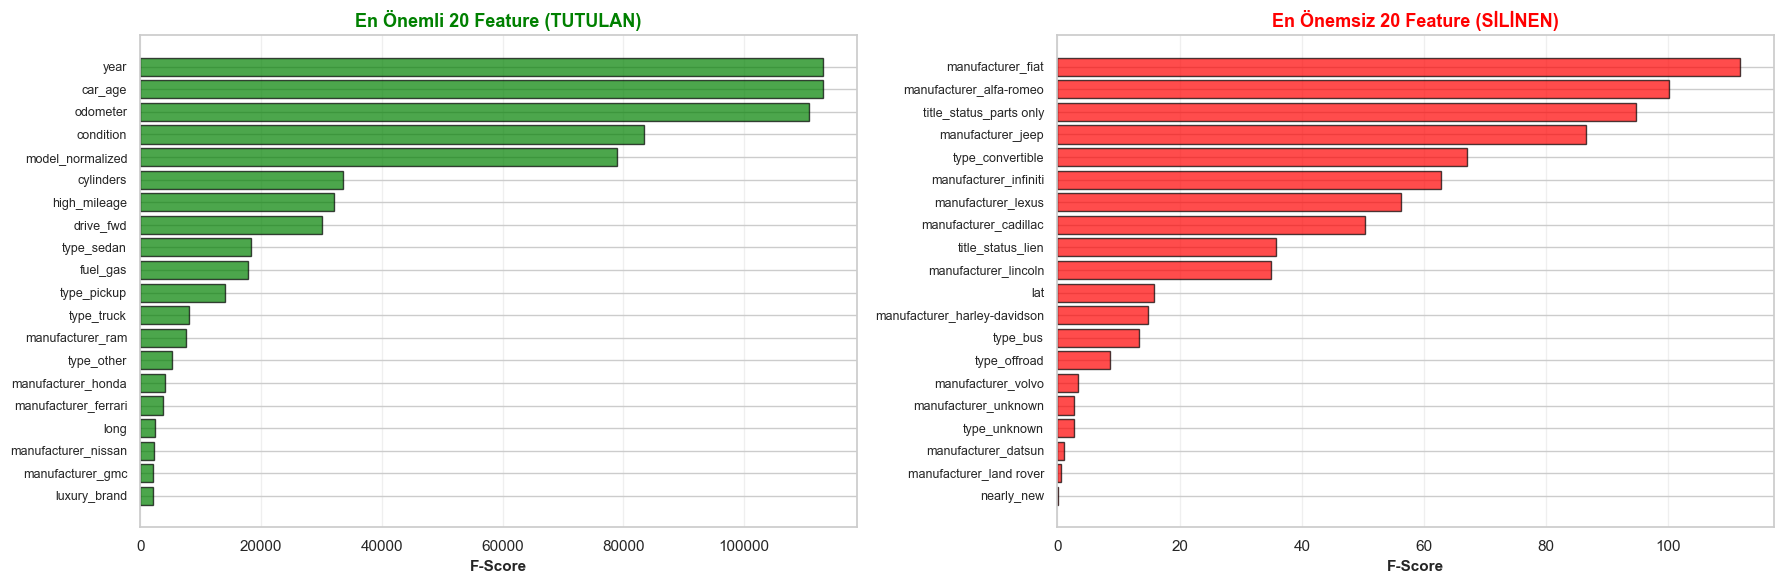

In [69]:
from sklearn.feature_selection import SelectKBest, f_regression

# 4.17  Feature Selection

print("\n1) Feature Selection stratejisi belirleniyor...")
print(f"   Mevcut feature sayısı: {X_train_final.shape[1]}")

k_features = int(X_train_final.shape[1] * 0.75)
print(f"   Hedef feature sayısı: {k_features} (toplam feature'ın %75'i)")


print("\n2) SelectKBest fit ediliyor...")

selector = SelectKBest(score_func=f_regression, k=k_features)
X_train_selected = selector.fit_transform(X_train_final, y_train)
X_test_selected = selector.transform(X_test_final)

print(f"   Önceki shape: {X_train_final.shape}")
print(f"   Sonraki shape: {X_train_selected.shape}")



print("\n3) Seçilen feature'lar:")

selected_mask = selector.get_support()
selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_mask[i]]
removed_features = [feature_names[i] for i in range(len(feature_names)) if not selected_mask[i]]

print(f"\n   Tutulan feature sayısı: {len(selected_features)}")
print(f"   Silinen feature sayısı: {len(removed_features)}")

print("\n   Tutulan feature'lar (ilk 15):")
for feat in selected_features[:15]:
    score = selector.scores_[feature_names.index(feat)]
    print(f"      - {feat:30} (F-score: {score:.2f})")

if len(selected_features) > 15:
    print(f"\n   ... ve {len(selected_features) - 15} feature daha")

print("\n   Silinen feature'lar (ilk 10):")
for feat in removed_features[:10]:
    score = selector.scores_[feature_names.index(feat)]
    print(f"      - {feat:30} (F-score: {score:.2f})")

if len(removed_features) > 10:
    print(f"\n   ... ve {len(removed_features) - 10} feature daha")


print("\n4) Feature Importance grafiği oluşturuluyor...")

feature_scores = pd.DataFrame({
    'feature': feature_names,
    'score': selector.scores_,
    'selected': selected_mask
}).sort_values('score', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Sol: Tutulanlar
top_20_selected = feature_scores[feature_scores['selected']].head(20)
axes[0].barh(range(len(top_20_selected)), top_20_selected['score'].values, 
             color='green', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(top_20_selected)))
axes[0].set_yticklabels(top_20_selected['feature'].values, fontsize=9)
axes[0].set_xlabel('F-Score', fontsize=11, weight='bold')
axes[0].set_title('En Önemli 20 Feature (TUTULAN)', fontsize=13, weight='bold', color='green')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Sağ: Silinenler
bottom_20_removed = feature_scores[~feature_scores['selected']].tail(20)
axes[1].barh(range(len(bottom_20_removed)), bottom_20_removed['score'].values, 
             color='red', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(bottom_20_removed)))
axes[1].set_yticklabels(bottom_20_removed['feature'].values, fontsize=9)
axes[1].set_xlabel('F-Score', fontsize=11, weight='bold')
axes[1].set_title('En Önemsiz 20 Feature (SİLİNEN)', fontsize=13, weight='bold', color='red')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


5) DataFrame'e dönüştürülüyor...
   X_train_final_reduced shape: (296389, 57)
   X_test_final_reduced shape: (74098, 57)

6) Değişkenler güncelleniyor...
   ✅ Artık indirgenmiş data kullanılıyor:
   X_train_final shape: (296389, 57)
   X_test_final shape: (74098, 57)
   feature_names uzunluğu: 57

7) Boyut indirgeme grafiği oluşturuluyor...


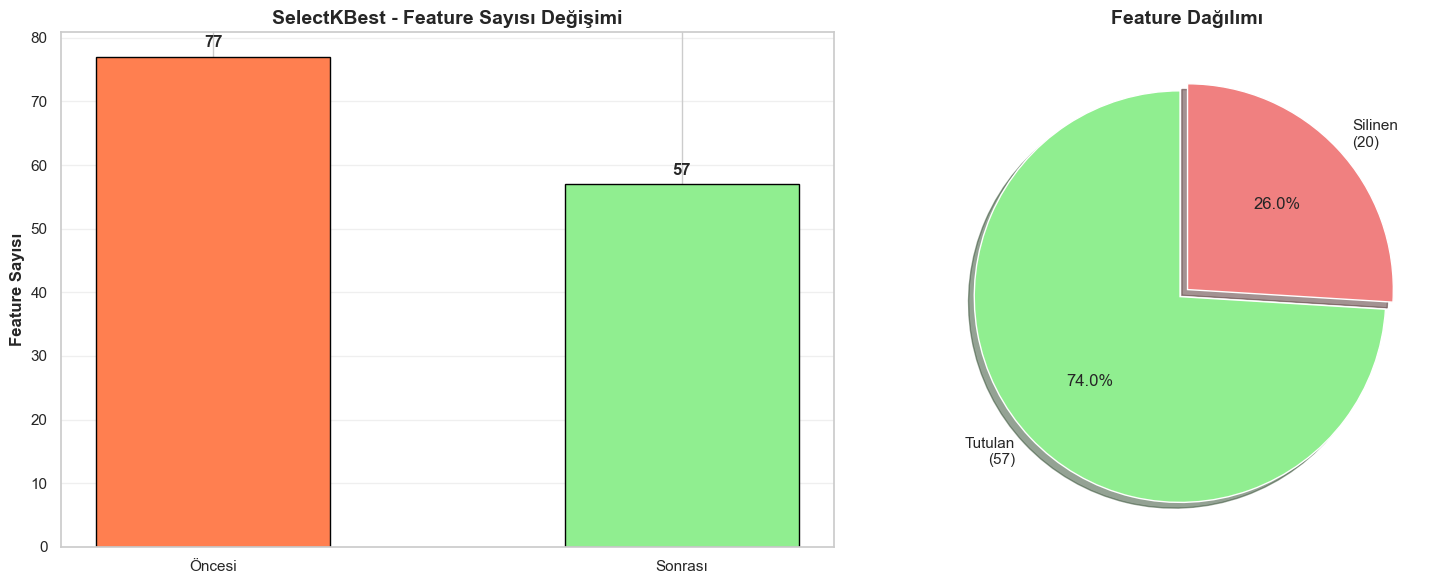


BOYUT İNDİRGEME TAMAMLANDI!
Feature sayısı: 77 → 57
Azalma: 20 feature silindi

 DİKKAT: Artık tüm modeller bu indirgenmiş data ile eğitilecek!


In [70]:

print("\n5) DataFrame'e dönüştürülüyor...")

X_train_final_reduced = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_final_reduced = pd.DataFrame(X_test_selected, columns=selected_features)

print(f"   X_train_final_reduced shape: {X_train_final_reduced.shape}")
print(f"   X_test_final_reduced shape: {X_test_final_reduced.shape}")


print("\n6) Değişkenler güncelleniyor...")

X_train_final = X_train_final_reduced
X_test_final = X_test_final_reduced
feature_names = selected_features 

print(f"   ✅ Artık indirgenmiş data kullanılıyor:")
print(f"   X_train_final shape: {X_train_final.shape}")
print(f"   X_test_final shape: {X_test_final.shape}")
print(f"   feature_names uzunluğu: {len(feature_names)}")


print("\n7) Boyut indirgeme grafiği oluşturuluyor...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sol: Bar
axes[0].bar(['Öncesi', 'Sonrası'], [77, X_train_final.shape[1]], 
            color=['coral', 'lightgreen'], edgecolor='black', width=0.5)
axes[0].set_ylabel('Feature Sayısı', fontsize=12, weight='bold')
axes[0].set_title('SelectKBest - Feature Sayısı Değişimi', fontsize=14, weight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].text(0, 77 + 1, '77', ha='center', va='bottom', fontsize=12, weight='bold')
axes[0].text(1, X_train_final.shape[1] + 1, str(X_train_final.shape[1]), 
             ha='center', va='bottom', fontsize=12, weight='bold')

axes[1].pie([len(selected_features), len(removed_features)], 
            labels=[f'Tutulan\n({len(selected_features)})', f'Silinen\n({len(removed_features)})'],
            autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'],
            explode=(0.05, 0),
            shadow=True,
            startangle=90)
axes[1].set_title('Feature Dağılımı', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("BOYUT İNDİRGEME TAMAMLANDI!")
print("="*80)
print(f"Feature sayısı: 77 → {X_train_final.shape[1]}")
print(f"Azalma: {77 - X_train_final.shape[1]} feature silindi")
print("\n DİKKAT: Artık tüm modeller bu indirgenmiş data ile eğitilecek!")
print("="*80)


# 5-) BASELINE MODELLER

In [71]:
# 5. BASELINE MODELLER (Hyperparameter Tuning Kullanarak)

print("\n" + "="*80)
print("BASELINE MODELLER (HYPERPARAMETER TUNING)")
print("="*80)

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import time
import lightgbm as lgb
import xgboost as xgb

# Check GPU availability
import subprocess
def check_gpu_available():
    try:
        result = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        return result.returncode == 0
    except:
        return False

GPU_AVAILABLE = check_gpu_available()

# Sonuçları saklamak için dictionary
results = {}

# 5.1 HISTGRADIENTBOOSTING REGRESSOR (Baseline - Tuning yok)

print("\n" + "="*80)
print("1. HISTGRADIENTBOOSTING REGRESSOR (Baseline - Tuning yok)")
print("="*80)

start_time = time.time()

hgb = HistGradientBoostingRegressor(
    random_state=42,
    max_iter=100,
    learning_rate=0.1,
    max_depth=10
)
hgb.fit(X_train_final, y_train)

y_pred_train_hgb = hgb.predict(X_train_final)
y_pred_test_hgb = hgb.predict(X_test_final)

train_time_hgb = time.time() - start_time

# Metrikler
r2_train_hgb = r2_score(y_train, y_pred_train_hgb)
r2_test_hgb = r2_score(y_test, y_pred_test_hgb)
mae_test_hgb = mean_absolute_error(y_test, y_pred_test_hgb)
rmse_test_hgb = np.sqrt(mean_squared_error(y_test, y_pred_test_hgb))

results['HistGradientBoosting'] = {
    'R2_train': r2_train_hgb,
    'R2_test': r2_test_hgb,
    'MAE': mae_test_hgb,
    'RMSE': rmse_test_hgb,
    'Time': train_time_hgb
}

print(f"Training Time: {train_time_hgb:.2f} seconds")
print(f"R2 Train: {r2_train_hgb:.4f}")
print(f"R2 Test: {r2_test_hgb:.4f}")
print(f"MAE: ${mae_test_hgb:,.2f}")
print(f"RMSE: ${rmse_test_hgb:,.2f}")

# 5.2 LIGHTGBM REGRESSOR (RandomizedSearchCV - 10 iterations)

print("\n" + "="*80)
print("2. LIGHTGBM REGRESSOR (RandomizedSearchCV - 10 iterations)")
print("="*80)

start_time = time.time()

# Parameter grid
param_dist_lgbm = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.05, 0.1, 0.2]
}

lgbm_base_params = {'random_state': 42, 'verbose': -1, 'n_jobs': -1}
if GPU_AVAILABLE:
    lgbm_base_params['device'] = 'gpu'
    print("GPU detected: LightGBM will use GPU")

lgbm = lgb.LGBMRegressor(**lgbm_base_params)
random_search_lgbm = RandomizedSearchCV(
    lgbm, param_dist_lgbm, 
    n_iter=5,  
    cv=3, 
    scoring='r2', 
    n_jobs=-1, 
    random_state=42,
    verbose=1
)

random_search_lgbm.fit(X_train_final, y_train)

best_lgbm = random_search_lgbm.best_estimator_
y_pred_train_lgbm = best_lgbm.predict(X_train_final)
y_pred_test_lgbm = best_lgbm.predict(X_test_final)

train_time_lgbm = time.time() - start_time

# Metrikler
r2_train_lgbm = r2_score(y_train, y_pred_train_lgbm)
r2_test_lgbm = r2_score(y_test, y_pred_test_lgbm)
mae_test_lgbm = mean_absolute_error(y_test, y_pred_test_lgbm)
rmse_test_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_test_lgbm))

results['LightGBM'] = {
    'R2_train': r2_train_lgbm,
    'R2_test': r2_test_lgbm,
    'MAE': mae_test_lgbm,
    'RMSE': rmse_test_lgbm,
    'Time': train_time_lgbm,
    'Best_params': random_search_lgbm.best_params_
}

print(f"Best params: {random_search_lgbm.best_params_}")
print(f"Training Time: {train_time_lgbm:.2f} seconds")
print(f"R2 Train: {r2_train_lgbm:.4f}")
print(f"R2 Test: {r2_test_lgbm:.4f}")
print(f"MAE: ${mae_test_lgbm:,.2f}")
print(f"RMSE: ${rmse_test_lgbm:,.2f}")

# 5.3 XGBOOST REGRESSOR (RandomizedSearchCV - 10 iterations)

print("\n" + "="*80)
print("3. XGBOOST REGRESSOR (RandomizedSearchCV - 10 iterations)")
print("="*80)

start_time = time.time()

param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_base_params = {'random_state': 42, 'verbosity': 0, 'n_jobs': -1, 'tree_method': 'hist'}
if GPU_AVAILABLE:
    xgb_base_params['device'] = 'cuda:0'
    print("GPU detected: XGBoost will use GPU")

xgb_model = xgb.XGBRegressor(**xgb_base_params)
random_search_xgb = RandomizedSearchCV(
    xgb_model, param_dist_xgb, 
    n_iter=10, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1, 
    random_state=42,
    verbose=1
)

random_search_xgb.fit(X_train_final, y_train)

best_xgb = random_search_xgb.best_estimator_
y_pred_train_xgb = best_xgb.predict(X_train_final)
y_pred_test_xgb = best_xgb.predict(X_test_final)

train_time_xgb = time.time() - start_time

r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

results['XGBoost'] = {
    'R2_train': r2_train_xgb,
    'R2_test': r2_test_xgb,
    'MAE': mae_test_xgb,
    'RMSE': rmse_test_xgb,
    'Time': train_time_xgb,
    'Best_params': random_search_xgb.best_params_
}

print(f"Best params: {random_search_xgb.best_params_}")
print(f"Training Time: {train_time_xgb:.2f} seconds")
print(f"R2 Train: {r2_train_xgb:.4f}")
print(f"R2 Test: {r2_test_xgb:.4f}")
print(f"MAE: ${mae_test_xgb:,.2f}")
print(f"RMSE: ${rmse_test_xgb:,.2f}")

# 5.4 BASELINE SONUÇLARI TABLOSU

print("\n" + "="*80)
print("BASELINE MODELLER KARŞILAŞTIRMA")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2_test', ascending=False)

print("\n" + results_df.to_string())

print("\n" + "="*80)
print("BASELINE MODELLER TAMAMLANDI!")
print("="*80)
print(f"En iyi model: {results_df.index[0]} (R2: {results_df.iloc[0]['R2_test']:.4f})")
print("\nBir sonraki adim: Stacking Regressor")
print("="*80)


BASELINE MODELLER (HYPERPARAMETER TUNING)

1. HISTGRADIENTBOOSTING REGRESSOR (Baseline - Tuning yok)
Training Time: 3.11 seconds
R2 Train: 0.7848
R2 Test: 0.7883
MAE: $4,044.05
RMSE: $6,910.36

2. LIGHTGBM REGRESSOR (RandomizedSearchCV - 10 iterations)
GPU detected: LightGBM will use GPU
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best params: {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1}
Training Time: 18.91 seconds
R2 Train: 0.7875
R2 Test: 0.7913
MAE: $4,039.18
RMSE: $6,861.47

3. XGBOOST REGRESSOR (RandomizedSearchCV - 10 iterations)
GPU detected: XGBoost will use GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1}
Training Time: 2587.71 seconds
R2 Train: 0.9925
R2 Test: 0.8837
MAE: $2,028.37
RMSE: $5,121.23

BASELINE MODELLER KARŞILAŞTIRMA

                     R2_train R2_test      MAE     RMSE     Time                                                   Best_param

# 6-) ADVANCED MODELLER - DEFAULT PARAMS

In [72]:
# 6. STACKING REGRESSOR (Default Params)

print("\n" + "="*80)
print("STACKING REGRESSOR (Default Params)")
print("="*80)

from sklearn.ensemble import StackingRegressor, RandomForestRegressor

start_time = time.time()

# 6.1 Model olustur ve egit

print("\n1) Stacking Regressor egitiliyor...")
print("   Base models: Random Forest + LightGBM + XGBoost")
print("   Meta-learner: HistGradientBoosting")

# Base estimators
rf_estimator = RandomForestRegressor(
    n_estimators=100, max_depth=20, random_state=42, n_jobs=-1, verbose=0
)

lgbm_params = {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1,
               'random_state': 42, 'verbose': -1, 'n_jobs': -1}
if GPU_AVAILABLE:
    lgbm_params['device'] = 'gpu'
lgbm_estimator = lgb.LGBMRegressor(**lgbm_params)

xgb_params = {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1,
              'random_state': 42, 'verbosity': 0, 'n_jobs': -1, 'tree_method': 'hist'}
if GPU_AVAILABLE:
    xgb_params['device'] = 'cuda:0'
xgb_estimator = xgb.XGBRegressor(**xgb_params)

stacking = StackingRegressor(
    estimators=[
        ('rf', rf_estimator),
        ('lgbm', lgbm_estimator),
        ('xgb', xgb_estimator)
    ],
    final_estimator=HistGradientBoostingRegressor(random_state=42, max_iter=50, verbose=0),
    cv=3, n_jobs=-1
)

stacking.fit(X_train_final, y_train)

train_time_stacking = time.time() - start_time

print(f"\n   Training Time: {train_time_stacking:.2f} seconds")

# 6.2 Tahmin

print("\n2) Tahmin yapiliyor...")

y_pred_train_stacking = stacking.predict(X_train_final)
y_pred_test_stacking = stacking.predict(X_test_final)

# 6.3 Metrikler

print("\n3) Metrikler hesaplaniyor...")

r2_train_stacking = r2_score(y_train, y_pred_train_stacking)
r2_test_stacking = r2_score(y_test, y_pred_test_stacking)
mae_test_stacking = mean_absolute_error(y_test, y_pred_test_stacking)
rmse_test_stacking = np.sqrt(mean_squared_error(y_test, y_pred_test_stacking))

results['Stacking Regressor'] = {
    'R2_train': r2_train_stacking,
    'R2_test': r2_test_stacking,
    'MAE': mae_test_stacking,
    'RMSE': rmse_test_stacking,
    'Time': train_time_stacking
}

print(f"\n   R2 Train: {r2_train_stacking:.4f}")
print(f"   R2 Test: {r2_test_stacking:.4f}")
print(f"   MAE: ${mae_test_stacking:,.2f}")
print(f"   RMSE: ${rmse_test_stacking:,.2f}")

# 6.4 Guncellenmis sonuclar tablosu

print("\n" + "="*80)
print("GÜNCELLENMIŞ MODEL KARŞILAŞTIRMA")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2_test', ascending=False)

print("\n" + results_df[['R2_train', 'R2_test', 'MAE', 'RMSE', 'Time']].to_string())

print("\n" + "="*80)
print("STACKING REGRESSOR TAMAMLANDI!")
print("="*80)
print(f"En iyi model: {results_df.index[0]} (R2: {results_df.iloc[0]['R2_test']:.4f})")
print("\nBir sonraki adim: HistGradientBoosting Hyperparameter Tuning")
print("="*80)


STACKING REGRESSOR (Default Params)

1) Stacking Regressor egitiliyor...
   Base models: Random Forest + LightGBM + XGBoost
   Meta-learner: HistGradientBoosting

   Training Time: 205.67 seconds

2) Tahmin yapiliyor...

3) Metrikler hesaplaniyor...

   R2 Train: 0.9481
   R2 Test: 0.8758
   MAE: $2,223.91
   RMSE: $5,293.36

GÜNCELLENMIŞ MODEL KARŞILAŞTIRMA

                     R2_train R2_test      MAE     RMSE     Time
XGBoost                 0.993   0.884 2028.368 5121.232 2587.712
Stacking Regressor      0.948   0.876 2223.911 5293.363  205.668
LightGBM                0.788   0.791 4039.179 6861.470   18.907
HistGradientBoosting    0.785   0.788 4044.047 6910.363    3.111

STACKING REGRESSOR TAMAMLANDI!
En iyi model: XGBoost (R2: 0.8837)

Bir sonraki adim: HistGradientBoosting Hyperparameter Tuning


# 7-) ADVANCED MODELLER - HYPERPARAMETER TUNING İLE

In [73]:
# 7. HYPERPARAMETER TUNING (HistGradientBoosting + Stacking)

print("\n" + "="*80)
print("HISTGRADIENTBOOSTING HYPERPARAMETER TUNING")
print("="*80)

start_time = time.time()

# 7.1 HGB Tuning

print("\n1) Parameter grid olusturuluyor...")
print("   Parameter kombinasyonları:")
print("   - max_iter: [100, 200, 300]")
print("   - learning_rate: [0.01, 0.05, 0.1, 0.2]")
print("   - max_depth: [5, 10, 15, 20, None]")
print("   - min_samples_leaf: [10, 20, 30, 50]")
print("   - l2_regularization: [0, 0.1, 1, 10]")

hgb_param_dist = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_leaf': [10, 20, 30, 50],
    'l2_regularization': [0, 0.1, 1, 10]
}

print("\n2) RandomizedSearchCV basliyor...")
print("   n_iter: 20")
print("   cv: 3")
print("   n_jobs: 2 (RAM için optimize edildi)")

hgb_random_search = RandomizedSearchCV(
    HistGradientBoostingRegressor(random_state=42, verbose=0),
    param_distributions=hgb_param_dist, n_iter=20, cv=3,
    scoring='r2', n_jobs=2, random_state=42, verbose=1
)

hgb_random_search.fit(X_train_final, y_train)

train_time_hgb_tuned = time.time() - start_time

print("\n3) En iyi parametreler bulundu!")
print("\n   Best params:")
for k, v in hgb_random_search.best_params_.items():
    print(f"      {k}: {v}")
print(f"\n   Best CV R2 Score: {hgb_random_search.best_score_:.4f}")

# 7.2 Tahmin

print("\n4) Tahmin yapiliyor...")

hgb_tuned = hgb_random_search.best_estimator_
y_pred_train_hgb_tuned = hgb_tuned.predict(X_train_final)
y_pred_test_hgb_tuned = hgb_tuned.predict(X_test_final)

# 7.3 Metrikler

print("\n5) Metrikler hesaplaniyor...")

r2_train_hgb_tuned = r2_score(y_train, y_pred_train_hgb_tuned)
r2_test_hgb_tuned = r2_score(y_test, y_pred_test_hgb_tuned)
mae_test_hgb_tuned = mean_absolute_error(y_test, y_pred_test_hgb_tuned)
rmse_test_hgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_hgb_tuned))

results['HistGradientBoosting (Tuned)'] = {
    'R2_train': r2_train_hgb_tuned,
    'R2_test': r2_test_hgb_tuned,
    'MAE': mae_test_hgb_tuned,
    'RMSE': rmse_test_hgb_tuned,
    'Time': train_time_hgb_tuned,
    'Best_params': hgb_random_search.best_params_
}

print(f"\n   R2 Train: {r2_train_hgb_tuned:.4f}")
print(f"   R2 Test: {r2_test_hgb_tuned:.4f}")
print(f"   MAE: ${mae_test_hgb_tuned:,.2f}")
print(f"   RMSE: ${rmse_test_hgb_tuned:,.2f}")

print("\n" + "="*80)
print("HISTGRADIENTBOOSTING - ÖNCESI vs SONRASI")
print("="*80)

print(f"\nDefault HGB:")
print(f"   R2 Test: {results['HistGradientBoosting']['R2_test']:.4f}")
print(f"   MAE: ${results['HistGradientBoosting']['MAE']:,.2f}")
print(f"   Time: {results['HistGradientBoosting']['Time']:.2f}s")

print(f"\nTuned HGB:")
print(f"   R2 Test: {r2_test_hgb_tuned:.4f}")
print(f"   MAE: ${mae_test_hgb_tuned:,.2f}")
print(f"   Time: {train_time_hgb_tuned:.2f}s")

improvement = ((r2_test_hgb_tuned - results['HistGradientBoosting']['R2_test']) / results['HistGradientBoosting']['R2_test']) * 100
print(f"\nIyilesme: {improvement:+.2f}% (R2)")

# 7.4 Stacking Tuning

print("\n" + "="*80)
print("STACKING REGRESSOR HYPERPARAMETER TUNING")
print("="*80)

start_time = time.time()

print("\n1) Tuned base estimators olusturuluyor...")

rf_tuned = RandomForestRegressor(
    n_estimators=200, max_depth=25, min_samples_split=5, min_samples_leaf=2,
    random_state=42, n_jobs=-1, verbose=0
)

lgbm_tuned_params = {
    'n_estimators': 200, 'max_depth': 25, 'learning_rate': 0.05,
    'num_leaves': 50, 'min_child_samples': 20,
    'random_state': 42, 'verbose': -1, 'n_jobs': -1
}
if GPU_AVAILABLE:
    lgbm_tuned_params['device'] = 'gpu'
lgbm_tuned = lgb.LGBMRegressor(**lgbm_tuned_params)

xgb_tuned_params = {
    'n_estimators': 200, 'max_depth': 25, 'learning_rate': 0.05,
    'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.8,
    'random_state': 42, 'verbosity': 0, 'n_jobs': -1, 'tree_method': 'hist'
}
if GPU_AVAILABLE:
    xgb_tuned_params['device'] = 'cuda:0'
xgb_tuned = xgb.XGBRegressor(**xgb_tuned_params)

print("\n2) Stacking Regressor (Tuned) egitiliyor...")

stacking_tuned = StackingRegressor(
    estimators=[
        ('rf', rf_tuned),
        ('lgbm', lgbm_tuned),
        ('xgb', xgb_tuned)
    ],
    final_estimator=HistGradientBoostingRegressor(random_state=42, max_iter=100, learning_rate=0.1, max_depth=10, verbose=0),
    cv=3, n_jobs=-1
)

stacking_tuned.fit(X_train_final, y_train)

train_time_stacking_tuned = time.time() - start_time

print(f"\n   Training Time: {train_time_stacking_tuned:.2f} seconds")

# 7.5 Tahmin

print("\n3) Tahmin yapiliyor...")

y_pred_train_stacking_tuned = stacking_tuned.predict(X_train_final)
y_pred_test_stacking_tuned = stacking_tuned.predict(X_test_final)

# 7.6 Metrikler

print("\n4) Metrikler hesaplaniyor...")

r2_train_stacking_tuned = r2_score(y_train, y_pred_train_stacking_tuned)
r2_test_stacking_tuned = r2_score(y_test, y_pred_test_stacking_tuned)
mae_test_stacking_tuned = mean_absolute_error(y_test, y_pred_test_stacking_tuned)
rmse_test_stacking_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_stacking_tuned))

results['Stacking Regressor (Tuned)'] = {
    'R2_train': r2_train_stacking_tuned,
    'R2_test': r2_test_stacking_tuned,
    'MAE': mae_test_stacking_tuned,
    'RMSE': rmse_test_stacking_tuned,
    'Time': train_time_stacking_tuned
}

print(f"\n   R2 Train: {r2_train_stacking_tuned:.4f}")
print(f"   R2 Test: {r2_test_stacking_tuned:.4f}")
print(f"   MAE: ${mae_test_stacking_tuned:,.2f}")
print(f"   RMSE: ${rmse_test_stacking_tuned:,.2f}")

print("\n" + "="*80)
print("STACKING REGRESSOR - ÖNCESI vs SONRASI")
print("="*80)

print(f"\nDefault Stacking:")
print(f"   R2 Test: {results['Stacking Regressor']['R2_test']:.4f}")
print(f"   MAE: ${results['Stacking Regressor']['MAE']:,.2f}")
print(f"   Time: {results['Stacking Regressor']['Time']:.2f}s")

print(f"\nTuned Stacking:")
print(f"   R2 Test: {r2_test_stacking_tuned:.4f}")
print(f"   MAE: ${mae_test_stacking_tuned:,.2f}")
print(f"   Time: {train_time_stacking_tuned:.2f}s")

improvement_stacking = ((r2_test_stacking_tuned - results['Stacking Regressor']['R2_test']) / results['Stacking Regressor']['R2_test']) * 100
print(f"\nIyilesme: {improvement_stacking:+.2f}% (R2)")

print("\n" + "="*80)
print("HYPERPARAMETER TUNING TAMAMLANDI!")
print("="*80)


HISTGRADIENTBOOSTING HYPERPARAMETER TUNING

1) Parameter grid olusturuluyor...
   Parameter kombinasyonları:
   - max_iter: [100, 200, 300]
   - learning_rate: [0.01, 0.05, 0.1, 0.2]
   - max_depth: [5, 10, 15, 20, None]
   - min_samples_leaf: [10, 20, 30, 50]
   - l2_regularization: [0, 0.1, 1, 10]

2) RandomizedSearchCV basliyor...
   n_iter: 20
   cv: 3
   n_jobs: 2 (RAM için optimize edildi)
Fitting 3 folds for each of 20 candidates, totalling 60 fits

3) En iyi parametreler bulundu!

   Best params:
      min_samples_leaf: 10
      max_iter: 300
      max_depth: 20
      learning_rate: 0.2
      l2_regularization: 0.1

   Best CV R2 Score: 0.8234

4) Tahmin yapiliyor...

5) Metrikler hesaplaniyor...

   R2 Train: 0.8538
   R2 Test: 0.8420
   MAE: $3,453.27
   RMSE: $5,969.29

HISTGRADIENTBOOSTING - ÖNCESI vs SONRASI

Default HGB:
   R2 Test: 0.7883
   MAE: $4,044.05
   Time: 3.11s

Tuned HGB:
   R2 Test: 0.8420
   MAE: $3,453.27
   Time: 125.66s

Iyilesme: +6.82% (R2)

STACKING R

# 8-) MODEL KARŞILAŞTIRMA VE GÖRSELLEŞTIRME

In [74]:
# 8.1 TÜM MODELLER - FINAL SONUÇLAR TABLOSU

print("\n" + "="*80)
print("TÜM MODELLER - FINAL KARŞILAŞTIRMA")
print("="*80)

results_df_final = pd.DataFrame(results).T
results_df_final = results_df_final.sort_values('R2_test', ascending=False)

print("\n" + results_df_final.to_string())

print("\n" + "="*80)
print("EN İYİ MODEL")
print("="*80)

best_model_name = results_df_final.index[0]
best_r2 = results_df_final.iloc[0]['R2_test']
best_mae = results_df_final.iloc[0]['MAE']
best_rmse = results_df_final.iloc[0]['RMSE']

print(f"\nModel: {best_model_name}")
print(f"R2 Score: {best_r2:.4f}")
print(f"MAE: ${best_mae:,.2f}")
print(f"RMSE: ${best_rmse:,.2f}")

print("\n" + "="*80)


TÜM MODELLER - FINAL KARŞILAŞTIRMA

                             R2_train R2_test      MAE     RMSE     Time                                                                                                 Best_params
Stacking Regressor (Tuned)      0.952   0.885 2080.186 5094.067  402.552                                                                                                         NaN
XGBoost                         0.993   0.884 2028.368 5121.232 2587.712                                                {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1}
Stacking Regressor              0.948   0.876 2223.911 5293.363  205.668                                                                                                         NaN
HistGradientBoosting (Tuned)    0.854   0.842 3453.272 5969.289  125.664  {'min_samples_leaf': 10, 'max_iter': 300, 'max_depth': 20, 'learning_rate': 0.2, 'l2_regularization': 0.1}
LightGBM                        0.788   0.791 4039.179 686


1) Model karsilastirma grafikleri olusturuluyor...


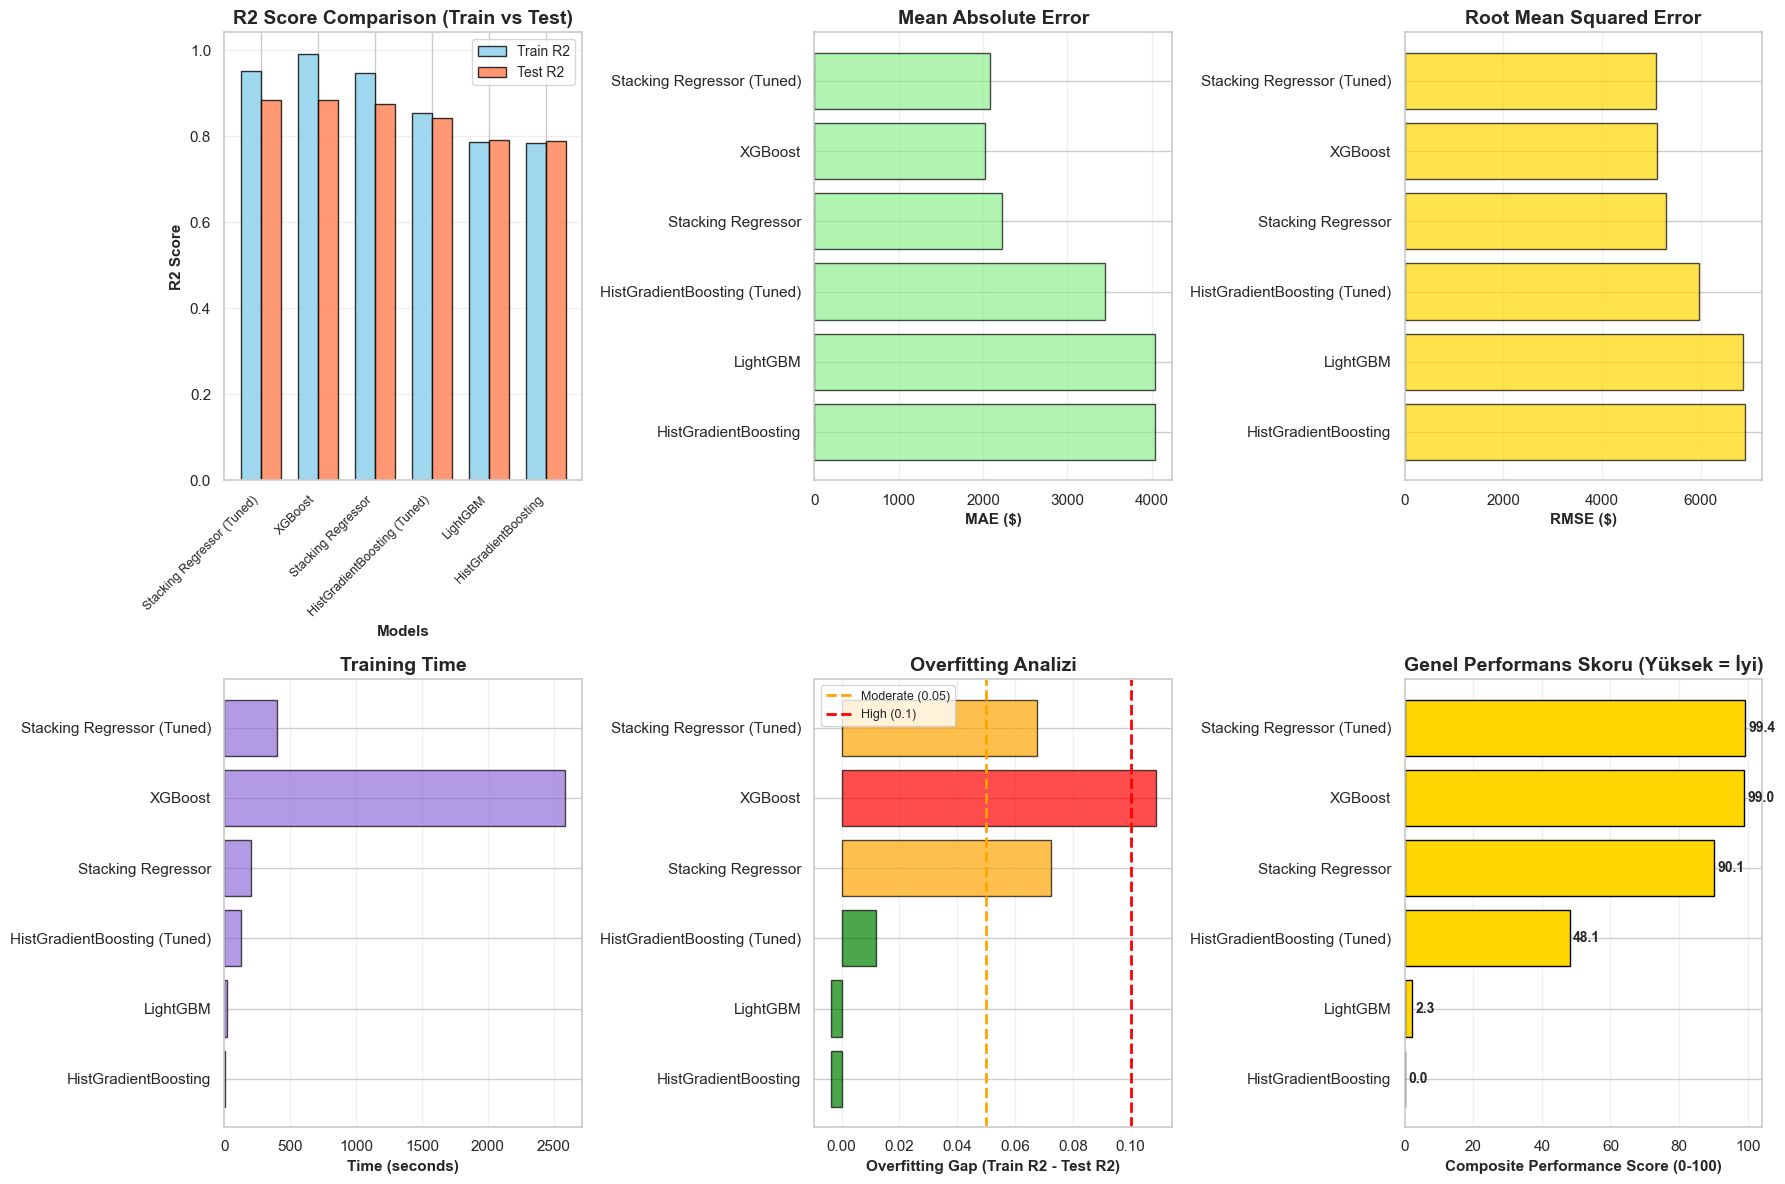


2) En iyi model Actual vs Predicted grafigi olusturuluyor...
   En iyi model: Stacking Regressor (Tuned)


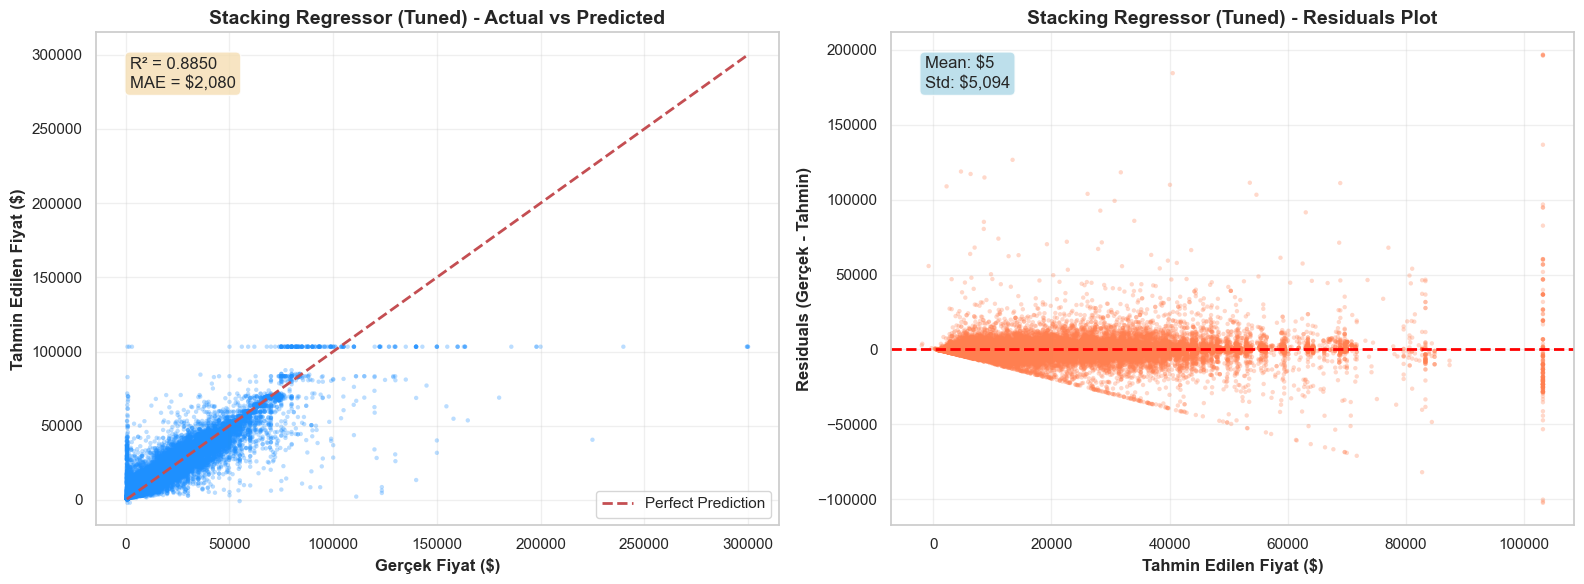


3) Gorsellestime tamamlandi!


In [75]:
# 8.2 MODEL PERFORMANS GÖRSELLEŞTİRME

import matplotlib.pyplot as plt
import seaborn as sns

print("\n1) Model karsilastirma grafikleri olusturuluyor...")

# 8.2.1 R2 Score Karşılaştırması

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

model_names = results_df_final.index.tolist()
r2_train = results_df_final['R2_train'].values
r2_test = results_df_final['R2_test'].values
mae = results_df_final['MAE'].values
rmse = results_df_final['RMSE'].values
times = results_df_final['Time'].values

# R2 Train vs Test
x_pos = range(len(model_names))
width = 0.35
axes[0, 0].bar([p - width/2 for p in x_pos], r2_train, width, label='Train R2', alpha=0.8, color='skyblue', edgecolor='black')
axes[0, 0].bar([p + width/2 for p in x_pos], r2_test, width, label='Test R2', alpha=0.8, color='coral', edgecolor='black')
axes[0, 0].set_xlabel('Models', fontsize=11, weight='bold')
axes[0, 0].set_ylabel('R2 Score', fontsize=11, weight='bold')
axes[0, 0].set_title('R2 Score Comparison (Train vs Test)', fontsize=14, weight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(model_names, rotation=45, ha='right', fontsize=9)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(alpha=0.3, axis='y')

# MAE Comparison
axes[0, 1].barh(model_names, mae, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('MAE ($)', fontsize=11, weight='bold')
axes[0, 1].set_title('Mean Absolute Error', fontsize=14, weight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# RMSE Comparison
axes[0, 2].barh(model_names, rmse, color='gold', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('RMSE ($)', fontsize=11, weight='bold')
axes[0, 2].set_title('Root Mean Squared Error', fontsize=14, weight='bold')
axes[0, 2].grid(axis='x', alpha=0.3)
axes[0, 2].invert_yaxis()

# Training Time
axes[1, 0].barh(model_names, times, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Time (seconds)', fontsize=11, weight='bold')
axes[1, 0].set_title('Training Time', fontsize=14, weight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Overfitting Analysis
overfitting = r2_train - r2_test
colors_overfitting = ['red' if x > 0.1 else 'orange' if x > 0.05 else 'green' for x in overfitting]
axes[1, 1].barh(model_names, overfitting, color=colors_overfitting, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Overfitting Gap (Train R2 - Test R2)', fontsize=11, weight='bold')
axes[1, 1].set_title('Overfitting Analizi', fontsize=14, weight='bold')
axes[1, 1].axvline(x=0.05, color='orange', linestyle='--', linewidth=2, label='Moderate (0.05)')
axes[1, 1].axvline(x=0.1, color='red', linestyle='--', linewidth=2, label='High (0.1)')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].invert_yaxis()

# Composite Score
r2_norm = (r2_test - r2_test.min()) / (r2_test.max() - r2_test.min())
mae_norm = 1 - (mae - mae.min()) / (mae.max() - mae.min())
rmse_norm = 1 - (rmse - rmse.min()) / (rmse.max() - rmse.min())

composite_score = (r2_norm * 0.5 + mae_norm * 0.25 + rmse_norm * 0.25) * 100

axes[1, 2].barh(model_names, composite_score, color='gold', edgecolor='black')
axes[1, 2].set_xlabel('Composite Performance Score (0-100)', fontsize=11, weight='bold')
axes[1, 2].set_title('Genel Performans Skoru (Yüksek = İyi)', fontsize=14, weight='bold')
axes[1, 2].grid(axis='x', alpha=0.3)
axes[1, 2].invert_yaxis()

for i, v in enumerate(composite_score):
    axes[1, 2].text(v + 1, i, f'{v:.1f}', va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# 8.3 En iyi model - Actual vs Predicted

print("\n2) En iyi model Actual vs Predicted grafigi olusturuluyor...")

best_model_name = results_df_final.index[0]
print(f"   En iyi model: {best_model_name}")

# Get predictions for best model
if 'Stacking' in best_model_name and 'Tuned' in best_model_name:
    y_pred_best = y_pred_test_stacking_tuned
elif 'Stacking' in best_model_name:
    y_pred_best = y_pred_test_stacking
elif 'HistGradientBoosting' in best_model_name and 'Tuned' in best_model_name:
    y_pred_best = y_pred_test_hgb_tuned
elif 'HistGradientBoosting' in best_model_name:
    y_pred_best = y_pred_test_hgb
elif 'XGBoost' in best_model_name:
    y_pred_best = y_pred_test_xgb
elif 'LightGBM' in best_model_name:
    y_pred_best = y_pred_test_lgbm
else:
    y_pred_best = y_pred_test_hgb

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(y_test, y_pred_best, alpha=0.3, s=10, color='dodgerblue', edgecolors='none')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Gerçek Fiyat ($)', fontsize=12, weight='bold')
axes[0].set_ylabel('Tahmin Edilen Fiyat ($)', fontsize=12, weight='bold')
axes[0].set_title(f'{best_model_name} - Actual vs Predicted', fontsize=14, weight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

r2_best = results_df_final.iloc[0]['R2_test']
mae_best = results_df_final.iloc[0]['MAE']
axes[0].text(0.05, 0.95, f'R² = {r2_best:.4f}\nMAE = ${mae_best:,.0f}', 
             transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

residuals = y_test - y_pred_best
axes[1].scatter(y_pred_best, residuals, alpha=0.3, s=10, color='coral', edgecolors='none')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Tahmin Edilen Fiyat ($)', fontsize=12, weight='bold')
axes[1].set_ylabel('Residuals (Gerçek - Tahmin)', fontsize=12, weight='bold')
axes[1].set_title(f'{best_model_name} - Residuals Plot', fontsize=14, weight='bold')
axes[1].grid(alpha=0.3)

mean_residual = residuals.mean()
std_residual = residuals.std()
axes[1].text(0.05, 0.95, f'Mean: ${mean_residual:,.0f}\nStd: ${std_residual:,.0f}', 
             transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n3) Gorsellestime tamamlandi!")

In [76]:
# 8.4 MODEL YORUMLARI VE ÖNERİLER

print("\n" + "="*80)
print("MODEL YORUMLARI VE ÖNERİLER")
print("="*80)

for idx, (model_name, row) in enumerate(results_df_final.iterrows(), 1):
    print(f"\n{idx}. {model_name}")
    print("-" * 60)
    print(f"   R² Test: {row['R2_test']:.4f}")
    print(f"   MAE: ${row['MAE']:,.2f}")
    print(f"   RMSE: ${row['RMSE']:,.2f}")
    print(f"   Training Time: {row['Time']:.2f}s")
    
    # Overfitting kontrolü
    overfitting = row['R2_train'] - row['R2_test']
    if overfitting > 0.1:
        print(f"    UYARI: Yüksek overfitting (gap: {overfitting:.3f})")
    elif overfitting > 0.05:
        print(f"    DİKKAT: Orta seviye overfitting (gap: {overfitting:.3f})")
    else:
        print(f"    İyi generalization (gap: {overfitting:.3f})")
    
    # Performans yorumu
    if row['R2_test'] >= 0.90:
        print(f"    MÜKEMMEL PERFORMANS")
    elif row['R2_test'] >= 0.85:
        print(f"    ÇOK İYİ PERFORMANS")
    elif row['R2_test'] >= 0.75:
        print(f"    İYİ PERFORMANS")
    elif row['R2_test'] >= 0.65:
        print(f"    ORTA PERFORMANS")
    else:
        print(f"    ZAYIF PERFORMANS")

print("\n" + "="*80)
print("EN İYİ MODEL")
print("="*80)
print(f"\nModel: {best_model_name}")
print(f"R² Score: {results_df_final.iloc[0]['R2_test']:.4f}")
print(f"MAE: ${results_df_final.iloc[0]['MAE']:,.2f}")
print(f"RMSE: ${results_df_final.iloc[0]['RMSE']:,.2f}")

print("\n" + "="*80)
print("PROJE TAMAMLANDI!")
print("="*80)


MODEL YORUMLARI VE ÖNERİLER

1. Stacking Regressor (Tuned)
------------------------------------------------------------
   R² Test: 0.8850
   MAE: $2,080.19
   RMSE: $5,094.07
   Training Time: 402.55s
    DİKKAT: Orta seviye overfitting (gap: 0.067)
    ÇOK İYİ PERFORMANS

2. XGBoost
------------------------------------------------------------
   R² Test: 0.8837
   MAE: $2,028.37
   RMSE: $5,121.23
   Training Time: 2587.71s
    UYARI: Yüksek overfitting (gap: 0.109)
    ÇOK İYİ PERFORMANS

3. Stacking Regressor
------------------------------------------------------------
   R² Test: 0.8758
   MAE: $2,223.91
   RMSE: $5,293.36
   Training Time: 205.67s
    DİKKAT: Orta seviye overfitting (gap: 0.072)
    ÇOK İYİ PERFORMANS

4. HistGradientBoosting (Tuned)
------------------------------------------------------------
   R² Test: 0.8420
   MAE: $3,453.27
   RMSE: $5,969.29
   Training Time: 125.66s
    İyi generalization (gap: 0.012)
    İYİ PERFORMANS

5. LightGBM
---------------------